## Look at the DESC metrics

This notebook takes the DESC metrics and plots more of them for more families. 

In [2]:
# Some useful packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import IPython

import rubin_sim.maf as maf

The `archive` module (from `rubin_sim.maf.archive.py`) provides functions to help deal with json/pandas data frames containing lists of the simulations in a given run, as well as typical sets of metrics. With these lists of simulations in each family, it's easier to isolate those metric results to compare the effect of varying that survey strategy. `archive` works with additional functions in `summary_plots` to then normalize and plot metric summary statistics.
(`archive` and `summary_plots` are the evolution of the family_infos and metric_infos classes).

In [3]:
# Download a dataframe of the archive information -- 
# this is a multi-index DF, and can be read in in multiple "versions"
# This version of the dataframe has one row per family, with multiple runs in lists in each row
# note that you can 'explode' this dataframe to be one row per run by doing families.explode('run')
families = maf.archive.get_family_descriptions('runs_v2.1.json')
families.head()

description version  \
family                                                                          
baseline            **baseline** : The v2 baseline simulations. V2...      --   
rolling             **rolling** : The rolling family covers a wide...     2.0   
triplets            **triplets** : These simulations add a third v...     2.0   
long gaps no pairs  **long gaps no pairs** : The baseline survey s...     2.0   
bluer balance       **bluer balance** : The standard filter balanc...     2.0   

                              reference  \
family                                    
baseline            baseline_v2.1_10yrs   
rolling             baseline_v2.0_10yrs   
triplets            baseline_v2.0_10yrs   
long gaps no pairs  baseline_v2.0_10yrs   
bluer balance       baseline_v2.0_10yrs   

                                                                  run  \
family                                                                  
baseline            [baseline_v2.1_10yrs, baseline_v2.0_10yrs, bas...   
rolling             [noroll_v2.0_10yrs, rolling_ns2_rw0.5_v2.0_10y...   
triplets            [presto_gap1.5_v2.0_10yrs, presto_gap2.0_v2.0_...   
long gaps no pairs  [long_gaps_np_nightsoff7_delayed1827_v2.0_10yr...   
bluer balance        [bluer_indx0_v2.0_10yrs, bluer_indx1_v2.0_10yrs]   

                                                                brief  \
family                                                                  
baseline            [v2.1 baseline (+Virgo, good seeing), v2.0 bas...   
rolling             [v2.0 baseline with no rolling, Rolling half-s...   
triplets            [Triples spaced 1.5 hours apart g+r,r+i,i+z in...   
long gaps no pairs  [Long gaps pairs every 7 nights starting after...   
bluer balance       [More g - filter ratio in WFD of {'u': 0.07, '...   

                                                             filepath  \
family                                                                  
baseline            [fbs_2.1/baseline/baseline_v2.1_10yrs.db, fbs_...   
rolling             [fbs_2.0/noroll/noroll_v2.0_10yrs.db, fbs_2.0/...   
triplets            [fbs_2.0/presto/presto_gap1.5_v2.0_10yrs.db, f...   
long gaps no pairs  [fbs_2.0/long_gaps_nopair/long_gaps_np_nightso...   
bluer balance       [fbs_2.0/bluer/bluer_indx0_v2.0_10yrs.db, fbs_...   

                                                                  url  
family                                                                 
baseline            [http://epyc.astro.washington.edu/~lynnej/opsi...  
rolling             [http://epyc.astro.washington.edu/~lynnej/opsi...  
triplets            [http://epyc.astro.washington.edu/~lynnej/opsi...  
long gaps no pairs  [http://epyc.astro.washington.edu/~lynnej/opsi...  
bluer balance       [http://epyc.astro.washington.edu/~lynnej/opsi...

Read the summary stat csv file. 

These are the standard MAF summary stats (which may include something you use!) 
but you could join your own dataframe, as long as it covered all the relevant runs.
This gives us metric results to compare between the runs.

In [4]:
# Read the summary stat csv file
summaries = maf.archive.get_metric_summaries(summary_source='summary_2022_06_22.csv')

NOTE -- the 2022_06_22 csv file has the 'original' MAF implementation for the SN metric, so does not yet match the expected results of Philipe Gris' updated SN metric.

In [5]:
# And get the metric subset lists that can help with pulling information out of the big summary dataframe
# -- here I'm using a local copy, but leave out any arguments to fetch from the github repo
metric_sets = maf.archive.get_metric_sets('metric_sets.json')
metric_sets.head()

metric  \
metric set metric                                                                                                  
radar      fONv MedianNvis fO All sky HealpixSlicer                     fONv MedianNvis fO All sky HealpixSlicer   
           Mean WeakLensingNvisits gri band non-DD Healpix...  Mean WeakLensingNvisits gri band non-DD Healpi...   
           3x2ptFoM ExgalM5_with_cuts i band non-DD year 1...  3x2ptFoM ExgalM5_with_cuts i band non-DD year ...   
           Total detected SNNSNMetric_nSN  HealpixSlicer           Total detected SNNSNMetric_nSN  HealpixSlicer   
           Total detected KNePopMetric_all__multi_detect a...  Total detected KNePopMetric_all__multi_detect ...   

                                                                         short_name  \
metric set metric                                                                     
radar      fONv MedianNvis fO All sky HealpixSlicer                        fONv_med   
           Mean WeakLensingNvisits gri band non-DD Healpix...                    WL   
           3x2ptFoM ExgalM5_with_cuts i band non-DD year 1...             3x2pt FoM   
           Total detected SNNSNMetric_nSN  HealpixSlicer                       SNIa   
           Total detected KNePopMetric_all__multi_detect a...  KNe all multi_detect   

                                                              style  invert  \
metric set metric                                                             
radar      fONv MedianNvis fO All sky HealpixSlicer            None   False   
           Mean WeakLensingNvisits gri band non-DD Healpix...  None   False   
           3x2ptFoM ExgalM5_with_cuts i band non-DD year 1...  None   False   
           Total detected SNNSNMetric_nSN  HealpixSlicer       None   False   
           Total detected KNePopMetric_all__multi_detect a...  None   False   

                                                                 mag  
metric set metric                                                     
radar      fONv MedianNvis fO All sky HealpixSlicer            False  
           Mean WeakLensingNvisits gri band non-DD Healpix...  False  
           3x2ptFoM ExgalM5_with_cuts i band non-DD year 1...  False  
           Total detected SNNSNMetric_nSN  HealpixSlicer       False  
           Total detected KNePopMetric_all__multi_detect a...  False

In [6]:
# What are the 'sets' of metrics?
metric_sets.groupby('metric set').first().index

Index(['AGN N QSO', 'AGN SF', 'AGN SF DDF', 'AGN timelag', 'DDF Cadence',
       'DESC SN DDF', 'DESC WFD', 'GP filters', 'GP footprint', 'GP season',
       'GP visit', 'N Visits', 'SL TDC', 'SRD', 'SSO N Objs', 'SSO discovery',
       'SSO discovery options', 'SSO fraction 3 bands', 'SSO fraction 4 bands',
       'SSO fraction 5 bands', 'SSO fraction 6 bands',
       'SSO lightcurve inversion', 'Stars', 'TVS KNe', 'TVS PeriodModulation',
       'TVS PeriodicDetect', 'TVS Presto', 'TVS TDE', 'TVS Tgaps', 'TVS XRB',
       'TVS microlensing', 'TVS microlensing all', 'TVS short', 'WFD Depths',
       'cadence', 'galaxies', 'plot areas', 'radar', 'short description'],
      dtype='object', name='metric set')

In [7]:
metric_sets.loc['DESC WFD']

metric  \
metric                                                                                                  
Median ExgalM5_with_cuts i band non-DD year 10 ...  Median ExgalM5_with_cuts i band non-DD year 10...   
Rms ExgalM5_with_cuts i band non-DD year 10 Hea...  Rms ExgalM5_with_cuts i band non-DD year 10 He...   
Effective Area (deg) ExgalM5_with_cuts i band n...  Effective Area (deg) ExgalM5_with_cuts i band ...   
3x2ptFoM ExgalM5_with_cuts i band non-DD year 1...  3x2ptFoM ExgalM5_with_cuts i band non-DD year ...   
N Galaxies (all) DepthLimitedNumGalaxiesMetric ...  N Galaxies (all) DepthLimitedNumGalaxiesMetric...   
Mean WeakLensingNvisits gri band non-DD Healpix...  Mean WeakLensingNvisits gri band non-DD Healpi...   
Total detected SNNSNMetric_nSN  HealpixSlicer           Total detected SNNSNMetric_nSN  HealpixSlicer   
Median SNNSNMetric_zlim  HealpixSlicer                         Median SNNSNMetric_zlim  HealpixSlicer   
Total detected SNSLMetric  HealpixSlicer                     Total detected SNSLMetric  HealpixSlicer   
Total detected KNePopMetric_all__multi_color_de...  Total detected KNePopMetric_all__multi_color_d...   

                                                                                           short_name  \
metric                                                                                                  
Median ExgalM5_with_cuts i band non-DD year 10 ...                            Median coaddedM5 i band   
Rms ExgalM5_with_cuts i band non-DD year 10 Hea...                               RMS coaddedM5 i band   
Effective Area (deg) ExgalM5_with_cuts i band n...                              Effective survey area   
3x2ptFoM ExgalM5_with_cuts i band non-DD year 1...                                          3x2pt FoM   
N Galaxies (all) DepthLimitedNumGalaxiesMetric ...                            NGal in exgal footprint   
Mean WeakLensingNvisits gri band non-DD Healpix...                                  Mean NVisits (WL)   
Total detected SNNSNMetric_nSN  HealpixSlicer                                              Total SNIa   
Median SNNSNMetric_zlim  HealpixSlicer                                              Median z_lim SNIa   
Total detected SNSLMetric  HealpixSlicer                                                  Total SN-SL   
Total detected KNePopMetric_all__multi_color_de...  Total detected KNePopMetric_all__multi_color_d...   

                                                   style  invert    mag  
metric                                                                   
Median ExgalM5_with_cuts i band non-DD year 10 ...   b-.   False   True  
Rms ExgalM5_with_cuts i band non-DD year 10 Hea...    b:    True  False  
Effective Area (deg) ExgalM5_with_cuts i band n...    r-   False  False  
3x2ptFoM ExgalM5_with_cuts i band non-DD year 1...   r-.   False  False  
N Galaxies (all) DepthLimitedNumGalaxiesMetric ...    g:   False  False  
Mean WeakLensingNvisits gri band non-DD Healpix...    m:   False  False  
Total detected SNNSNMetric_nSN  HealpixSlicer         k-   False  False  
Median SNNSNMetric_zlim  HealpixSlicer               k--   False  False  
Total detected SNSLMetric  HealpixSlicer              k:   False  False  
Total detected KNePopMetric_all__multi_color_de...   g--   False  False

### Metric results

Using utilities from `archive` (to normalize the data frame and plot metrics), combined with the family information dataframe with the simulations in each family, we can pull up some plots for each family.

In [8]:
outDir = 'desc_plots'
if not os.path.exists(outDir):
    os.mkdir(outDir)

def describe_family(family, mset=metric_sets.loc['DESC WFD']):
    if not isinstance(family, list):
        family = [family]
    baseline_run = families.loc[family]['reference'][0]
    these_runs = families.explode('run').loc[family, 'run'].values
    if baseline_run not in these_runs:
        these_runs = np.concatenate([[baseline_run], these_runs])
    result = maf.archive.describe_families(
        families.loc[family, :],
        summary=summaries,
        table_metric_set=metric_sets.loc["short description"],
        plot_metric_set=metric_sets.loc["plot areas"],
        baseline_run=baseline_run,
    )
    fig, ax = maf.plot_run_metric(  # pylint: disable=invalid-name
            summaries.loc[these_runs, mset['metric']], 
            metric_set=mset,
            baseline_run=baseline_run,
            vertical_quantity="value",
            horizontal_quantity="run",
            metric_label_map=mset['short_name']
        )
    lgd = plt.legend(loc=(1.01, 0.2), fancybox=True, numpoints=1, fontsize='medium')
    figwidth = min(10, len(these_runs))
    figwidth = max(figwidth, 15)
    fig.set_figwidth(figwidth)
    d = summaries.loc[these_runs, mset['metric']]
    d = d.rename(columns=mset['short_name'], inplace=False)
    return d

---
**baseline** : The v2 baseline simulations. V2.0 and V2.1 feature a survey footprint with expanded dust-free area and WFD-level visits in the Galactic Bulge and Magellanic Clouds. Coverage of the Northern Ecliptic Spur, South Celestial Pole, and remainder of the Galactic Plane is maintained, at lower levels. Filter balance is modified in different areas of the sky. A 2-region rolling cadence is used in the dust-free WFD sky, to improve cadence. The v2.1 simulation adds coverage in the Virgo cluster and acquisition of good seeing images in r&i bands. The retro simulations are intended to provide a bridge from v1.X to v2.X, introducing modifications to the footprint and scheduler code separately and in stages.  
**version**: --  
**runs**:  


metric                         Median coaddedM5 i band  RMS coaddedM5 i band  \
run                                                                            
baseline_v2.1_10yrs                          26.224653              0.125467   
baseline_v2.0_10yrs                          26.183049              0.111224   
baseline_retrofoot_v2.0_10yrs                26.214487              0.111908   
retro_baseline_v2.0_10yrs                    26.255834              0.114332   

metric                         Effective survey area  3x2pt FoM  \
run                                                               
baseline_v2.1_10yrs                     16842.944872  38.560143   
baseline_v2.0_10yrs                     16711.175770  37.908126   
baseline_retrofoot_v2.0_10yrs           14959.569932  33.991288   
retro_baseline_v2.0_10yrs               15098.053384  34.632263   

metric                         NGal in exgal footprint  Mean NVisits (WL)  \
run                                                                         
baseline_v2.1_10yrs                       4.611300e+09         443.096621   
baseline_v2.0_10yrs                       4.568638e+09         442.290894   
baseline_retrofoot_v2.0_10yrs             4.094741e+09         465.149966   
retro_baseline_v2.0_10yrs                 4.138227e+09         447.246373   

metric                         Total SNIa  Median z_lim SNIa  Total SN-SL  \
run                                                                         
baseline_v2.1_10yrs             24542.276              0.200     7.748698   
baseline_v2.0_10yrs             24788.969              0.225     8.116086   
baseline_retrofoot_v2.0_10yrs   24872.501              0.200     7.717773   
retro_baseline_v2.0_10yrs       19082.783              0.250     8.507835   

metric                         Total detected KNePopMetric_all__multi_color_detect  
run                                                                                 
baseline_v2.1_10yrs                                                       1830.0    
baseline_v2.0_10yrs                                                       1713.0    
baseline_retrofoot_v2.0_10yrs                                             1667.0    
retro_baseline_v2.0_10yrs                                                 1779.0

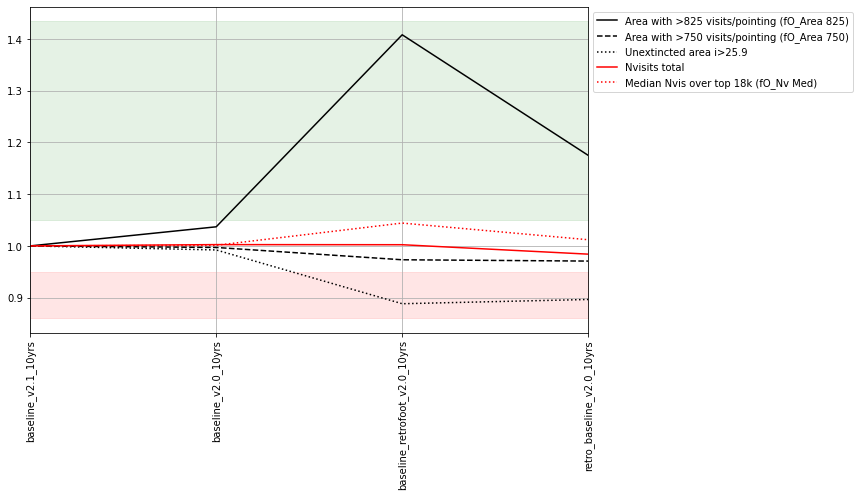

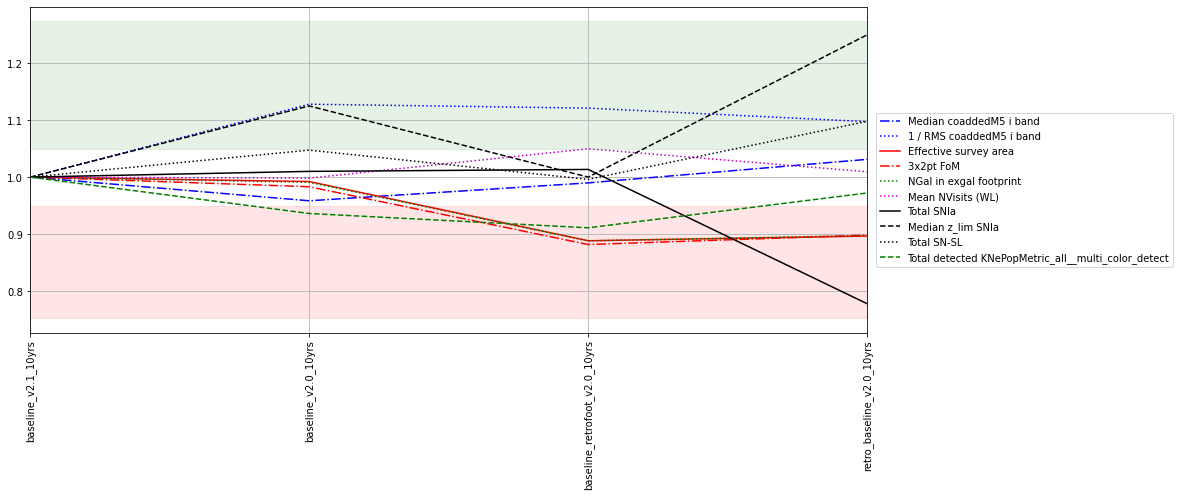

In [9]:
fam = 'baseline'
describe_family(fam)

The new v2 footprint is a ~12% improvement in effective survey area; many DESC metrics do scale with survey area (such as 3x2pt FoM), including most static science metrics.
(the metrics for SN here are not updated to the most-recent version from Pgris - I will remove this note when they are). 

---
**rolling** : The rolling family covers a wide variety of rolling cadence variations. These are arranged in general estimation of the impact of the rolling cadence, from "least" to "most" - no_roll has no rolling cadence at all, then variations on the number of stripes (ns=2/3/6) are added, as as which areas of the sky (WFD only, adding the bulge WFD-area, all-sky). The strength of rolling is also varied (rw=50,80 or 90%).  
**version**: 2.0  
**runs**:  


metric                                Median coaddedM5 i band  \
run                                                             
baseline_v2.0_10yrs                                 26.183049   
noroll_v2.0_10yrs                                   26.207366   
rolling_ns2_rw0.5_v2.0_10yrs                        26.194565   
rolling_ns3_rw0.5_v2.0_10yrs                        26.185661   
rolling_ns2_rw0.9_v2.0_10yrs                        26.183049   
rolling_ns3_rw0.9_v2.0_10yrs                        26.152484   
rolling_bulge_ns2_rw0.5_v2.0_10yrs                  26.198819   
rolling_bulge_ns2_rw0.8_v2.0_10yrs                  26.182385   
rolling_bulge_ns2_rw0.9_v2.0_10yrs                  26.178392   
rolling_all_sky_ns2_rw0.9_v2.0_10yrs                26.183097   
roll_early_v2.0_10yrs                               26.175029   
six_rolling_ns6_rw0.5_v2.0_10yrs                    26.169431   
six_rolling_ns6_rw0.9_v2.0_10yrs                    26.135842   
rolling_bulge_6_v2.0_10yrs                          26.179496   

metric                                RMS coaddedM5 i band  \
run                                                          
baseline_v2.0_10yrs                               0.111224   
noroll_v2.0_10yrs                                 0.115163   
rolling_ns2_rw0.5_v2.0_10yrs                      0.112193   
rolling_ns3_rw0.5_v2.0_10yrs                      0.113710   
rolling_ns2_rw0.9_v2.0_10yrs                      0.111224   
rolling_ns3_rw0.9_v2.0_10yrs                      0.107382   
rolling_bulge_ns2_rw0.5_v2.0_10yrs                0.113574   
rolling_bulge_ns2_rw0.8_v2.0_10yrs                0.112526   
rolling_bulge_ns2_rw0.9_v2.0_10yrs                0.111425   
rolling_all_sky_ns2_rw0.9_v2.0_10yrs              0.113521   
roll_early_v2.0_10yrs                             0.107037   
six_rolling_ns6_rw0.5_v2.0_10yrs                  0.105130   
six_rolling_ns6_rw0.9_v2.0_10yrs                  0.097256   
rolling_bulge_6_v2.0_10yrs                        0.112605   

metric                                Effective survey area  3x2pt FoM  \
run                                                                      
baseline_v2.0_10yrs                            16711.175770  37.908126   
noroll_v2.0_10yrs                              17005.767839  38.850004   
rolling_ns2_rw0.5_v2.0_10yrs                   16807.694539  38.245354   
rolling_ns3_rw0.5_v2.0_10yrs                   16873.159443  38.346230   
rolling_ns2_rw0.9_v2.0_10yrs                   16711.175770  37.908126   
rolling_ns3_rw0.9_v2.0_10yrs                   16568.495850  37.295010   
rolling_bulge_ns2_rw0.5_v2.0_10yrs             16868.962975  38.435104   
rolling_bulge_ns2_rw0.8_v2.0_10yrs             16664.175326  37.782096   
rolling_bulge_ns2_rw0.9_v2.0_10yrs             16706.140008  37.858618   
rolling_all_sky_ns2_rw0.9_v2.0_10yrs           16599.549715  37.622047   
roll_early_v2.0_10yrs                          16536.602692  37.396550   
six_rolling_ns6_rw0.5_v2.0_10yrs               16665.014619  37.681519   
six_rolling_ns6_rw0.9_v2.0_10yrs               16336.011510  36.558616   
rolling_bulge_6_v2.0_10yrs                     16606.264064  37.610645   

metric                                NGal in exgal footprint  \
run                                                             
baseline_v2.0_10yrs                              4.568638e+09   
noroll_v2.0_10yrs                                4.653054e+09   
rolling_ns2_rw0.5_v2.0_10yrs                     4.596822e+09   
rolling_ns3_rw0.5_v2.0_10yrs                     4.613393e+09   
rolling_ns2_rw0.9_v2.0_10yrs                     4.568638e+09   
rolling_ns3_rw0.9_v2.0_10yrs                     4.525135e+09   
rolling_bulge_ns2_rw0.5_v2.0_10yrs               4.614111e+09   
rolling_bulge_ns2_rw0.8_v2.0_10yrs               4.555702e+09   
rolling_bulge_ns2_rw0.9_v2.0_10yrs               4.566399e+09   
rolling_all_sky_ns2_rw0.9_v2.0_10yrs             4.537842e+09   
r

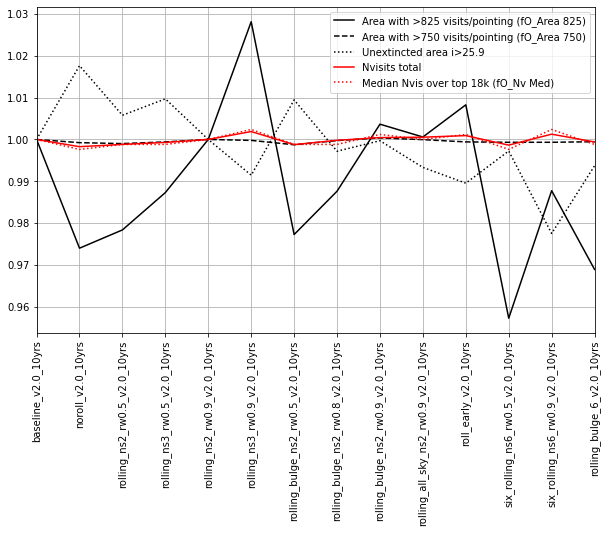

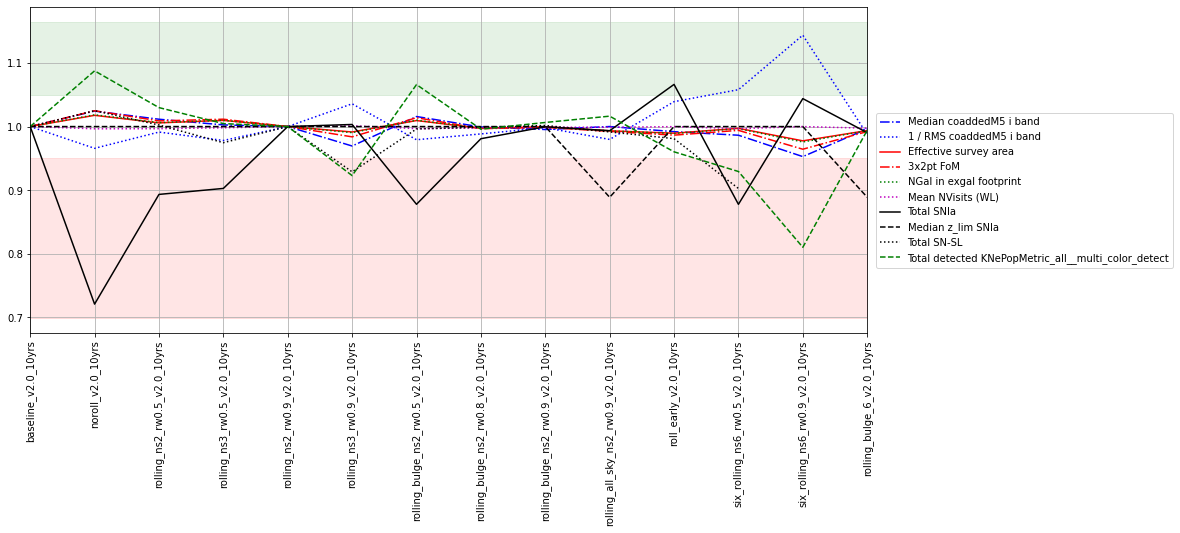

In [10]:
fam = 'rolling'
describe_family(fam)

Most DESC static science does not care specifically about rolling cadence, if you look at only the final results of the survey. The number of visits per pointing does not vary significantly with rolling cadence, although the individual visit depths can be slightly modified. 
Looking at some of these static science metrics as a function of different years is one way to capture the uniformity of the survey progress over time, which may start to address DESC concerns about uniformity. 

SNIa, KNe, and SNSL do react to rolling cadence. Generally, rolling cadence improves SNIa results, while SNSL show slight improvement with rolling cadence (but decreased performance with 6-band rolling cadence). 

In [11]:
msub = metric_sets.loc['DESC WFD'].query('metric.str.contains("year")')
for year in np.arange(1, 10, 1):
    tag = 'year %d' % year
    metrics = [f"{m.split('year')[0]}{tag} HealpixSlicer" for m in msub['metric']]
    short_names = [f"{m} {tag}" for m in msub['short_name']]
    invert = msub['invert']
    mag = msub['mag']
    style = msub['style']
    if year == 1:
        mset = maf.create_metric_set_df(f'DESC WFD {tag}',  metrics, short_names, 
                                        style=style, invert=invert, mag=mag)
    else:
        mset = pd.concat([mset, maf.create_metric_set_df(f'DESC WFD {tag}',  metrics, short_names,
                                                        style=style, invert=invert, mag=mag)])

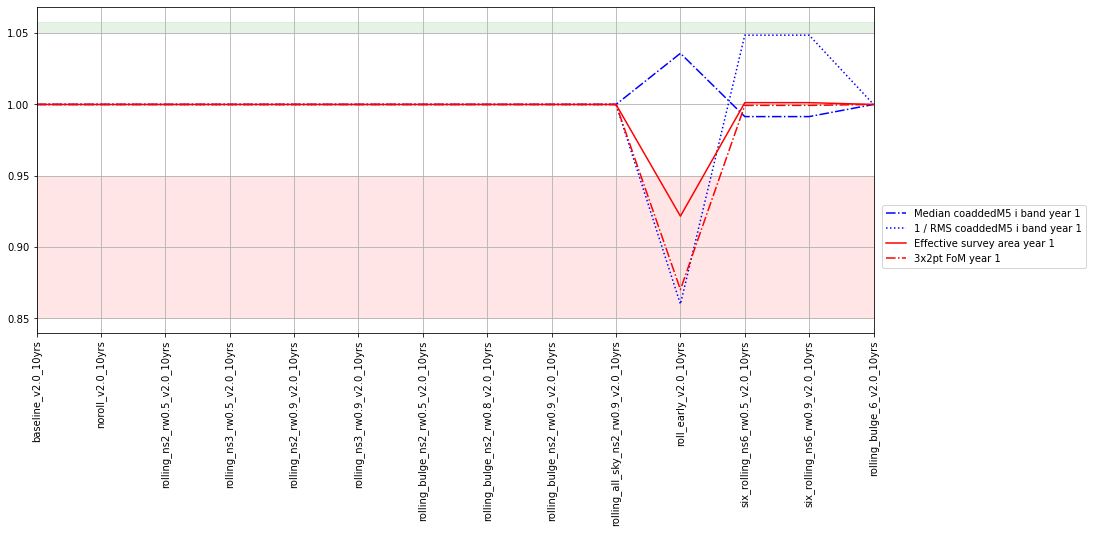

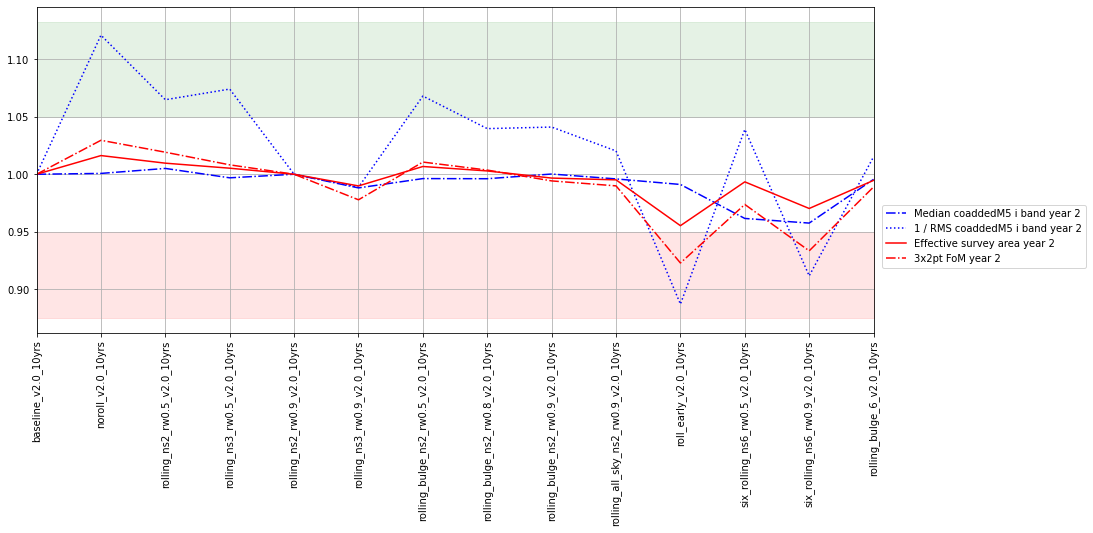

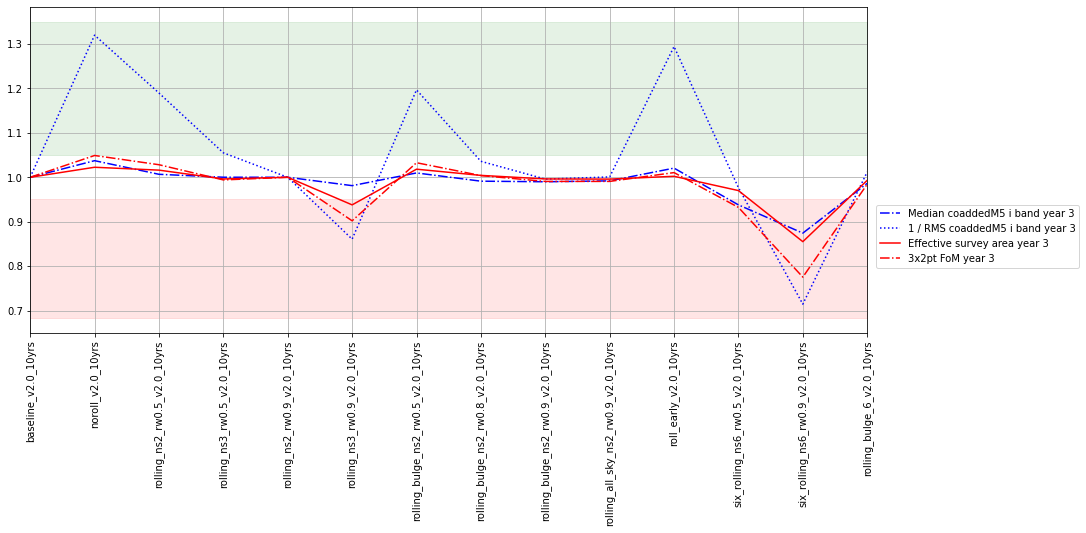

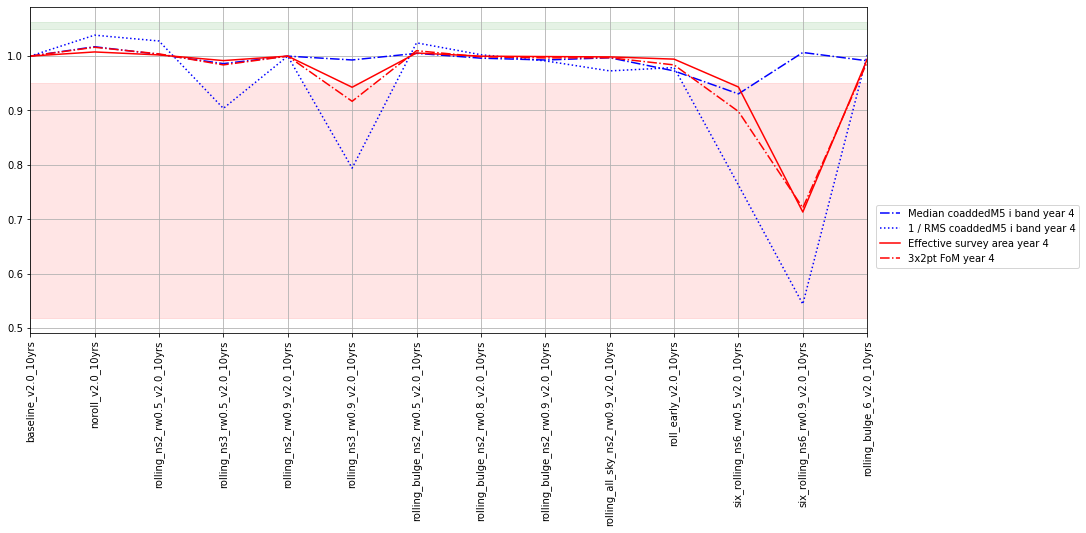

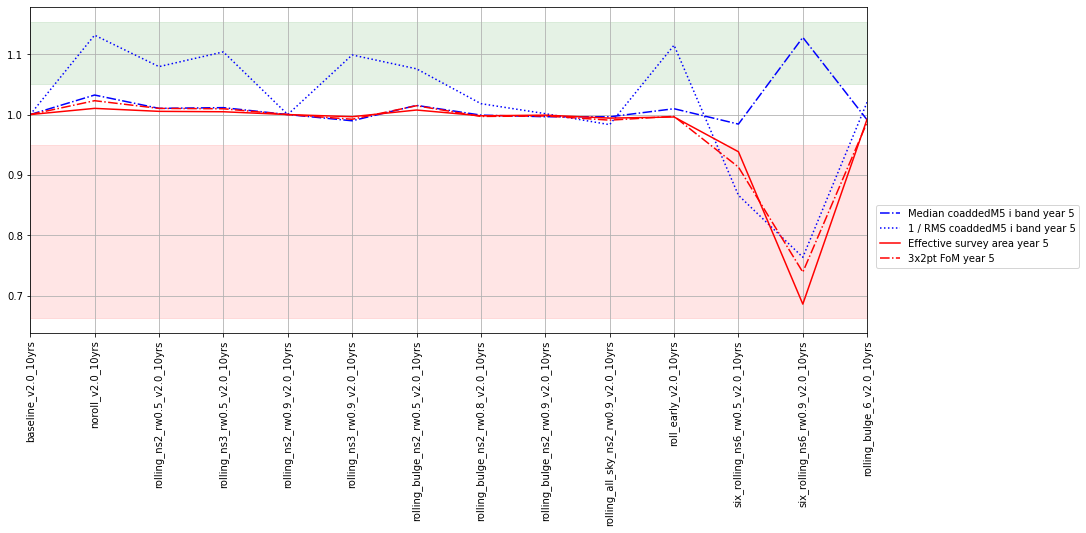

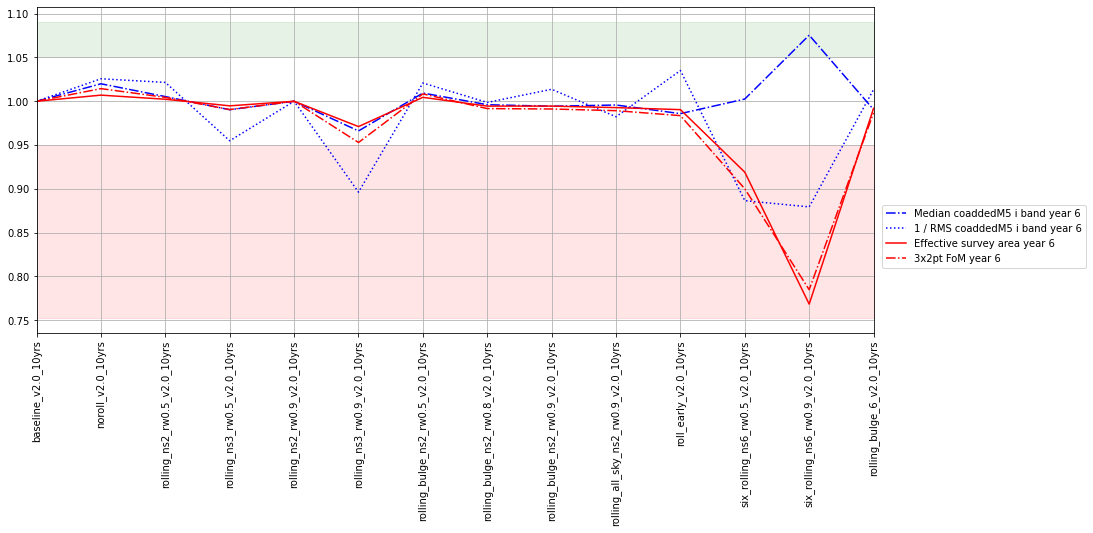

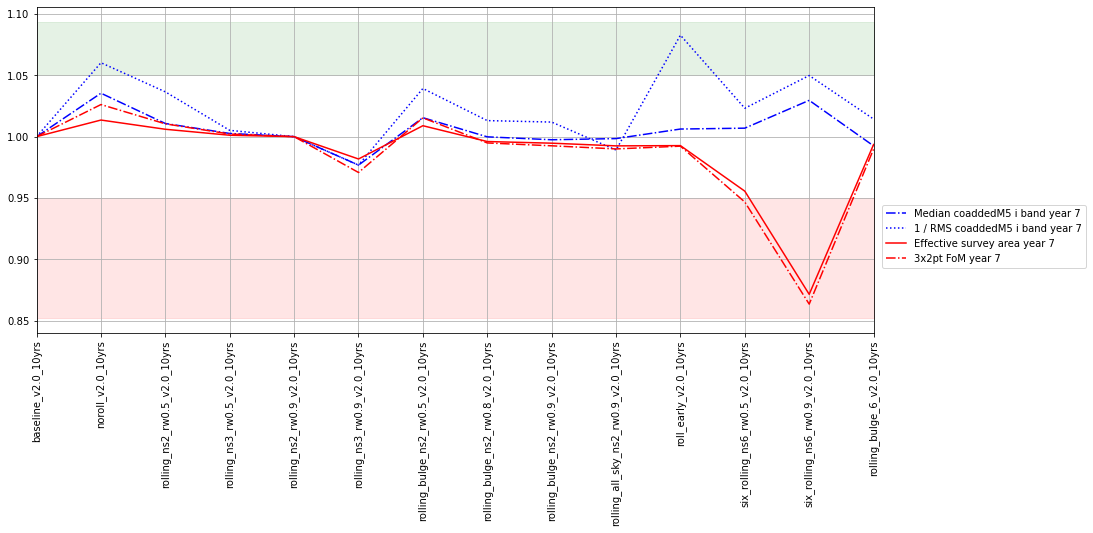

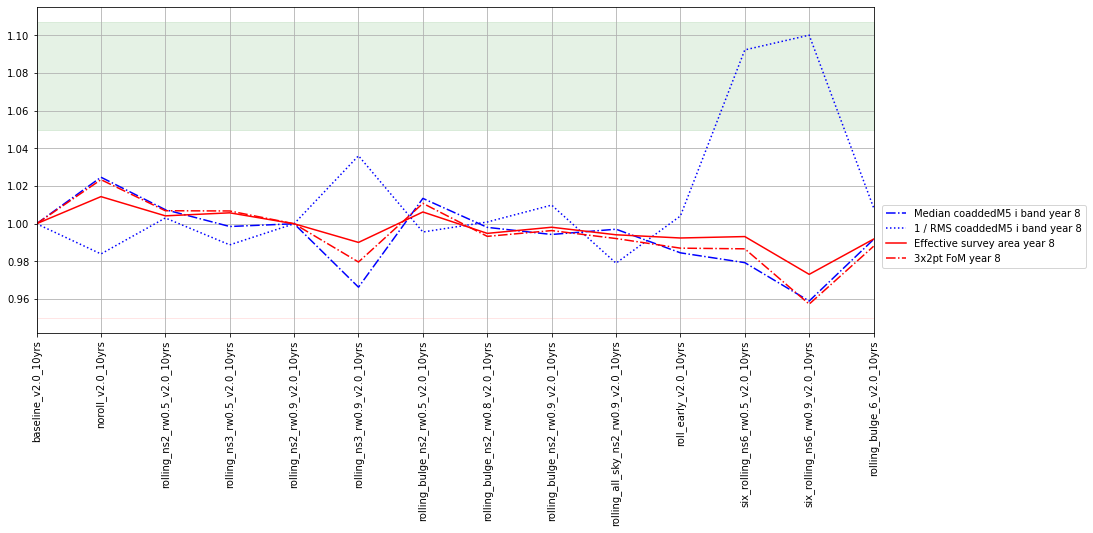

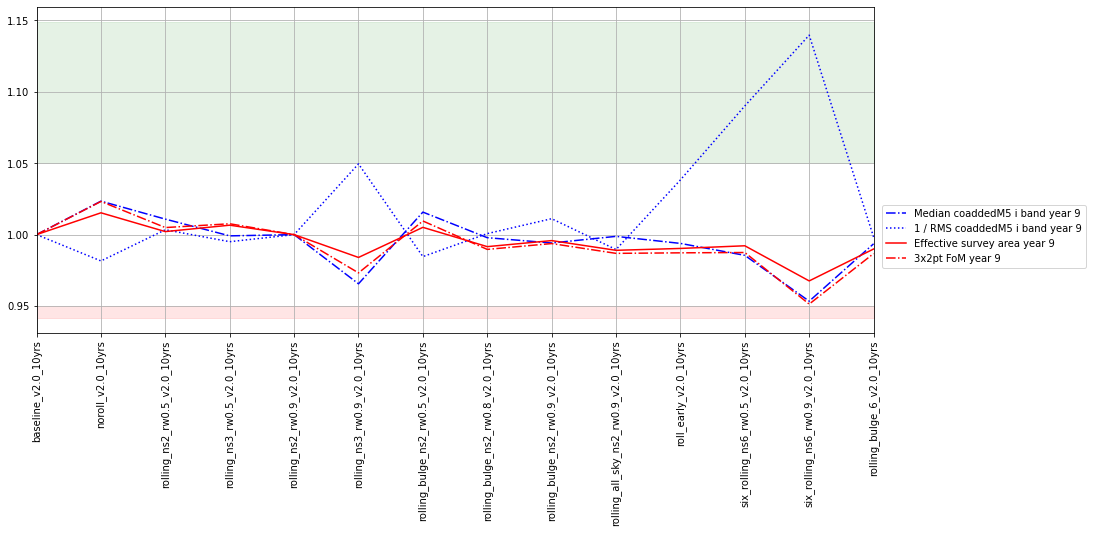

In [12]:
baseline_run = 'baseline_v2.0_10yrs'
these_runs = families.explode('run').loc['rolling', 'run'].values
if baseline_run not in these_runs:
    these_runs = np.concatenate([[baseline_run], these_runs])
for yr in np.arange(1, 10, 1):
    k = 'DESC WFD year %d' % yr
    fig, ax = maf.plot_run_metric(  # pylint: disable=invalid-name
            summaries.loc[these_runs, mset.loc[k]['metric']], 
            metric_set=mset.loc[k],
            baseline_run=baseline_run,
            vertical_quantity="value",
            horizontal_quantity="run",
            metric_label_map=mset.loc[k]['short_name']
        )
    lgd = plt.legend(loc=(1.01, 0.2), fancybox=True, numpoints=1, fontsize='medium')
    figwidth = min(10, len(these_runs))
    figwidth = max(figwidth, 15)
    fig.set_figwidth(figwidth)

The first year shows no changes relative to baseline, except for the 'roll early' version, which isn't that surprising -- the rolling cadence doesn't start in the first year, except for the "roll early" simulation. When rolling cadence starts early, the first year shows the effects of rolling cadence kicking in without a 'background' of 1.5 years of observing without the rolling cadence to "soften" the variations of depth. 

In the second year, rolling cadence starts. For most versions of rolling, the metrics don't change much. Roll-early shows the effects of rolling cadence continuing on top of a more non-uniform background, and for six-band rolling cadence variations, the metrics show more variability, although the RMS coadded depth does show changes. Without rolling cadence, there is an about 10% improvement in the rms i-band coadded depth over the sky compared to 2-band 90% rolling.


---
**triplets** : These simulations add a third visit within each night, with variations on the time interval between the first pair of visits (standard separation of 33 minutes) to the third visit. The third visit is always acquired in the same filter as one of the earlier visits in the pair. Only *some* of the visits in the night are taken in triplets; the first "blob" will be a triplet, and depending on the time available in the night and the gap length, sometimes additional blobs will be acquired in triplets. The "presto_gap" runs take triplets all the time, at a set interval to the third visit and in the filter pairs described in the brief descriptions. The "presto_half" runs are similar, but only take triplets of visits about half of the time. The "long_gaps" runs vary the interval to the third visit, and generally have longer gaps of 2 to 7 hours. The long_gaps run take triplets at a variety of frequencies, ranging from every night to every few nights; in some simulations the triplets do not start until year 5.  
**version**: 2.0  
**runs**:  


metric                                       Median coaddedM5 i band  \
run                                                                    
baseline_v2.0_10yrs                                        26.183049   
presto_gap1.5_v2.0_10yrs                                   26.037901   
presto_gap2.0_v2.0_10yrs                                   26.023217   
presto_gap2.5_v2.0_10yrs                                   26.024171   
presto_gap3.0_v2.0_10yrs                                   26.034161   
presto_gap3.5_v2.0_10yrs                                   26.030520   
presto_gap4.0_v2.0_10yrs                                   26.035858   
presto_gap1.5_mix_v2.0_10yrs                               26.158000   
presto_gap2.0_mix_v2.0_10yrs                               26.145654   
presto_gap2.5_mix_v2.0_10yrs                               26.141697   
presto_gap3.0_mix_v2.0_10yrs                               26.147686   
presto_gap3.5_mix_v2.0_10yrs                               26.138408   
presto_gap4.0_mix_v2.0_10yrs                               26.139007   
presto_half_gap1.5_v2.0_10yrs                              26.103709   
presto_half_gap2.0_v2.0_10yrs                              26.093093   
presto_half_gap2.5_v2.0_10yrs                              26.110373   
presto_half_gap3.0_v2.0_10yrs                              26.105186   
presto_half_gap3.5_v2.0_10yrs                              26.103051   
presto_half_gap4.0_v2.0_10yrs                              26.111827   
presto_half_gap1.5_mix_v2.0_10yrs                          26.162848   
presto_half_gap2.0_mix_v2.0_10yrs                          26.164744   
presto_half_gap2.5_mix_v2.0_10yrs                          26.163931   
presto_half_gap3.0_mix_v2.0_10yrs                          26.160263   
presto_half_gap3.5_mix_v2.0_10yrs                          26.165126   
presto_half_gap4.0_mix_v2.0_10yrs                          26.166051   
long_gaps_nightsoff7_delayed1827_v2.0_10yrs                26.175753   
long_gaps_nightsoff6_delayed1827_v2.0_10yrs                26.171531   
long_gaps_nightsoff5_delayed1827_v2.0_10yrs                26.173015   
long_gaps_nightsoff4_delayed1827_v2.0_10yrs                26.174114   
long_gaps_nightsoff3_delayed1827_v2.0_10yrs                26.169513   
long_gaps_nightsoff2_delayed1827_v2.0_10yrs                26.163095   
long_gaps_nightsoff1_delayed1827_v2.0_10yrs                26.154876   
long_gaps_nightsoff0_delayed1827_v2.0_10yrs                26.125745   
long_gaps_nightsoff7_delayed-1_v2.0_10yrs                  26.163297   
long_gaps_nightsoff6_delayed-1_v2.0_10yrs                  26.164265   
long_gaps_nightsoff5_delayed-1_v2.0_10yrs                  26.161501   
long_gaps_nightsoff4_delayed-1_v2.0_10yrs                  26.156948   
long_gaps_nightsoff3_delayed-1_v2.0_10yrs                  26.154866   
long_gaps_nightsoff2_delayed-1_v2.0_10yrs                  26.139857   
long_gaps_nightsoff1_delayed-1_v2.0_10yrs                  26.124532   
long_gaps_nightsoff0_delayed-1_v2.0_10yrs                  26.055474   

metric                                       RMS coaddedM5 i band  \
run                                                                 
baseline_v2.0_10yrs                                      0.111224   
presto_gap1.5_v2.0_10yrs                                 0.074737   
presto_gap2.0_v2.0_10yrs                                 0.075980   
presto_gap2.5_v2.0_10yrs                                 0.076097   
presto_gap3.0_v2.0_10yrs                                 0.076897   
presto_gap3.5_v2.0_10yrs                                 0.074298   
presto_gap4.0_v2.0_10yrs                                 0.077357   
presto_gap1.5_mix_v2.0_10yrs                             0.118014   
presto_gap2.0_mix_v2.0_10yrs                             0.109432   
presto_gap2.5_mix_v2.0_10yrs                             0.103531   
presto_gap3.0_mix_v2.0_10yrs                             0.103128   
presto

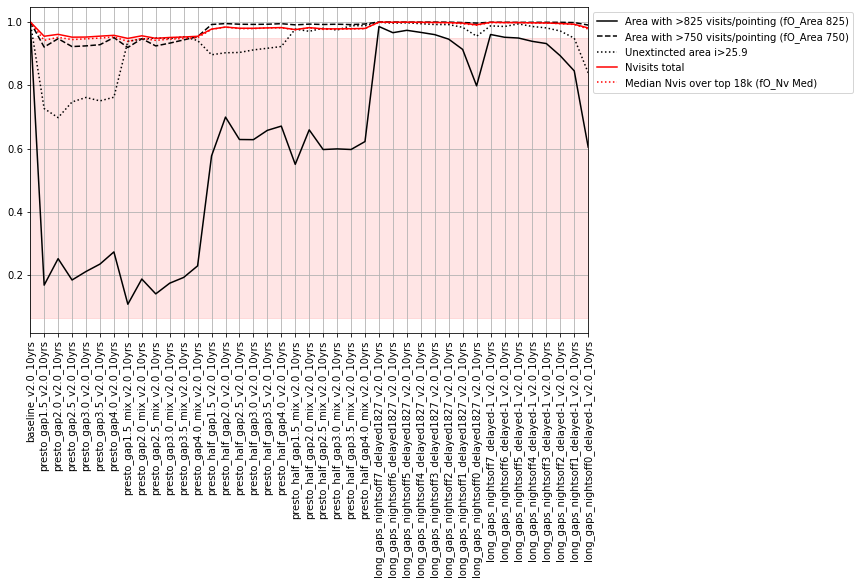

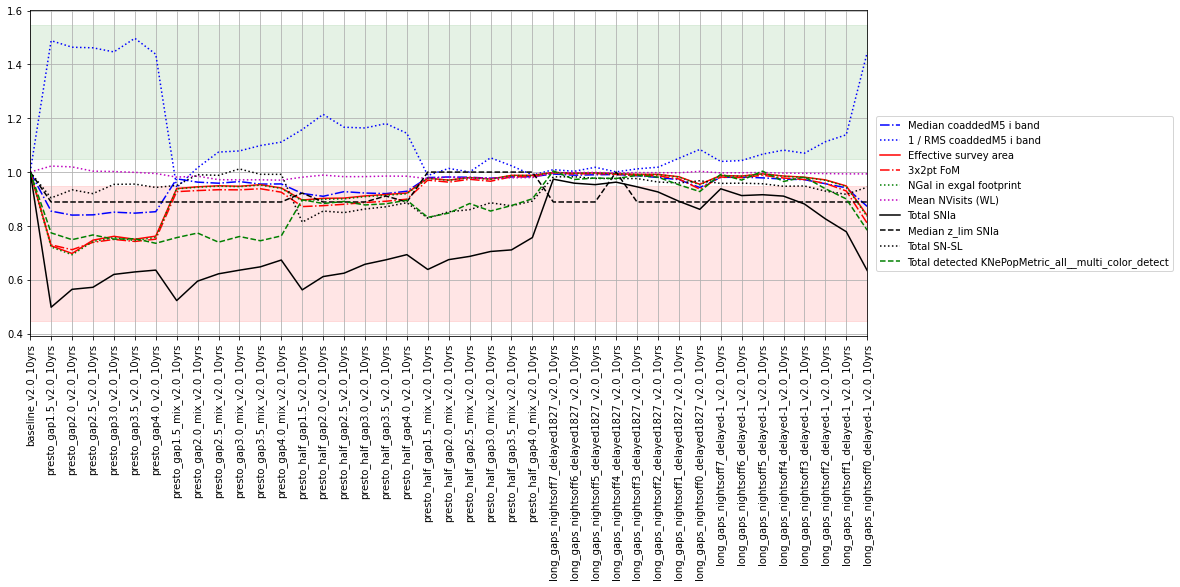

In [13]:
fam = 'triplets'
describe_family(fam)

The addition of triplets increases the slew time, which decreases the total number of visits in the survey. This decrease in visits negatively impacts many of the DESC static science metrics, and also the transient detection metrics. For infrequent versions of the 'long_gaps_nightsoffX' runs, the impact is not severe. 

---
**long gaps no pairs** : The baseline survey strategy takes pairs of visits every few nights, wherethe pair is separated by about 33 minutes. The pairs are taken in mixed filters, for color measurements. These simulations extend the gap between the pair of visits, for the FIRST pair "blob" of the night, modifying it to a variable time period of between 2 to 7 hours. The pair of visits are both in the same filter, in any of griz (g+r, r+i, or i+z pairs). In some of the simulations, these long gap visits are obtained throughout the survey, while for other simulations the longer time separations do not start until year 5.  
**version**: 2.0  
**runs**:  


metric                                          Median coaddedM5 i band  \
run                                                                       
baseline_v2.0_10yrs                                           26.183049   
long_gaps_np_nightsoff7_delayed1827_v2.0_10yrs                26.178744   
long_gaps_np_nightsoff6_delayed1827_v2.0_10yrs                26.175381   
long_gaps_np_nightsoff5_delayed1827_v2.0_10yrs                26.178907   
long_gaps_np_nightsoff4_delayed1827_v2.0_10yrs                26.175679   
long_gaps_np_nightsoff3_delayed1827_v2.0_10yrs                26.174413   
long_gaps_np_nightsoff2_delayed1827_v2.0_10yrs                26.163836   
long_gaps_np_nightsoff1_delayed1827_v2.0_10yrs                26.156989   
long_gaps_np_nightsoff0_delayed1827_v2.0_10yrs                26.124324   
long_gaps_np_nightsoff7_delayed-1_v2.0_10yrs                  26.176488   
long_gaps_np_nightsoff6_delayed-1_v2.0_10yrs                  26.167585   
long_gaps_np_nightsoff5_delayed-1_v2.0_10yrs                  26.169858   
long_gaps_np_nightsoff4_delayed-1_v2.0_10yrs                  26.164711   
long_gaps_np_nightsoff3_delayed-1_v2.0_10yrs                  26.158098   
long_gaps_np_nightsoff2_delayed-1_v2.0_10yrs                  26.148485   
long_gaps_np_nightsoff1_delayed-1_v2.0_10yrs                  26.122110   
long_gaps_np_nightsoff0_delayed-1_v2.0_10yrs                  26.042379   

metric                                          RMS coaddedM5 i band  \
run                                                                    
baseline_v2.0_10yrs                                         0.111224   
long_gaps_np_nightsoff7_delayed1827_v2.0_10yrs              0.111050   
long_gaps_np_nightsoff6_delayed1827_v2.0_10yrs              0.109389   
long_gaps_np_nightsoff5_delayed1827_v2.0_10yrs              0.111028   
long_gaps_np_nightsoff4_delayed1827_v2.0_10yrs              0.110301   
long_gaps_np_nightsoff3_delayed1827_v2.0_10yrs              0.109303   
long_gaps_np_nightsoff2_delayed1827_v2.0_10yrs              0.109681   
long_gaps_np_nightsoff1_delayed1827_v2.0_10yrs              0.107804   
long_gaps_np_nightsoff0_delayed1827_v2.0_10yrs              0.099483   
long_gaps_np_nightsoff7_delayed-1_v2.0_10yrs                0.106063   
long_gaps_np_nightsoff6_delayed-1_v2.0_10yrs                0.107230   
long_gaps_np_nightsoff5_delayed-1_v2.0_10yrs                0.108966   
long_gaps_np_nightsoff4_delayed-1_v2.0_10yrs                0.108916   
long_gaps_np_nightsoff3_delayed-1_v2.0_10yrs                0.106030   
long_gaps_np_nightsoff2_delayed-1_v2.0_10yrs                0.102332   
long_gaps_np_nightsoff1_delayed-1_v2.0_10yrs                0.097461   
long_gaps_np_nightsoff0_delayed-1_v2.0_10yrs                0.076340   

metric                                          Effective survey area  \
run                                                                     
baseline_v2.0_10yrs                                      16711.175770   
long_gaps_np_nightsoff7_delayed1827_v2.0_10yrs           16675.925437   
long_gaps_np_nightsoff6_delayed1827_v2.0_10yrs           16766.569150   
long_gaps_np_nightsoff5_delayed1827_v2.0_10yrs           16655.782389   
long_gaps_np_nightsoff4_delayed1827_v2.0_10yrs           16678.443318   
long_gaps_np_nightsoff3_delayed1827_v2.0_10yrs           16618.853469   
long_gaps_np_nightsoff2_delayed1827_v2.0_10yrs           16607.103358   
long_gaps_np_nightsoff1_delayed1827_v2.0_10yrs           16539.120573   
long_gaps_np_nightsoff0_delayed1827_v2.0_10yrs           15952.454315   
long_gaps_np_nightsoff7_delayed-1_v2.0_10yrs             16623.889231   
long_gaps_np_nightsoff6_delayed-1_v2.0_10yrs             16626.407112   
long_gaps_np_nightsoff5_delayed-1_v2.0_10yrs             16581.085255   
long_gaps_np_nightsoff4_delayed-1_v2.0_10yrs             16498.834478   
long_gaps_np_nightsoff3_delayed-1_v2.0_10yrs             16479.530724   
long_gaps_np_nightsoff2_delayed-1_v2.

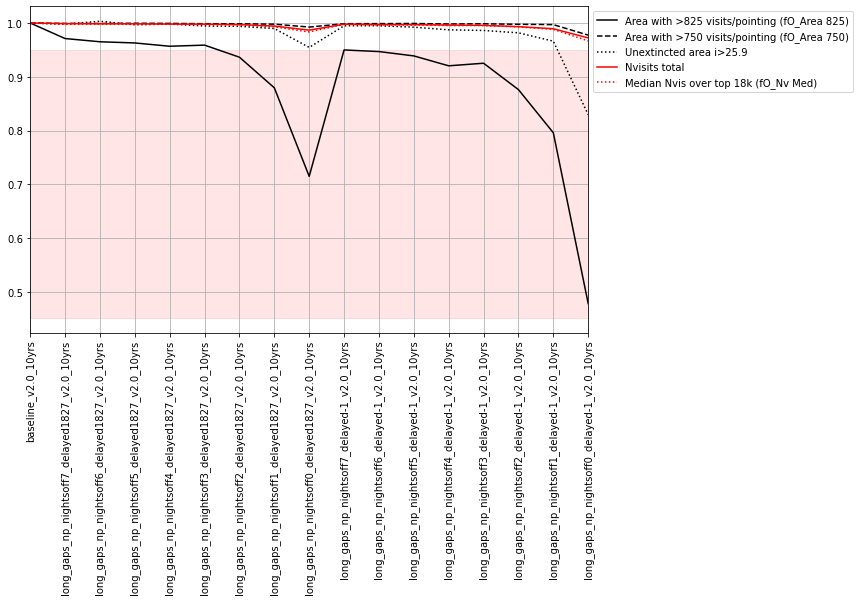

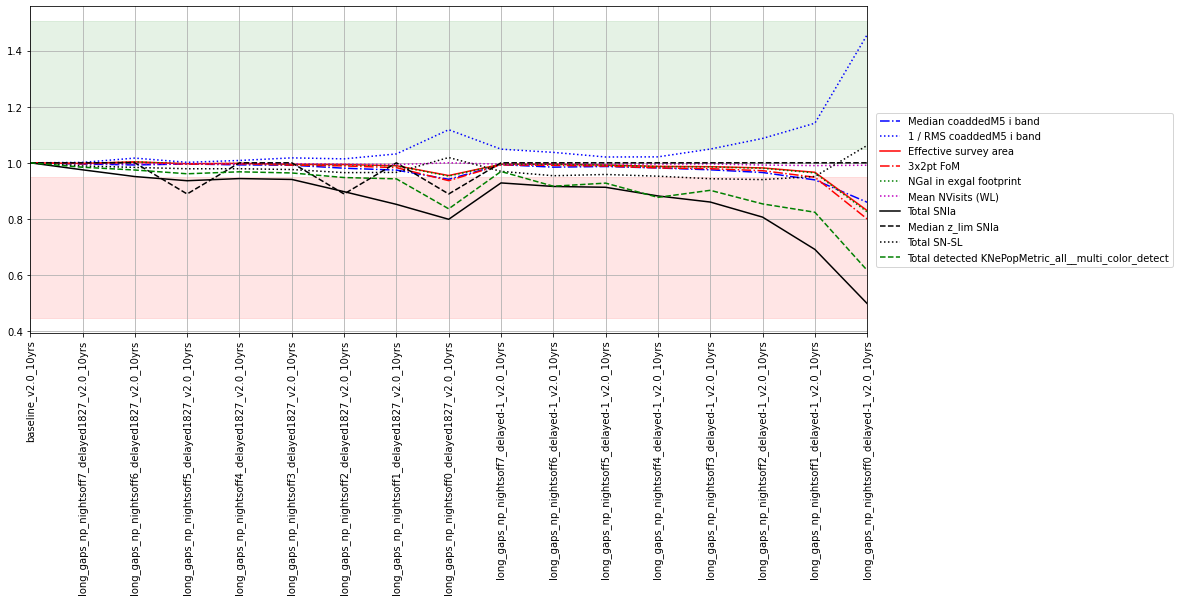

In [14]:
fam = 'long gaps no pairs'
describe_family(fam)

The separation of pairs of visits in the night impacts the transient detection metrics; this may be due to fewer pairs of visits being acquired in the same night (longer time spacing between pairs usually means fewer pairs). 

---
**suppress repeats** : This family of simulations adds a basis function to suppress repetition of visits to pointings on the sky which have already been observed in the same night. In the baseline, there are on the order of 20% of pointings which are observed 3 or more times per night (instead of only 2), so this basis function redistributes the "extra" 10% of visits into different nights, changing the inter-night cadence or season length.  
**version**: 2.1  
**runs**:  


metric                          Median coaddedM5 i band  RMS coaddedM5 i band  \
run                                                                             
baseline_v2.1_10yrs                           26.224653              0.125467   
no_repeat_rpw-1.0_v2.1_10yrs                  26.226243              0.125965   
no_repeat_rpw-2.0_v2.1_10yrs                  26.222775              0.124203   
no_repeat_rpw-5.0_v2.1_10yrs                  26.230432              0.124739   
no_repeat_rpw-10.0_v2.1_10yrs                 26.223099              0.124145   
no_repeat_rpw-20.0_v2.1_10yrs                 26.214930              0.125241   
no_repeat_rpw-100.0_v2.1_10yrs                26.219869              0.127615   

metric                          Effective survey area  3x2pt FoM  \
run                                                                
baseline_v2.1_10yrs                      16842.944872  38.560143   
no_repeat_rpw-1.0_v2.1_10yrs             16983.946204  38.930370   
no_repeat_rpw-2.0_v2.1_10yrs             17003.249958  38.954782   
no_repeat_rpw-5.0_v2.1_10yrs             16900.856134  38.749151   
no_repeat_rpw-10.0_v2.1_10yrs            16908.409776  38.715392   
no_repeat_rpw-20.0_v2.1_10yrs            16956.249514  38.778164   
no_repeat_rpw-100.0_v2.1_10yrs           16902.534721  38.676938   

metric                          NGal in exgal footprint  Mean NVisits (WL)  \
run                                                                          
baseline_v2.1_10yrs                        4.611300e+09         443.096621   
no_repeat_rpw-1.0_v2.1_10yrs               4.649554e+09         443.062710   
no_repeat_rpw-2.0_v2.1_10yrs               4.654634e+09         442.515672   
no_repeat_rpw-5.0_v2.1_10yrs               4.627546e+09         442.527089   
no_repeat_rpw-10.0_v2.1_10yrs              4.628588e+09         442.264469   
no_repeat_rpw-20.0_v2.1_10yrs              4.640728e+09         441.703064   
no_repeat_rpw-100.0_v2.1_10yrs             4.626604e+09         442.356423   

metric                          Total SNIa  Median z_lim SNIa  Total SN-SL  \
run                                                                          
baseline_v2.1_10yrs              24542.276                0.2     7.748698   
no_repeat_rpw-1.0_v2.1_10yrs     25813.408                0.2     8.671250   
no_repeat_rpw-2.0_v2.1_10yrs     26456.289                0.2     9.140247   
no_repeat_rpw-5.0_v2.1_10yrs     27178.910                0.2     9.494008   
no_repeat_rpw-10.0_v2.1_10yrs    26906.326                0.2     9.716295   
no_repeat_rpw-20.0_v2.1_10yrs    26691.310                0.2     9.823104   
no_repeat_rpw-100.0_v2.1_10yrs   26544.720                0.2     9.809941   

metric                          Total detected KNePopMetric_all__multi_color_detect  
run                                                                                  
baseline_v2.1_10yrs                                                        1830.0    
no_repeat_rpw-1.0_v2.1_10yrs                                               1817.0    
no_repeat_rpw-2.0_v2.1_10yrs                                               1806.0    
no_repeat_rpw-5.0_v2.1_10yrs                                               1873.0    
no_repeat_rpw-10.0_v2.1_10yrs                                              1866.0    
no_repeat_rpw-20.0_v2.1_10yrs                                              1855.0    
no_repeat_rpw-100.0_v2.1_10yrs                                             1830.0

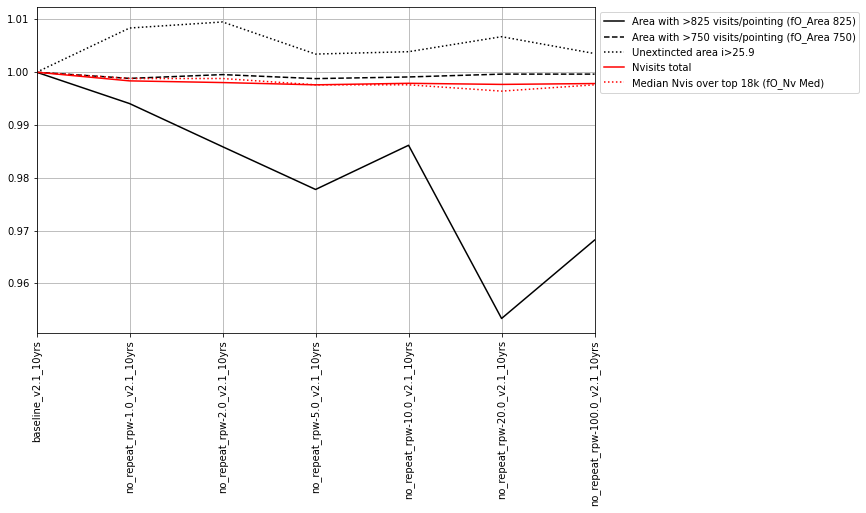

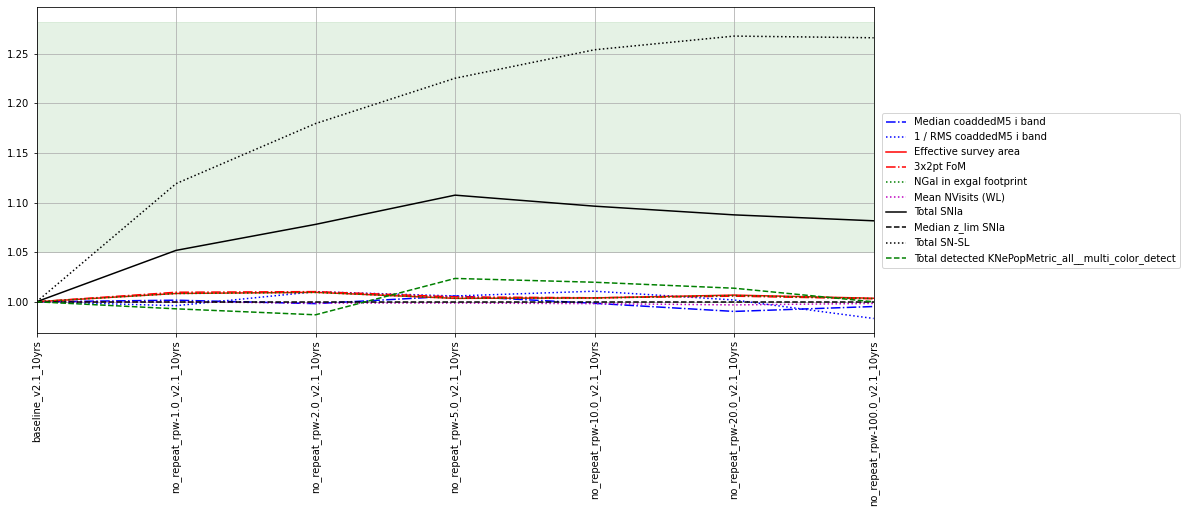

In [15]:
fam = 'suppress repeats'
describe_family(fam)

As the 'suppress repeats' weight becomes higher, the visits in a given night tend to be separated and placed into adjacent nights. In general, this seems to strongly improve the SNSL metric, and also other transient metrics. The static science metrics are unaffected.

---
**bluer balance** : The standard filter balance in the dust-free WFD in the baseline is {'u': 0.07, 'g': 0.09, 'r': 0.22, 'i': 0.22, 'z': 0.20, 'y': 0.20}. These simulations vary the filter balance, skewing it bluer. One simulation adds visits to g band,while the other adds visits to both u and g band, in each case by taking some visits from rizy.  
**version**: 2.0  
**runs**:  


---
**longer u visits** : The baseline survey uses 2x15s visits for all bands except u band. In the baseline, u band visits are 1x30s to reduce the effects of readnoise (which are most extreme in u, due to the low sky-background). These simulations extend the u band visit time further, to 1x50s. In one simulation, the total amount of survey time spent on u band is kept the same, so the number of visits is reduced accordingly. In the other simulation, more survey time is spent in u band in order to maintain the number of visits in u.  
**version**: 2.0  
**runs**:  


metric                  Median coaddedM5 i band  RMS coaddedM5 i band  \
run                                                                     
baseline_v2.0_10yrs                   26.183049              0.111224   
bluer_indx0_v2.0_10yrs                26.146639              0.105722   
bluer_indx1_v2.0_10yrs                26.149411              0.104912   
long_u1_v2.0_10yrs                    26.165333              0.105054   
long_u2_v2.0_10yrs                    26.190223              0.109476   

metric                  Effective survey area  3x2pt FoM  \
run                                                        
baseline_v2.0_10yrs              16711.175770  37.908126   
bluer_indx0_v2.0_10yrs           16155.563377  36.195295   
bluer_indx1_v2.0_10yrs           16210.117464  36.355753   
long_u1_v2.0_10yrs               16420.780169  37.022090   
long_u2_v2.0_10yrs               16687.675548  37.903751   

metric                  NGal in exgal footprint  Mean NVisits (WL)  \
run                                                                  
baseline_v2.0_10yrs                4.568638e+09         442.290894   
bluer_indx0_v2.0_10yrs             4.410278e+09         450.508910   
bluer_indx1_v2.0_10yrs             4.426129e+09         441.930672   
long_u1_v2.0_10yrs                 4.485891e+09         427.498850   
long_u2_v2.0_10yrs                 4.563243e+09         443.020067   

metric                  Total SNIa  Median z_lim SNIa  Total SN-SL  \
run                                                                  
baseline_v2.0_10yrs      24788.969              0.225     8.116086   
bluer_indx0_v2.0_10yrs   24746.849              0.200     7.898603   
bluer_indx1_v2.0_10yrs   24372.627              0.225     7.956437   
long_u1_v2.0_10yrs       22769.266              0.225     8.005726   
long_u2_v2.0_10yrs       24622.758              0.200     7.975755   

metric                  Total detected KNePopMetric_all__multi_color_detect  
run                                                                          
baseline_v2.0_10yrs                                                1713.0    
bluer_indx0_v2.0_10yrs                                             1697.0    
bluer_indx1_v2.0_10yrs                                             1695.0    
long_u1_v2.0_10yrs                                                 1706.0    
long_u2_v2.0_10yrs                                                 1747.0

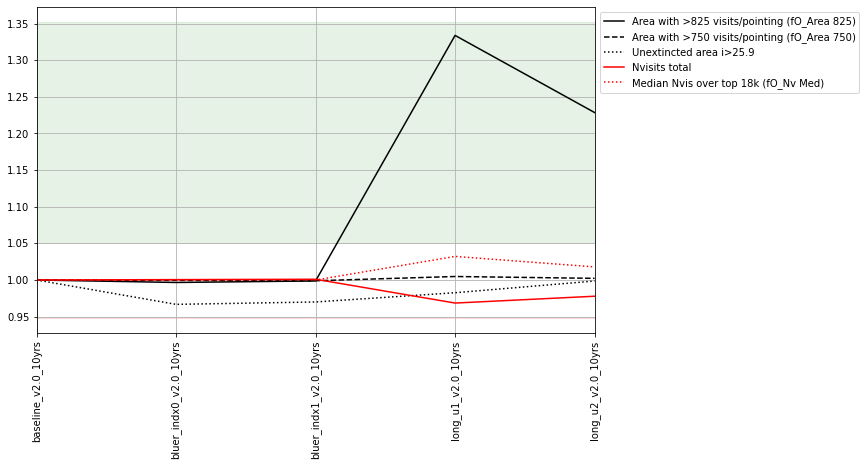

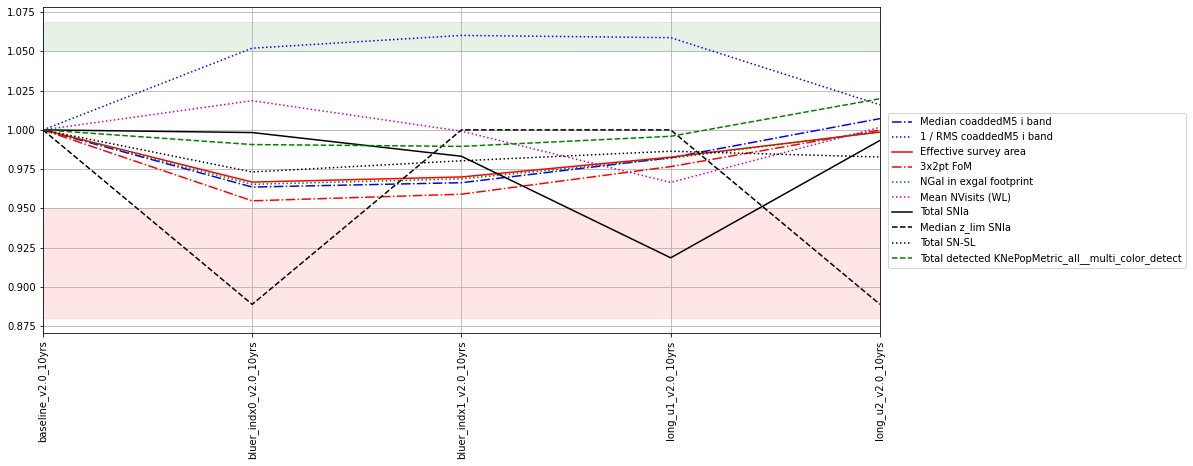

In [16]:
fam = ['bluer balance',  'longer u visits']
describe_family(fam)

Shifting visits into bluer bands is generally bad for effective survey area (due to fewer visits being used in i band), although this isn't a very strong effect.

---
**vary gp** : These simulations investigate the effect of varying the amount of survey time spent on covering the background (non-WFD-level) Galactic Plane area. The baseline characteristics, including the ratio of visits over the remainder of the footprint, are kept the same.  
**version**: 2.0  
**runs**:  


---
**galactic plane footprint** : These simulations use the galactic plane priority map, contributed by LSST SMLV & TVS science collaborations, as the basis for further variations on galactic plane coverage. Instead of a "bulge area" as in the baseline and vary gp family, different levels of priority of the galactic plane map are covered at WFD levels. In addition, pencil beam fields are added or not, in various simulations.   
**version**: 2.1  
**runs**:  


metric                                     Median coaddedM5 i band  \
run                                                                  
baseline_v2.0_10yrs                                      26.183049   
vary_gp_gpfrac0.01_v2.0_10yrs                            26.193514   
vary_gp_gpfrac0.05_v2.0_10yrs                            26.194081   
vary_gp_gpfrac0.10_v2.0_10yrs                            26.194424   
vary_gp_gpfrac0.15_v2.0_10yrs                            26.186410   
vary_gp_gpfrac0.20_v2.0_10yrs                            26.186397   
vary_gp_gpfrac0.25_v2.0_10yrs                            26.174918   
vary_gp_gpfrac0.30_v2.0_10yrs                            26.174795   
vary_gp_gpfrac0.35_v2.0_10yrs                            26.169414   
vary_gp_gpfrac0.40_v2.0_10yrs                            26.167055   
vary_gp_gpfrac0.45_v2.0_10yrs                            26.164271   
vary_gp_gpfrac0.50_v2.0_10yrs                            26.155223   
vary_gp_gpfrac0.55_v2.0_10yrs                            26.155056   
vary_gp_gpfrac0.75_v2.0_10yrs                            26.140584   
vary_gp_gpfrac1.00_v2.0_10yrs                            26.118138   
plane_priority_priority1.2_pbf_v2.1_10yrs                26.218360   
plane_priority_priority0.9_pbf_v2.1_10yrs                26.221168   
plane_priority_priority0.6_pbf_v2.1_10yrs                26.210424   
plane_priority_priority0.4_pbf_v2.1_10yrs                26.178506   
plane_priority_priority0.3_pbf_v2.1_10yrs                26.164504   
plane_priority_priority0.2_pbf_v2.1_10yrs                26.132986   
plane_priority_priority0.1_pbf_v2.1_10yrs                26.079105   
plane_priority_priority1.2_pbt_v2.1_10yrs                26.218360   
plane_priority_priority0.9_pbt_v2.1_10yrs                26.213957   
plane_priority_priority0.6_pbt_v2.1_10yrs                26.207256   
plane_priority_priority0.4_pbt_v2.1_10yrs                26.180475   
plane_priority_priority0.3_pbt_v2.1_10yrs                26.164733   
plane_priority_priority0.2_pbt_v2.1_10yrs                26.130182   
plane_priority_priority0.1_pbt_v2.1_10yrs                26.083221   
pencil_fs2_v2.1_10yrs                                    26.209914   
pencil_fs1_v2.1_10yrs                                    26.206657   

metric                                     RMS coaddedM5 i band  \
run                                                               
baseline_v2.0_10yrs                                    0.111224   
vary_gp_gpfrac0.01_v2.0_10yrs                          0.112069   
vary_gp_gpfrac0.05_v2.0_10yrs                          0.113707   
vary_gp_gpfrac0.10_v2.0_10yrs                          0.113406   
vary_gp_gpfrac0.15_v2.0_10yrs                          0.109915   
vary_gp_gpfrac0.20_v2.0_10yrs                          0.110098   
vary_gp_gpfrac0.25_v2.0_10yrs                          0.112216   
vary_gp_gpfrac0.30_v2.0_10yrs                          0.110335   
vary_gp_gpfrac0.35_v2.0_10yrs                          0.110386   
vary_gp_gpfrac0.40_v2.0_10yrs                          0.108546   
vary_gp_gpfrac0.45_v2.0_10yrs                          0.108666   
vary_gp_gpfrac0.50_v2.0_10yrs                          0.105858   
vary_gp_gpfrac0.55_v2.0_10yrs                          0.109990   
vary_gp_gpfrac0.75_v2.0_10yrs                          0.102451   
vary_gp_gpfrac1.00_v2.0_10yrs                          0.101095   
plane_priority_priority1.2_pbf_v2.1_10yrs              0.126788   
plane_priority_priority0.9_pbf_v2.1_10yrs              0.126998   
plane_priority_priority0.6_pbf_v2.1_10yrs              0.125969   
plane_priority_priority0.4_pbf_v2.1_10yrs              0.120736   
plane_priority_priority0.3_pbf_v2.1_10yrs              0.116542   
plane_priority_priority0.2_pbf_v2.1_10yrs              0.110529   
plane_priority_priority0.1_pbf_v2.1_10yrs              0.095720   
plane_priority_priority1.2_pbt_v2.1_10yrs              0.126788   
plane_priority

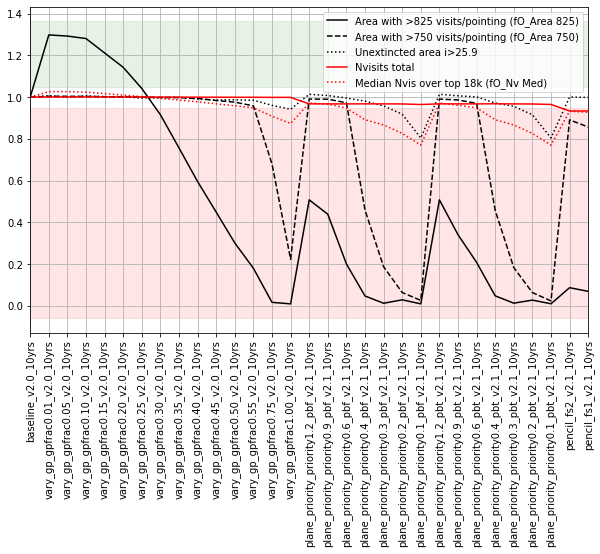

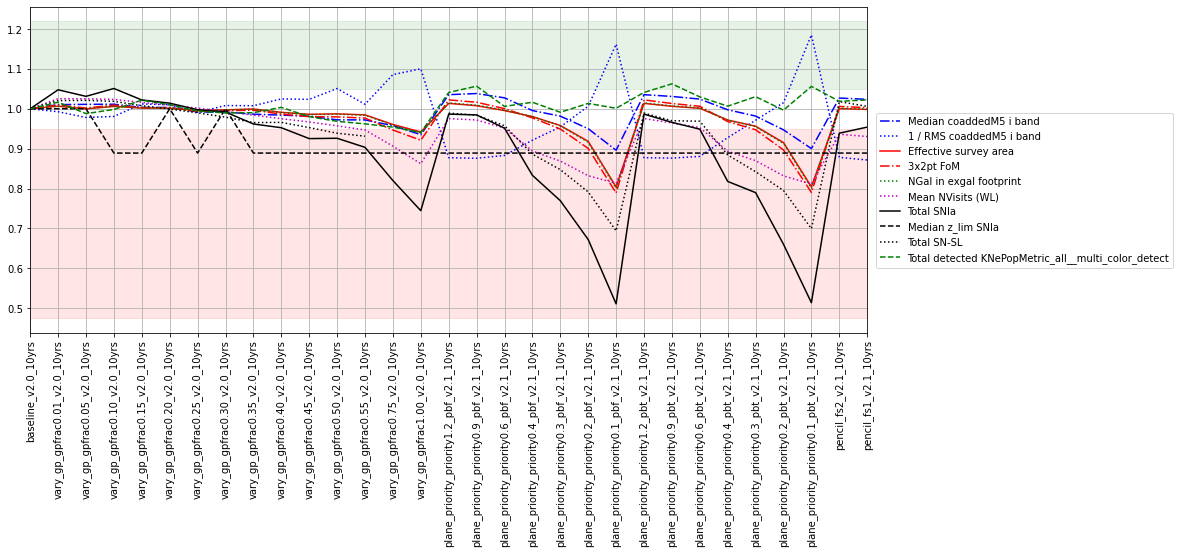

In [17]:
fam = ['vary gp', 'galactic plane footprint']
describe_family(fam)

Spending more time outside the low-dust WFD area (>.30 on the NES or GP) has a negative impact on all DESC metrics. Spending a smaller fraction of time on those mini-survey areas doesn't significantly improve DESC metrics however, and the amount of time spent on any of the mini-surveys has to increase by more than 20% or so to have a noticeable impact on the DESC metrics.

---
**vary nes** : These simulations investigate the effect of varying the amount of survey time spent on covering the North Ecliptic Spur area. The baseline characteristics, including the ratio of visits over the remainder of the footprint, are kept the same.   
**version**: 2.0  
**runs**:  


metric                           Median coaddedM5 i band  \
run                                                        
baseline_v2.0_10yrs                            26.183049   
vary_nes_nesfrac0.01_v2.0_10yrs                26.197349   
vary_nes_nesfrac0.05_v2.0_10yrs                26.195156   
vary_nes_nesfrac0.10_v2.0_10yrs                26.193052   
vary_nes_nesfrac0.15_v2.0_10yrs                26.187207   
vary_nes_nesfrac0.20_v2.0_10yrs                26.183959   
vary_nes_nesfrac0.25_v2.0_10yrs                26.180097   
vary_nes_nesfrac0.30_v2.0_10yrs                26.183049   
vary_nes_nesfrac0.35_v2.0_10yrs                26.170806   
vary_nes_nesfrac0.40_v2.0_10yrs                26.172428   
vary_nes_nesfrac0.45_v2.0_10yrs                26.164089   
vary_nes_nesfrac0.50_v2.0_10yrs                26.159769   
vary_nes_nesfrac0.55_v2.0_10yrs                26.151214   
vary_nes_nesfrac0.75_v2.0_10yrs                26.127128   
vary_nes_nesfrac1.00_v2.0_10yrs                26.120700   

metric                           RMS coaddedM5 i band  Effective survey area  \
run                                                                            
baseline_v2.0_10yrs                          0.111224           16711.175770   
vary_nes_nesfrac0.01_v2.0_10yrs              0.114105           16896.659665   
vary_nes_nesfrac0.05_v2.0_10yrs              0.110713           16868.962975   
vary_nes_nesfrac0.10_v2.0_10yrs              0.114435           16769.087031   
vary_nes_nesfrac0.15_v2.0_10yrs              0.109778           16760.694095   
vary_nes_nesfrac0.20_v2.0_10yrs              0.111453           16815.248182   
vary_nes_nesfrac0.25_v2.0_10yrs              0.111551           16691.032722   
vary_nes_nesfrac0.30_v2.0_10yrs              0.111224           16711.175770   
vary_nes_nesfrac0.35_v2.0_10yrs              0.111146           16583.603136   
vary_nes_nesfrac0.40_v2.0_10yrs              0.108705           16561.781501   
vary_nes_nesfrac0.45_v2.0_10yrs              0.108323           16518.138231   
vary_nes_nesfrac0.50_v2.0_10yrs              0.105478           16487.923660   
vary_nes_nesfrac0.55_v2.0_10yrs              0.106151           16366.226082   
vary_nes_nesfrac0.75_v2.0_10yrs              0.099400           16101.848583   
vary_nes_nesfrac1.00_v2.0_10yrs              0.102048           15719.969975   

metric                           3x2pt FoM  NGal in exgal footprint  \
run                                                                   
baseline_v2.0_10yrs              37.908126             4.568638e+09   
vary_nes_nesfrac0.01_v2.0_10yrs  38.495324             4.621887e+09   
vary_nes_nesfrac0.05_v2.0_10yrs  38.407499             4.613605e+09   
vary_nes_nesfrac0.10_v2.0_10yrs  38.134552             4.585918e+09   
vary_nes_nesfrac0.15_v2.0_10yrs  38.067924             4.583771e+09   
vary_nes_nesfrac0.20_v2.0_10yrs  38.183515             4.597263e+09   
vary_nes_nesfrac0.25_v2.0_10yrs  37.833131             4.563107e+09   
vary_nes_nesfrac0.30_v2.0_10yrs  37.908126             4.568638e+09   
vary_nes_nesfrac0.35_v2.0_10yrs  37.482975             4.532286e+09   
vary_nes_nesfrac0.40_v2.0_10yrs  37.440052             4.525967e+09   
vary_nes_nesfrac0.45_v2.0_10yrs  37.260553             4.512336e+09   
vary_nes_nesfrac0.50_v2.0_10yrs  37.147729             4.503656e+09   
vary_nes_nesfrac0.55_v2.0_10yrs  36.765826             4.468932e+09   
vary_nes_nesfrac0.75_v2.0_10yrs  35.891727             4.392011e+09   
vary_nes_nesfrac1.00_v2.0_10yrs  34.899788             4.286773e+09   

metric                           Mean NVisits (WL)  Total SNIa  \
run                                                              
baseline_v2.0_10yrs                     442.290894   24788.969   
vary_nes_nesfrac0.01_v2.0_10yrs         457.884463   26829.520   
vary_nes_nesfrac0.05_v2.0_10yrs         455.461715   26258.677   
vary_nes_nesfrac0.10_v2.0_10yrs         453.335836   26234.965   
vary_nes_nesfr

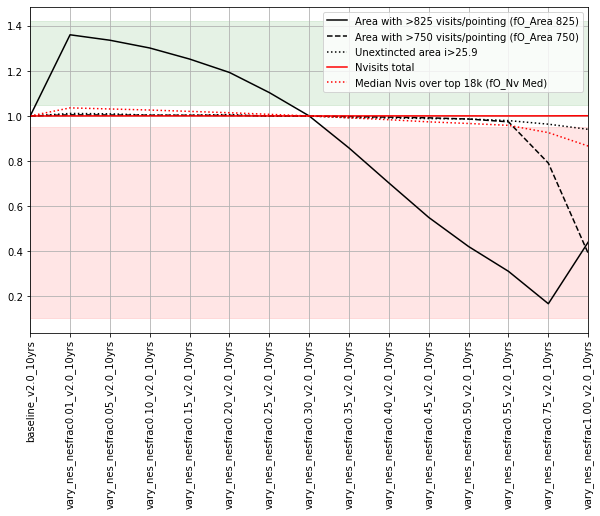

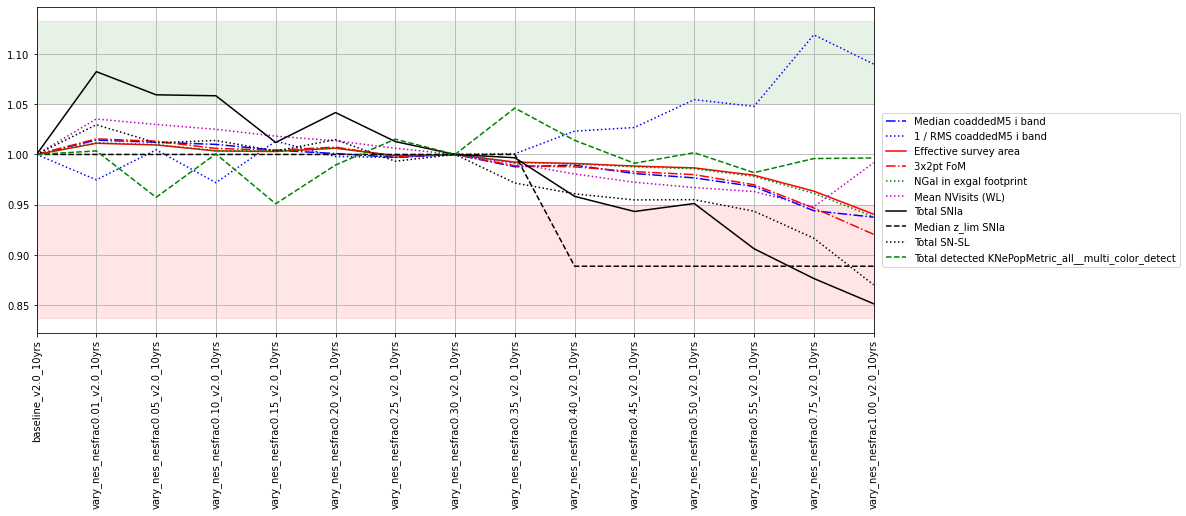

In [18]:
fam = ['vary nes']
describe_family(fam)

---
**vary expt** : The baseline survey strategy uses 2x15s visits for grizy filters, and 1x30s visits for u band. The simulations in this family vary the exposure time per visit from 20 to 40 seconds, to evaluate the impact on various metrics of varying individual image depth (the "shave_" runs). In addition, there is one simulation (`vary_expt_v2.0_10yrs`) which uses variable exposure time per visit to attempt to make the individual image depth consistent - each visit in this simulation could have an exposure time of between 20 to 100 seconds.  
**version**: --  
**runs**:  


metric                Median coaddedM5 i band  RMS coaddedM5 i band  \
run                                                                   
baseline_v2.1_10yrs                 26.224653              0.125467   
shave_20_v2.1_10yrs                 26.125088              0.105276   
shave_22_v2.1_10yrs                 26.150962              0.109248   
shave_25_v2.1_10yrs                 26.181066              0.115357   
shave_28_v2.1_10yrs                 26.212364              0.120782   
shave_30_v2.1_10yrs                 26.229043              0.127920   
shave_32_v2.1_10yrs                 26.241961              0.125725   
shave_35_v2.1_10yrs                 26.260815              0.131711   
shave_38_v2.1_10yrs                 26.276295              0.137737   
shave_40_v2.1_10yrs                 26.282809              0.136041   
vary_expt_v2.0_10yrs                26.134781              0.083843   

metric                Effective survey area  3x2pt FoM  \
run                                                      
baseline_v2.1_10yrs            16842.944872  38.560143   
shave_20_v2.1_10yrs            15422.020731  34.240271   
shave_22_v2.1_10yrs            15961.686545  35.752577   
shave_25_v2.1_10yrs            16501.352358  37.355180   
shave_28_v2.1_10yrs            16810.212420  38.386018   
shave_30_v2.1_10yrs            17008.285720  39.012207   
shave_32_v2.1_10yrs            17111.518839  39.363850   
shave_35_v2.1_10yrs            17180.340917  39.663268   
shave_38_v2.1_10yrs            17224.823481  39.874086   
shave_40_v2.1_10yrs            17265.948869  40.016812   
vary_expt_v2.0_10yrs           16948.695871  38.145940   

metric                NGal in exgal footprint  Mean NVisits (WL)  Total SNIa  \
run                                                                            
baseline_v2.1_10yrs              4.611300e+09         443.096621   24542.276   
shave_20_v2.1_10yrs              4.206577e+09         595.573224    6133.436   
shave_22_v2.1_10yrs              4.357916e+09         557.288095    7102.520   
shave_25_v2.1_10yrs              4.510520e+09         508.306953    8864.657   
shave_28_v2.1_10yrs              4.599839e+09         467.542913    9955.335   
shave_30_v2.1_10yrs              4.656984e+09         443.512065   24267.179   
shave_32_v2.1_10yrs              4.687389e+09         421.346920   24918.858   
shave_35_v2.1_10yrs              4.708848e+09         392.584612   24102.663   
shave_38_v2.1_10yrs              4.723098e+09         367.103494   23126.613   
shave_40_v2.1_10yrs              4.735963e+09         352.109761   22274.165   
vary_expt_v2.0_10yrs             4.624725e+09         393.512776   12231.828   

metric                Median z_lim SNIa  Total SN-SL  \
run                                                    
baseline_v2.1_10yrs               0.200     7.748698   
shave_20_v2.1_10yrs               0.100     8.390000   
shave_22_v2.1_10yrs               0.100     8.297883   
shave_25_v2.1_10yrs               0.150     8.344714   
shave_28_v2.1_10yrs               0.150     8.050823   
shave_30_v2.1_10yrs               0.205     7.803867   
shave_32_v2.1_10yrs               0.250     7.546428   
shave_35_v2.1_10yrs               0.250     7.207590   
shave_38_v2.1_10yrs               0.250     6.740664   
shave_40_v2.1_10yrs               0.250     6.557118   
vary_expt_v2.0_10yrs              0.200     8.430330   

metric                Total detected KNePopMetric_all__multi_color_detect  
run                                                                        
baseline_v2.1_10yrs                                              1830.0    
shave_20_v2.1_10yrs                                              1716.0    
shave_22_v2.1_10yrs                                              1786.0    
shave_25_v2.1_10yrs                                              1775.0    
shave_28_v2.1_10yrs                                              1750.0    
shave_30_v2.1_10yrs

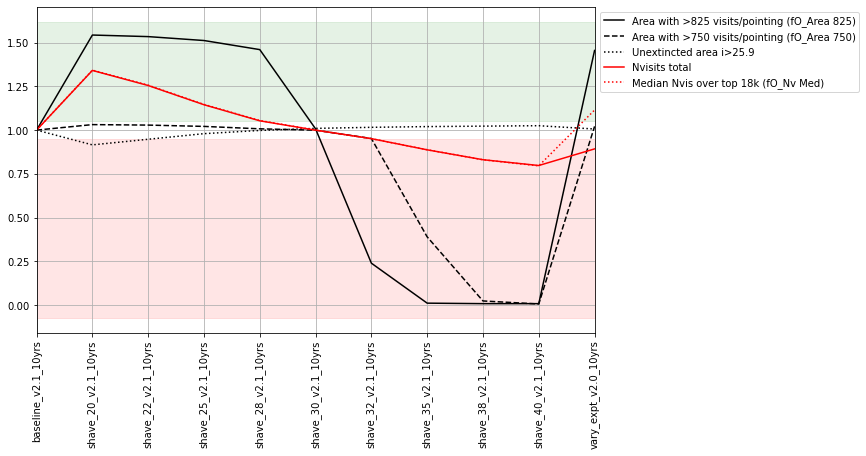

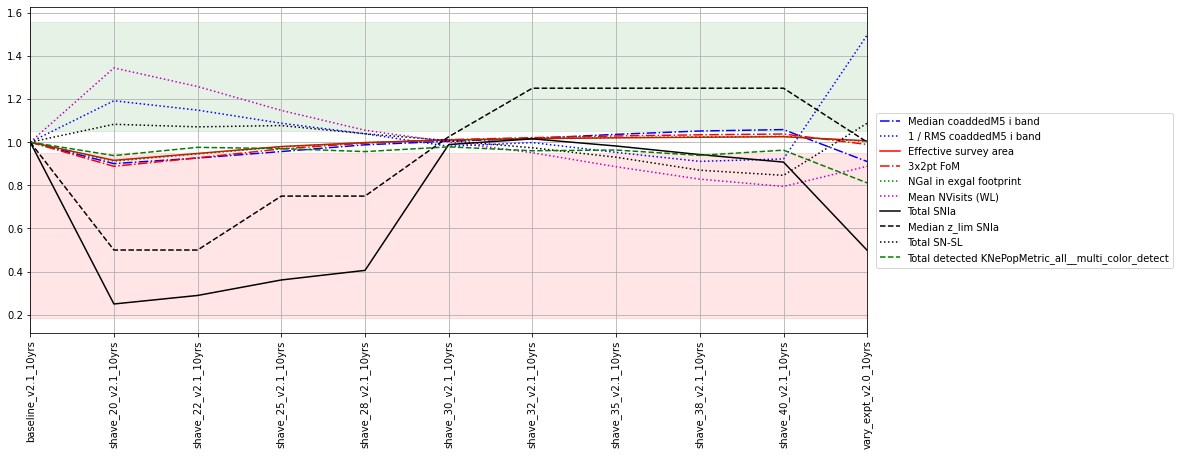

In [19]:
fam = ['vary expt']
describe_family(fam)

The transient metrics are most sensitive to the exposure time, although the effective survey area does start to drop noticeably as the exposure time drops to 20s. Typical visit overhead is 12s (1s+1s for shutter/exp, 2s readout, 8s slew) although we do see a mean slew time trend across this family as well (the shorter exposures having shorter slewtimes, longer exposures having longer slew times -- varying by about 1.2s). This makes the average 'time per visit' vary from 31.2s (at 20s visits) to 41.8s (at 30s visits) to 52.4s (at 40s visits) - a swing of about 60% from min/max exposure time, or +/-30% around the baseline -- which is reflected in the total number of visits in the survey. 

The transient metrics will respond quickly to the total number of visits, as will the mean visits in gri. 

The static science metrics scale primarily with the effective survey area, which includes the part of the sky which reaches a nominal depth in i-band at year 10 of 25.9 (after adding galactic dust extinction). The median depth in all of these runs varies slightly, from 26.12 (20s) to  26.28 (40s), which places the median beyond this cutoff; however this median value is measured on the part of the sky which reaches the 25.9 minimum. Looking at the entire sky without this cut, the median ranges from 25.96 to 26.13, so clearly there are regions which will start to fall below the 25.9 cutoff when the exposure time is 20s. This is visible in the edges of the footprint in particular. 


---
**good seeing** : This family of simulations adds a requirement for 3 "good seeing" (seeing < 0.8 arcseconds) images per year, in various bandpasses. Note that `baseline_v2.1_10yrs` (and other v2.1 simulations) adds this requirement in r and i bands as the default.  
**version**: 2.1  
**runs**:  


metric                            Median coaddedM5 i band  \
run                                                         
baseline_v2.1_10yrs                             26.224653   
good_seeing_gsw0.0_v2.1_10yrs                   26.178592   
good_seeing_gsw1.0_v2.1_10yrs                   26.201303   
good_seeing_gsw3.0_v2.1_10yrs                   26.224653   
good_seeing_gsw6.0_v2.1_10yrs                   26.240366   
good_seeing_gsw10.0_v2.1_10yrs                  26.241477   
good_seeing_gsw20.0_v2.1_10yrs                  26.244344   
good_seeing_gsw50.0_v2.1_10yrs                  26.244334   
good_seeing_u_gsw0.0_v2.1_10yrs                 26.186160   
good_seeing_u_gsw1.0_v2.1_10yrs                 26.197691   
good_seeing_u_gsw3.0_v2.1_10yrs                 26.228274   
good_seeing_u_gsw6.0_v2.1_10yrs                 26.233011   
good_seeing_u_gsw10.0_v2.1_10yrs                26.231410   
good_seeing_u_gsw20.0_v2.1_10yrs                26.234068   
good_seeing_u_gsw50.0_v2.1_10yrs                26.230754   

metric                            RMS coaddedM5 i band  Effective survey area  \
run                                                                             
baseline_v2.1_10yrs                           0.125467           16842.944872   
good_seeing_gsw0.0_v2.1_10yrs                 0.107596           16662.496738   
good_seeing_gsw1.0_v2.1_10yrs                 0.121316           16831.194761   
good_seeing_gsw3.0_v2.1_10yrs                 0.125467           16842.944872   
good_seeing_gsw6.0_v2.1_10yrs                 0.129091           16857.212864   
good_seeing_gsw10.0_v2.1_10yrs                0.135413           16915.963419   
good_seeing_gsw20.0_v2.1_10yrs                0.135539           16857.212864   
good_seeing_gsw50.0_v2.1_10yrs                0.136402           16866.445094   
good_seeing_u_gsw0.0_v2.1_10yrs               0.113392           16677.604024   
good_seeing_u_gsw1.0_v2.1_10yrs               0.119470           16773.283500   
good_seeing_u_gsw3.0_v2.1_10yrs               0.126090           16884.909554   
good_seeing_u_gsw6.0_v2.1_10yrs               0.132835           16842.105578   
good_seeing_u_gsw10.0_v2.1_10yrs              0.135916           16841.266285   
good_seeing_u_gsw20.0_v2.1_10yrs              0.135402           16864.766507   
good_seeing_u_gsw50.0_v2.1_10yrs              0.134843           16837.069817   

metric                            3x2pt FoM  NGal in exgal footprint  \
run                                                                    
baseline_v2.1_10yrs               38.560143             4.611300e+09   
good_seeing_gsw0.0_v2.1_10yrs     37.747845             4.554577e+09   
good_seeing_gsw1.0_v2.1_10yrs     38.356787             4.604379e+09   
good_seeing_gsw3.0_v2.1_10yrs     38.560143             4.611300e+09   
good_seeing_gsw6.0_v2.1_10yrs     38.709880             4.617206e+09   
good_seeing_gsw10.0_v2.1_10yrs    38.866184             4.633425e+09   
good_seeing_gsw20.0_v2.1_10yrs    38.738235             4.617610e+09   
good_seeing_gsw50.0_v2.1_10yrs    38.761442             4.620395e+09   
good_seeing_u_gsw0.0_v2.1_10yrs   37.846207             4.559761e+09   
good_seeing_u_gsw1.0_v2.1_10yrs   38.180830             4.588122e+09   
good_seeing_u_gsw3.0_v2.1_10yrs   38.693097             4.622802e+09   
good_seeing_u_gsw6.0_v2.1_10yrs   38.618787             4.611923e+09   
good_seeing_u_gsw10.0_v2.1_10yrs  38.605066             4.611818e+09   
good_seeing_u_gsw20.0_v2.1_10yrs  38.683807             4.618516e+09   
good_seeing_u_gsw50.0_v2.1_10yrs  38.589668             4.610809e+09   

metric                            Mean NVisits (WL)  Total SNIa  \
run                                                               
baseline_v2.1_10yrs                      443.096621   24542.276   
good_seeing_gsw0.0_v2.1_10yrs            443.070115   24255.912   
good_seeing_gsw1.0_v2.1_10yrs            442.805974   24555.320   
good_seeing_gsw3.0_v2.1_

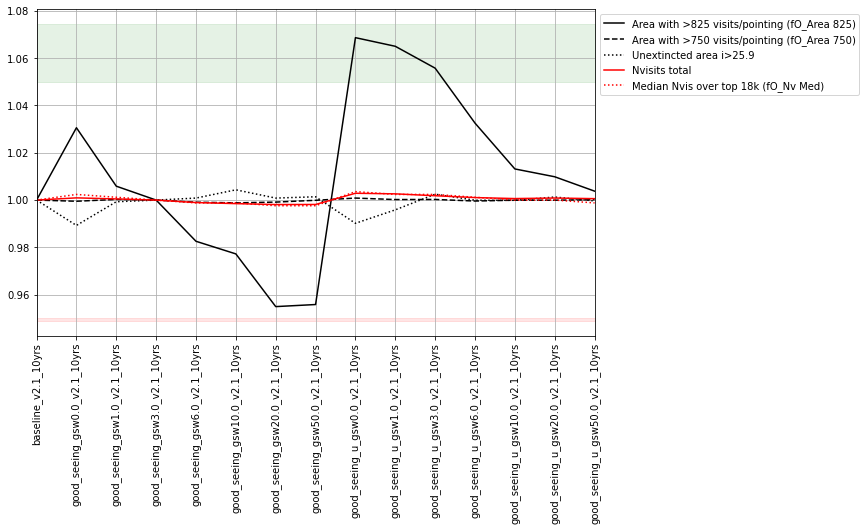

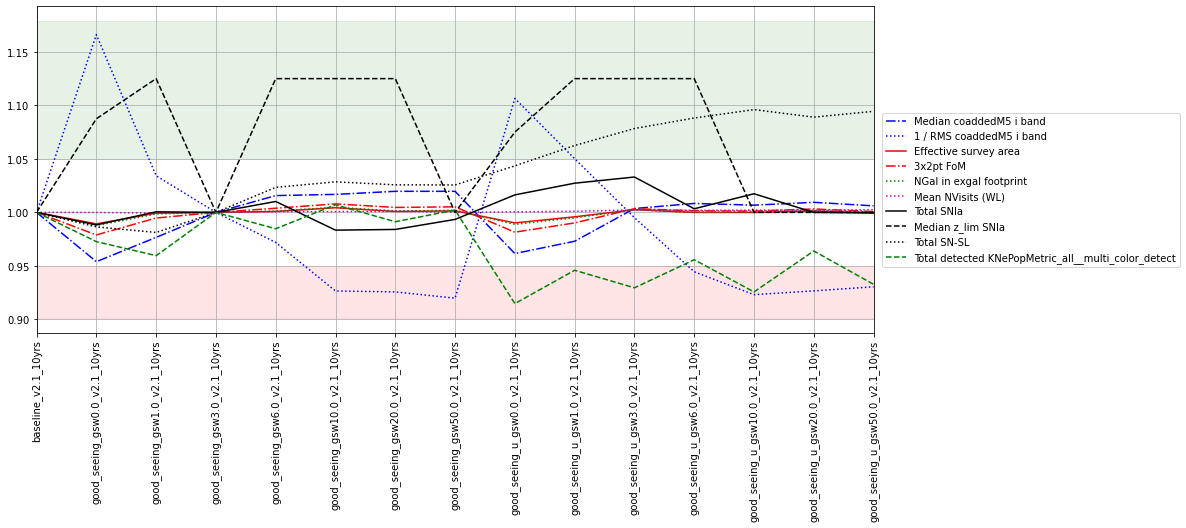

In [21]:
fam = ['good seeing']
describe_family(fam)

In general the good-seeing runs have a relatively small effect, although they do shift depth between bandpasses (as better seeing visits are now acquired in different bandpasses than in the baseline).

---
**microsurveys** : There are special programs which can achieve additional science beyond or supporting the primary Rubin LSST science drivers, if provided specialized observing time via "microsurveys". These simulations investigate a subset of microsurvey proposals, described further in their brief descriptions.  
**version**: 2.0  
**runs**:  


---
**twilight neo 15s** : This microsurvey family is an update of the v2.0 twilight NEO microsurvey. The visits in the v2.0 simulations were 1s long; here they are updated to 15s long, so that the shutter is moving within the camera team specified requirements. The change also leads to a boost in NEO discoveries so should be considered a replacement for the v2.0 twilight NEO microsurvey. The additional visits here are low-solar elongation, high airmass 15s visits during morning and evening twilight.   
**version**: 2.2  
**runs**:  


metric                              Median coaddedM5 i band  \
run                                                           
baseline_v2.0_10yrs                               26.183049   
virgo_cluster_v2.0_10yrs                          26.179898   
carina_v2.0_10yrs                                 26.159741   
smc_movie_v2.0_10yrs                              26.176621   
roman_v2.0_10yrs                                  26.178905   
...                                                     ...   
twi_neo_repeat4_riz_np6_v2.2_10yrs                26.221510   
twi_neo_repeat4_riz_np5_v2.2_10yrs                26.217667   
twi_neo_repeat4_riz_np3_v2.2_10yrs                26.224757   
twi_neo_repeat4_riz_np2_v2.2_10yrs                26.219885   
twi_neo_repeat4_riz_np1_v2.2_10yrs                26.205370   

metric                              RMS coaddedM5 i band  \
run                                                        
baseline_v2.0_10yrs                             0.111224   
virgo_cluster_v2.0_10yrs                        0.109142   
carina_v2.0_10yrs                               0.108413   
smc_movie_v2.0_10yrs                            0.110447   
roman_v2.0_10yrs                                0.110391   
...                                                  ...   
twi_neo_repeat4_riz_np6_v2.2_10yrs              0.127390   
twi_neo_repeat4_riz_np5_v2.2_10yrs              0.126636   
twi_neo_repeat4_riz_np3_v2.2_10yrs              0.128976   
twi_neo_repeat4_riz_np2_v2.2_10yrs              0.127516   
twi_neo_repeat4_riz_np1_v2.2_10yrs              0.123545   

metric                              Effective survey area  3x2pt FoM  \
run                                                                    
baseline_v2.0_10yrs                          16711.175770  37.908126   
virgo_cluster_v2.0_10yrs                     16685.996960  37.818604   
carina_v2.0_10yrs                            16385.529835  36.886157   
smc_movie_v2.0_10yrs                         16743.068928  37.939982   
roman_v2.0_10yrs                             16671.728968  37.774065   
...                                                   ...        ...   
twi_neo_repeat4_riz_np6_v2.2_10yrs           16658.300270  38.068465   
twi_neo_repeat4_riz_np5_v2.2_10yrs           16638.157223  37.988455   
twi_neo_repeat4_riz_np3_v2.2_10yrs           16753.140452  38.332918   
twi_neo_repeat4_riz_np2_v2.2_10yrs           16640.675104  38.011623   
twi_neo_repeat4_riz_np1_v2.2_10yrs           16450.994740  37.420875   

metric                              NGal in exgal footprint  \
run                                                           
baseline_v2.0_10yrs                            4.568638e+09   
virgo_cluster_v2.0_10yrs                       4.561217e+09   
carina_v2.0_10yrs                              4.475945e+09   
smc_movie_v2.0_10yrs                           4.576140e+09   
roman_v2.0_10yrs                               4.557612e+09   
...                                                     ...   
twi_neo_repeat4_riz_np6_v2.2_10yrs             4.560113e+09   
twi_neo_repeat4_riz_np5_v2.2_10yrs             4.553773e+09   
twi_neo_repeat4_riz_np3_v2.2_10yrs             4.586468e+09   
twi_neo_repeat4_riz_np2_v2.2_10yrs             4.554612e+09   
twi_neo_repeat4_riz_np1_v2.2_10yrs             4.500611e+09   

metric                              Mean NVisits (WL)  Total SNIa  \
run                                                                 
baseline_v2.0_10yrs                        442.290894   24788.969   
virgo_cluster_v2.0_10yrs                   440.272069   24114.586   
carina_v2.0_10yrs                          440.597910   24976.465   
smc_movie_v2.0_10yrs                       441.101058   24611.719   
roman_v2.0_10yrs                           440.752718   24970.706   
...                                               ...         ...   
twi_neo_repeat4_riz_np6_v2.2_10yrs         418.354847   24670.141   
twi_neo_repeat4_riz_n

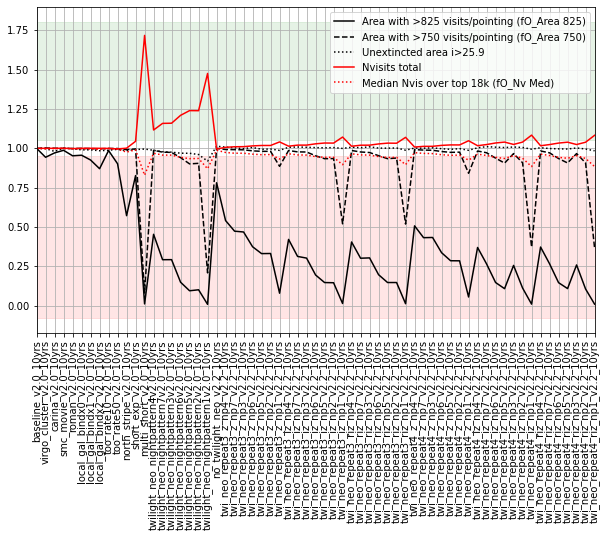

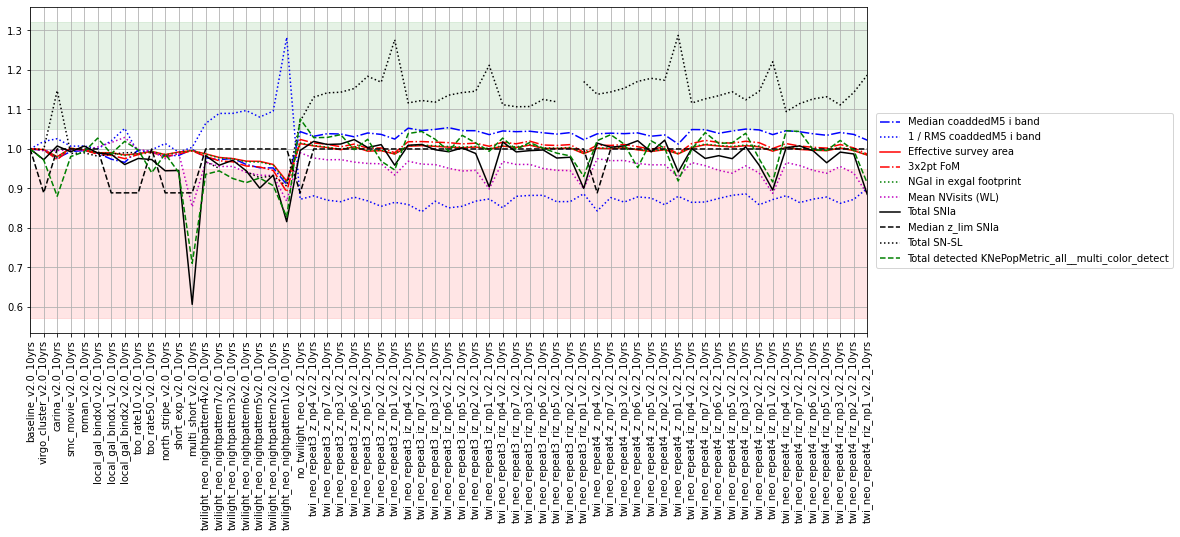

In [26]:
fam = ['microsurveys', 'twilight neo 15s']
describe_family(fam)

In general, the impact of the microsurveys can be traced to their impact on the total number of visits available in the extragalactic WFD region. The multi-short microsurvey (which actually diverts a large amount of time into short exposure visits) has a dramatic negative impact, and many of the v2.0 versions of the twilight_neo runs have negative impacts on the order of 10% or more. The newer '15s' twilight neo microsurveys are not as negative, as these additional visits are longer in duration, and their placement on the sky extends the season which benefits the SNSL metric. 

---
**technical** : This family is primarily aimed at questions arising in the course of the project team work, but one simulation seemed interesting to make available to the community. This is the `march_start_v2.1_10yrs` run, which simulates a March 2023 start to the survey. This is impractical, but could serve as a useful off-season comparison to the baseline, which starts in October 2024.   
**version**: 2.1  
**runs**:  


metric                  Median coaddedM5 i band  RMS coaddedM5 i band  \
run                                                                     
baseline_v2.1_10yrs                   26.224653              0.125467   
march_start_v2.1_10yrs                26.231506              0.129168   

metric                  Effective survey area  3x2pt FoM  \
run                                                        
baseline_v2.1_10yrs              16842.944872  38.560143   
march_start_v2.1_10yrs           16935.267173  38.844199   

metric                  NGal in exgal footprint  Mean NVisits (WL)  \
run                                                                  
baseline_v2.1_10yrs                4.611300e+09         443.096621   
march_start_v2.1_10yrs             4.637894e+09         441.207999   

metric                  Total SNIa  Median z_lim SNIa  Total SN-SL  \
run                                                                  
baseline_v2.1_10yrs      24542.276              0.200     7.748698   
march_start_v2.1_10yrs   25079.530              0.225     7.920824   

metric                  Total detected KNePopMetric_all__multi_color_detect  
run                                                                          
baseline_v2.1_10yrs                                                1830.0    
march_start_v2.1_10yrs                                             1966.0

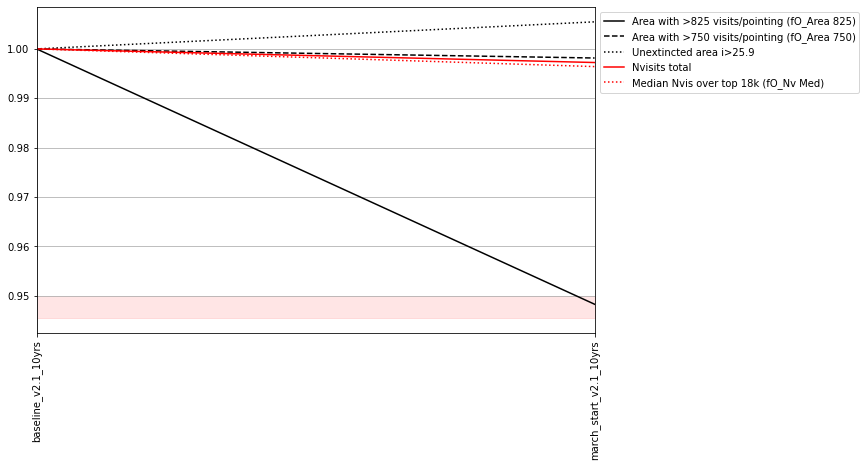

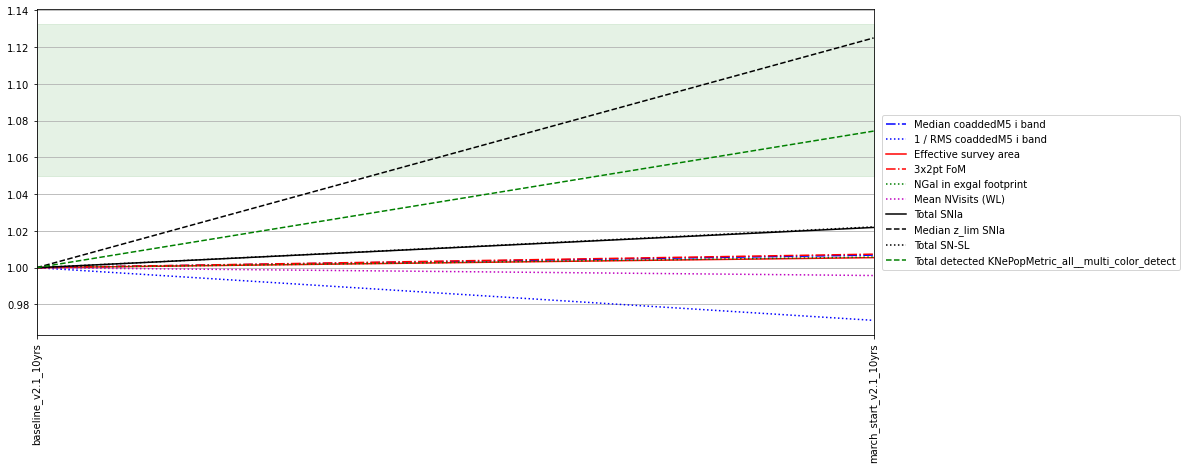

In [27]:
fam = ['technical']
describe_family(fam)

Starting the survey in march instead of october has little impact on static science metrics, but might impact transient metrics to some extent (likely due to small changes in the starting and ending season lengths - i.e. the location where the survey starts on the sky). 

---
**ddf percent** : The baseline survey strategy adds five Deep Drilling Fields, each allocated about 1% of the total survey observing time, for about 5% total. In these simulations, the amount of time allocated for DDFs is varied from 3 to 8%. It is worth noting that we anticipate implementing improvements on the DDF scheduling algorithm in the next six months, and will revisit more complicated DDF scheduling requests with that improvement in hand.This family uses "original" DDF scheduling, not the v2.1 pre-scheduled optimized visits.  
**version**: 2.0  
**runs**:  


---
**ddf euclid moved** : This simulation moves the fifth DDF from Euclid South to an otherwise optimally (for non-competition between DDF locations purposes) located field. The purpose is to show that choosing Euclid South for the fifth DDF has little to no impact on the rest of the survey outside the DDF fields. This was demonstrated to the SCOC in slides located available at  https://docs.google.com/presentation/d/1TSKXsEX2Q3aY60dDVpc6Q9K2irxEyxQhVQBqLMetvag/edit#slide=id.p  
**version**: 2.1  
**runs**:  


---
**ddf season length** : This family investigates the effect of varying the season length within the DDF fields. `season length fraction` reflects how much of the available season is used -- 0.1 indicates that 10% of the available season is removed at each end (for a total of 80% of the available season used for observations), while 0.3 would indicate that 40% of the total possible season is used. This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


---
**ddf double** : This family cuts the individual DDF sequences in half, resulting in brighter single night coadded depths, but a shorter interval of nights between visits. This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


---
**ddf quad** : This family cuts the individual DDF sequences by four, resulting in brighter single night coadded depths, but an even shorter interval of nights between visits.This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


---
**ddf quad subfilter** : Similar to the ddf quad family, the sequences for individual DDFs are cut shorter by about 1/4 compared to baseline. However, here only some filters are used in each DDF sequence, alternating between active filters on different nights.This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


---
**ddf bright** : Similar to the ddf quad family, the sequences for individual DDFs are cut shorter by about 1/4 compared to baseline. In this family, the m5 limits for scheduling visits are relaxed, resulting in visits running more consistently throughout the lunar cycle even into bright time. This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


---
**ddf dither** : This family varies the dithering pattern for the DDF sequences, changing the max translational dither from 0.01 to 3.5 degrees. Increasing dither sizes are expected to improve calibration, while decreasing dither sizes may improve final coadded depth over the smaller total observed area.  
**version**: 2.1  
**runs**:  


---
**ddf roll** : This family adds a rolling cadence to the DDFs, so that DD fields are observed more intensely in some years, less intensely in others.This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


---
**ddf accordian** : This family adds an "accordian" low/high rate over each season approach to DDF cadence. The edges of each season are observed at a "low" rate while the center of the season is observed at a faster "high" rate. Each simulation is identified by a total season length fraction (as in `ddf season`) with a similar low season fraction (`lsf`) within that and a low season rate (lsr). Thus `ddf_accourd_sf0.30_lsf0.4_lsr0.1_v2.1_10yrs` would have a fairly short overall season (40% of the available season), a long low season (80% - so 20% high season), and a small low season rate (0.1), leaving most DDF visits concentrated in the center of the season. Conversely, `ddf_accourd_sf0.10_lsf0.1_lsr0.5_v2.1_10yrs` would have a long overall season, a short low season, and a high rate during the low season, resulting in a very mild accordian effect. This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


---
**ddf old rot** : This family adds a validation or comparison option for the remainder of the v2.1 DDF simulations. In this family, the rotation angle is fixed so that rotTelPos is constant; in most v2.1 simulations, rotSkyPos is held fixed. Otherwise this family is similar to `ddf season length`, and uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


---
**ddf deep universal** : This family uses longer and more frequent nightly sequences for the DDFs. These sequences are described in a DESC DDF paper, and are roughly 41 visits per night every night during the season. This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


---
**ddf deep rolling** : This family is based on the `ddf deep universal` but adds a rolling cadence to the DDF fields. The rolling cadence simply observes each field for two seasons, and then stops, thus reducing the overall time requirement for the DDFs from the budget requested in `ddf deep universal`. This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


---
**ddf early deep** : This family reduces the overall number of DDFs to 3; XMM-LSS, COSMOS, and the double pointing EDFS. A deep nightly sequence and fast cadence is requested on these few fields.This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


metric                                           Median coaddedM5 i band  \
run                                                                        
baseline_v2.0_10yrs                                            26.183049   
ddf_frac_ddf_per0.6_v2.0_10yrs                                 26.189635   
ddf_frac_ddf_per1.6_v2.0_10yrs                                 26.151835   
ddf_euclid_moved_slf0.20_v2.1_10yrs                            26.224316   
ddf_season_length_slf0.10_v2.1_10yrs                           26.230725   
...                                                                  ...   
ddf_deep_u_slf0.20_v2.1_10yrs                                  26.183614   
ddf_deep_rolling_slf0.20_v2.1_10yrs                            26.234601   
ddf_early_deep_slf0.20_f10.60_f20.70_v2.1_10yrs                26.255833   
ddf_early_deep_slf0.20_f10.60_f20.75_v2.1_10yrs                26.243288   
ddf_early_deep_slf0.20_f10.60_f20.80_v2.1_10yrs                26.243709   

metric                                           RMS coaddedM5 i band  \
run                                                                     
baseline_v2.0_10yrs                                          0.111224   
ddf_frac_ddf_per0.6_v2.0_10yrs                               0.110785   
ddf_frac_ddf_per1.6_v2.0_10yrs                               0.102554   
ddf_euclid_moved_slf0.20_v2.1_10yrs                          0.125253   
ddf_season_length_slf0.10_v2.1_10yrs                         0.125790   
...                                                               ...   
ddf_deep_u_slf0.20_v2.1_10yrs                                0.115015   
ddf_deep_rolling_slf0.20_v2.1_10yrs                          0.130074   
ddf_early_deep_slf0.20_f10.60_f20.70_v2.1_10yrs              0.127487   
ddf_early_deep_slf0.20_f10.60_f20.75_v2.1_10yrs              0.128099   
ddf_early_deep_slf0.20_f10.60_f20.80_v2.1_10yrs              0.124806   

metric                                           Effective survey area  \
run                                                                      
baseline_v2.0_10yrs                                       16711.175770   
ddf_frac_ddf_per0.6_v2.0_10yrs                            16786.712198   
ddf_frac_ddf_per1.6_v2.0_10yrs                            16396.440653   
ddf_euclid_moved_slf0.20_v2.1_10yrs                       16802.658777   
ddf_season_length_slf0.10_v2.1_10yrs                      16855.534277   
...                                                                ...   
ddf_deep_u_slf0.20_v2.1_10yrs                             16467.780613   
ddf_deep_rolling_slf0.20_v2.1_10yrs                       17062.000513   
ddf_early_deep_slf0.20_f10.60_f20.70_v2.1_10yrs           17103.125902   
ddf_early_deep_slf0.20_f10.60_f20.75_v2.1_10yrs           17066.196982   
ddf_early_deep_slf0.20_f10.60_f20.80_v2.1_10yrs           17107.322370   

metric                                           3x2pt FoM  \
run                                                          
baseline_v2.0_10yrs                              37.908126   
ddf_frac_ddf_per0.6_v2.0_10yrs                   38.153635   
ddf_frac_ddf_per1.6_v2.0_10yrs                   36.848016   
ddf_euclid_moved_slf0.20_v2.1_10yrs              38.455316   
ddf_season_length_slf0.10_v2.1_10yrs             38.636278   
...                                                    ...   
ddf_deep_u_slf0.20_v2.1_10yrs                    37.290318   
ddf_deep_rolling_slf0.20_v2.1_10yrs              39.187679   
ddf_early_deep_slf0.20_f10.60_f20.70_v2.1_10yrs  39.436701   
ddf_early_deep_slf0.20_f10.60_f20.75_v2.1_10yrs  39.258440   
ddf_early_deep_slf0.20_f10.60_f20.80_v2.1_10yrs  39.365195   

metric                                           NGal in exgal footprint  \
run                                                                        
baseline_v2.0_10yrs                                         4.568638e+09   
ddf_frac_ddf_per0.6_v2.0_10yrs                              4.5

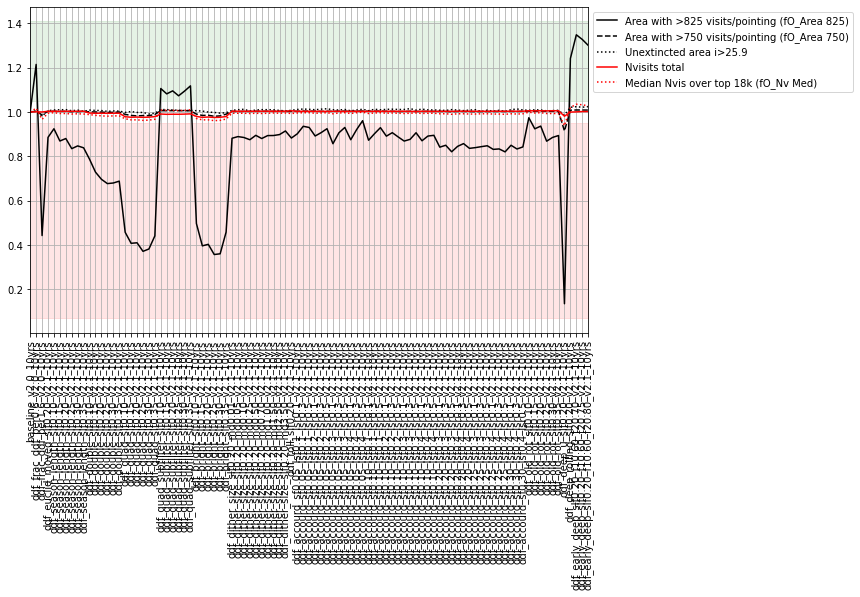

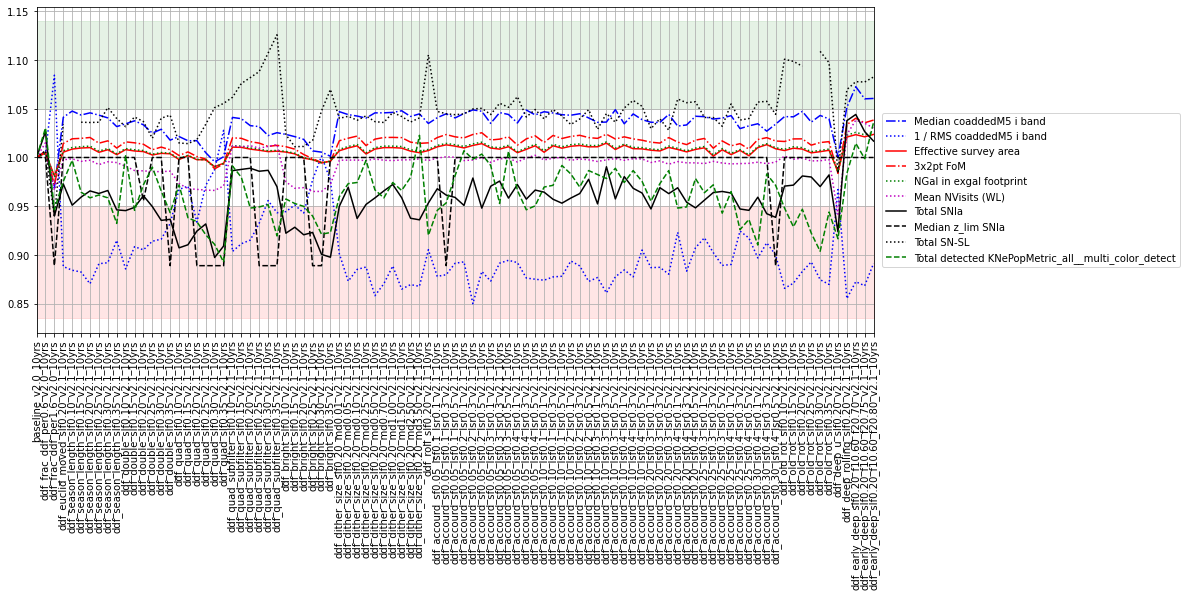

In [28]:
fam = [d for d in families.index if 'ddf' in d]
describe_family(fam)

---
**ddf double** : This family cuts the individual DDF sequences in half, resulting in brighter single night coadded depths, but a shorter interval of nights between visits. This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


---
**ddf quad** : This family cuts the individual DDF sequences by four, resulting in brighter single night coadded depths, but an even shorter interval of nights between visits.This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


---
**ddf quad subfilter** : Similar to the ddf quad family, the sequences for individual DDFs are cut shorter by about 1/4 compared to baseline. However, here only some filters are used in each DDF sequence, alternating between active filters on different nights.This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


---
**ddf bright** : Similar to the ddf quad family, the sequences for individual DDFs are cut shorter by about 1/4 compared to baseline. In this family, the m5 limits for scheduling visits are relaxed, resulting in visits running more consistently throughout the lunar cycle even into bright time. This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


---
**ddf deep universal** : This family uses longer and more frequent nightly sequences for the DDFs. These sequences are described in a DESC DDF paper, and are roughly 41 visits per night every night during the season. This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


---
**ddf deep rolling** : This family is based on the `ddf deep universal` but adds a rolling cadence to the DDF fields. The rolling cadence simply observes each field for two seasons, and then stops, thus reducing the overall time requirement for the DDFs from the budget requested in `ddf deep universal`. This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


---
**ddf early deep** : This family reduces the overall number of DDFs to 3; XMM-LSS, COSMOS, and the double pointing EDFS. A deep nightly sequence and fast cadence is requested on these few fields.This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


metric                                           Median coaddedM5 i band  \
run                                                                        
baseline_v2.1_10yrs                                            26.224653   
ddf_double_slf0.10_v2.1_10yrs                                  26.217604   
ddf_double_slf0.15_v2.1_10yrs                                  26.220731   
ddf_double_slf0.20_v2.1_10yrs                                  26.216611   
ddf_double_slf0.25_v2.1_10yrs                                  26.208087   
ddf_double_slf0.30_v2.1_10yrs                                  26.212055   
ddf_double_slf0.35_v2.1_10yrs                                  26.200866   
ddf_quad_slf0.10_v2.1_10yrs                                    26.204582   
ddf_quad_slf0.15_v2.1_10yrs                                    26.200265   
ddf_quad_slf0.20_v2.1_10yrs                                    26.200340   
ddf_quad_slf0.25_v2.1_10yrs                                    26.187963   
ddf_quad_slf0.30_v2.1_10yrs                                    26.178560   
ddf_quad_slf0.35_v2.1_10yrs                                    26.183811   
ddf_quad_subfilter_slf0.10_v2.1_10yrs                          26.224196   
ddf_quad_subfilter_slf0.15_v2.1_10yrs                          26.222912   
ddf_quad_subfilter_slf0.20_v2.1_10yrs                          26.215749   
ddf_quad_subfilter_slf0.25_v2.1_10yrs                          26.214788   
ddf_quad_subfilter_slf0.30_v2.1_10yrs                          26.205559   
ddf_quad_subfilter_slf0.35_v2.1_10yrs                          26.208537   
ddf_bright_slf0.10_v2.1_10yrs                                  26.206780   
ddf_bright_slf0.15_v2.1_10yrs                                  26.204470   
ddf_bright_slf0.20_v2.1_10yrs                                  26.201654   
ddf_bright_slf0.25_v2.1_10yrs                                  26.189832   
ddf_bright_slf0.30_v2.1_10yrs                                  26.188543   
ddf_bright_slf0.35_v2.1_10yrs                                  26.184278   
ddf_deep_u_slf0.20_v2.1_10yrs                                  26.183614   
ddf_deep_rolling_slf0.20_v2.1_10yrs                            26.234601   
ddf_early_deep_slf0.20_f10.60_f20.70_v2.1_10yrs                26.255833   
ddf_early_deep_slf0.20_f10.60_f20.75_v2.1_10yrs                26.243288   
ddf_early_deep_slf0.20_f10.60_f20.80_v2.1_10yrs                26.243709   

metric                                           RMS coaddedM5 i band  \
run                                                                     
baseline_v2.1_10yrs                                          0.125467   
ddf_double_slf0.10_v2.1_10yrs                                0.125599   
ddf_double_slf0.15_v2.1_10yrs                                0.122440   
ddf_double_slf0.20_v2.1_10yrs                                0.122879   
ddf_double_slf0.25_v2.1_10yrs                                0.121696   
ddf_double_slf0.30_v2.1_10yrs                                0.121405   
ddf_double_slf0.35_v2.1_10yrs                                0.119321   
ddf_quad_slf0.10_v2.1_10yrs                                  0.114995   
ddf_quad_slf0.15_v2.1_10yrs                                  0.114600   
ddf_quad_slf0.20_v2.1_10yrs                                  0.119135   
ddf_quad_slf0.25_v2.1_10yrs                                  0.114498   
ddf_quad_slf0.30_v2.1_10yrs                                  0.112612   
ddf_quad_slf0.35_v2.1_10yrs                                  0.108207   
ddf_quad_subfilter_slf0.10_v2.1_10yrs                        0.123107   
ddf_quad_subfilter_slf0.15_v2.1_10yrs                        0.122032   
ddf_quad_subfilter_slf0.20_v2.1_10yrs                        0.121533   
ddf_quad_subfilter_slf0.25_v2.1_10yrs                        0.119283   
ddf_quad_subfilter_slf0.30_v2.1_10yrs                        0.116366   
ddf_quad_subfilter_slf0.35_v2.1_10yrs                        0.117915   
ddf_bright_slf0.10_v2.1_10yrs     

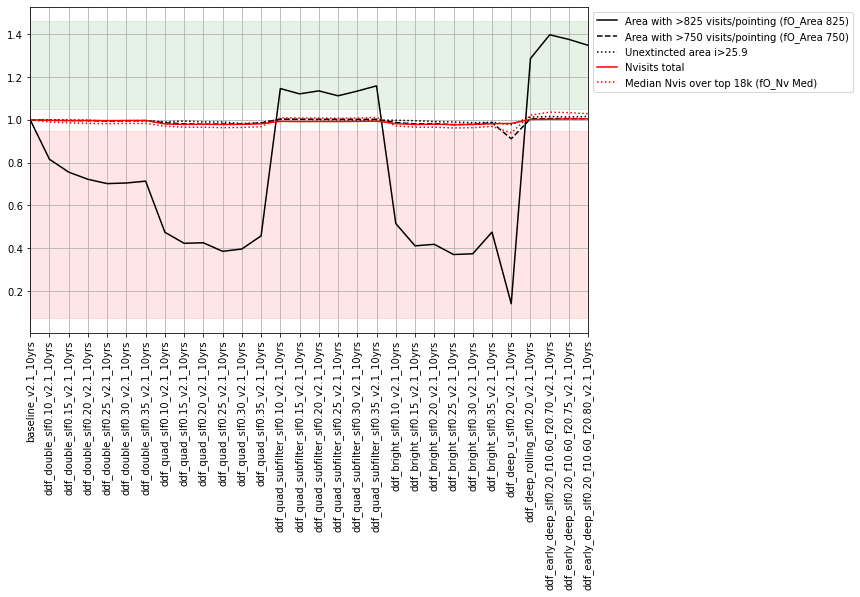

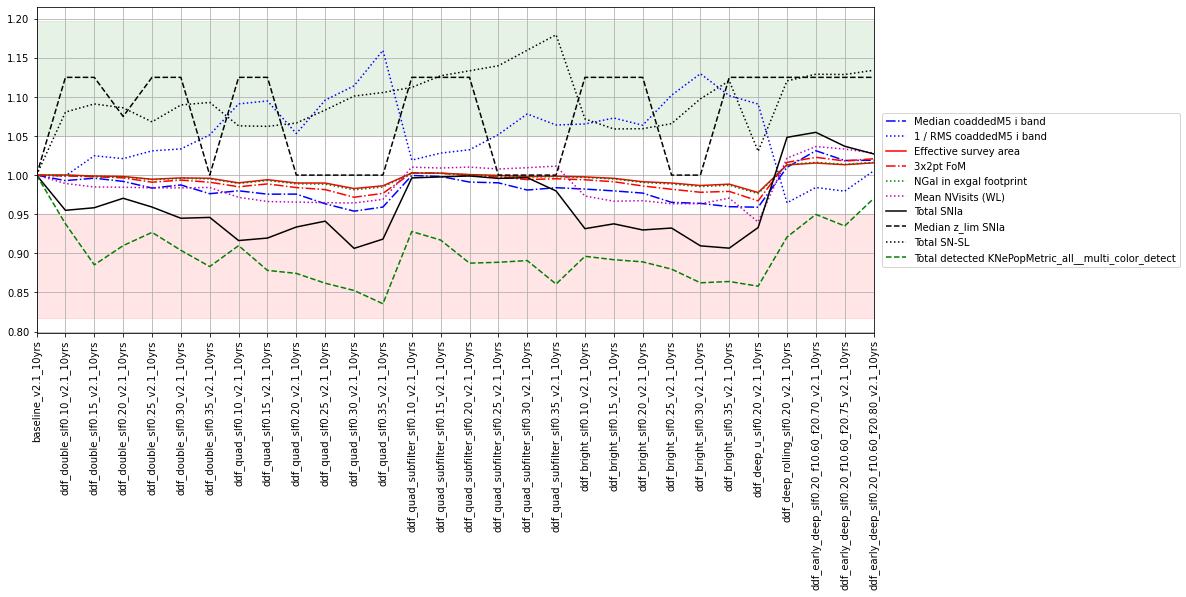

In [29]:
fam = ['ddf double', 'ddf quad', 'ddf quad subfilter', 'ddf bright', 
       'ddf deep universal', 'ddf deep rolling', 'ddf early deep']
describe_family(fam)

The various DDF strategies end up impacting the fraction of time spent on DDF fields, slightly. This likely explains some of the variation in DESC metrics, particularly static science metrics. The timing of visits may be impacted, which could explain the stronger transient science metric variations. 

In [22]:
# Pull out DDF specific DESC (SN) metrics
metrics.loc['DESC SN DDF']

metric  \
metric                                                                                         
Sum ELAISS1, SNe_nSN  HealpixSubsetSlicer          Sum ELAISS1, SNe_nSN  HealpixSubsetSlicer   
Sum XMM-LSS, SNe_nSN  HealpixSubsetSlicer          Sum XMM-LSS, SNe_nSN  HealpixSubsetSlicer   
Sum COSMOS, SNe_nSN  HealpixSubsetSlicer            Sum COSMOS, SNe_nSN  HealpixSubsetSlicer   
Sum ECDFS, SNe_nSN  HealpixSubsetSlicer              Sum ECDFS, SNe_nSN  HealpixSubsetSlicer   
Sum EDFS, SNe_nSN  HealpixSubsetSlicer                Sum EDFS, SNe_nSN  HealpixSubsetSlicer   
Median ELAISS1, SNe_zlim  HealpixSubsetSlicer  Median ELAISS1, SNe_zlim  HealpixSubsetSlicer   
Median XMM-LSS, SNe_zlim  HealpixSubsetSlicer  Median XMM-LSS, SNe_zlim  HealpixSubsetSlicer   
Median COSMOS, SNe_zlim  HealpixSubsetSlicer    Median COSMOS, SNe_zlim  HealpixSubsetSlicer   
Median ECDFS, SNe_zlim  HealpixSubsetSlicer      Median ECDFS, SNe_zlim  HealpixSubsetSlicer   
Median EDFS, SNe_zlim  HealpixSubsetSlicer        Median EDFS, SNe_zlim  HealpixSubsetSlicer   
Sum SnL_ELAISS1  HealpixSubsetSlicer                    Sum SnL_ELAISS1  HealpixSubsetSlicer   
Sum SnL_XMM-LSS  HealpixSubsetSlicer                    Sum SnL_XMM-LSS  HealpixSubsetSlicer   
Sum SnL_COSMOS  HealpixSubsetSlicer                      Sum SnL_COSMOS  HealpixSubsetSlicer   
Sum SnL_ECDFS  HealpixSubsetSlicer                        Sum SnL_ECDFS  HealpixSubsetSlicer   
Sum SnL_EDFS  HealpixSubsetSlicer                          Sum SnL_EDFS  HealpixSubsetSlicer   

                                                            short_name style  \
metric                                                                         
Sum ELAISS1, SNe_nSN  HealpixSubsetSlicer          Sum SNe_nSN ELAISS1    k-   
Sum XMM-LSS, SNe_nSN  HealpixSubsetSlicer          Sum SNe_nSN XMM-LSS    k:   
Sum COSMOS, SNe_nSN  HealpixSubsetSlicer            Sum SNe_nSN COSMOS    m-   
Sum ECDFS, SNe_nSN  HealpixSubsetSlicer              Sum SNe_nSN ECDFS    k-   
Sum EDFS, SNe_nSN  HealpixSubsetSlicer                Sum SNe_nSN EDFS    k:   
Median ELAISS1, SNe_zlim  HealpixSubsetSlicer  Median SNe_zlim ELAISS1    m-   
Median XMM-LSS, SNe_zlim  HealpixSubsetSlicer  Median SNe_zlim XMM-LSS    k-   
Median COSMOS, SNe_zlim  HealpixSubsetSlicer    Median SNe_zlim COSMOS    k:   
Median ECDFS, SNe_zlim  HealpixSubsetSlicer      Median SNe_zlim ECDFS    m-   
Median EDFS, SNe_zlim  HealpixSubsetSlicer        Median SNe_zlim EDFS    k-   
Sum SnL_ELAISS1  HealpixSubsetSlicer                   Sum SnL ELAISS1    k:   
Sum SnL_XMM-LSS  HealpixSubsetSlicer                   Sum SnL XMM-LSS    m-   
Sum SnL_COSMOS  HealpixSubsetSlicer                     Sum SnL COSMOS    k-   
Sum SnL_ECDFS  HealpixSubsetSlicer                       Sum SnL ECDFS    k:   
Sum SnL_EDFS  HealpixSubsetSlicer                         Sum SnL EDFS    m-   

                                               invert    mag  
metric                                                        
Sum ELAISS1, SNe_nSN  HealpixSubsetSlicer       False  False  
Sum XMM-LSS, SNe_nSN  HealpixSubsetSlicer       False  False  
Sum COSMOS, SNe_nSN  HealpixSubsetSlicer        False  False  
Sum ECDFS, SNe_nSN  HealpixSubsetSlicer         False  False  
Sum EDFS, SNe_nSN  HealpixSubsetSlicer          False  False  
Median ELAISS1, SNe_zlim  HealpixSubsetSlicer   False  False  
Median XMM-LSS, SNe_zlim  HealpixSubsetSlicer   False  False  
Median COSMOS, SNe_zlim  HealpixSubsetSlicer    False  False  
Median ECDFS, SNe_zlim  HealpixSubsetSlicer     False  False  
Median EDFS, SNe_zlim  HealpixSubsetSlicer      False  False  
Sum SnL_ELAISS1  HealpixSubsetSlicer            False  False  
Sum SnL_XMM-LSS  HealpixSubsetSlicer            False  False  
Sum SnL_COSMOS  HealpixSubsetSlicer             False  False  
Sum SnL_ECDFS  HealpixSubsetSlicer              False  False  
Sum SnL_EDFS  HealpixSubsetSlicer               False  False

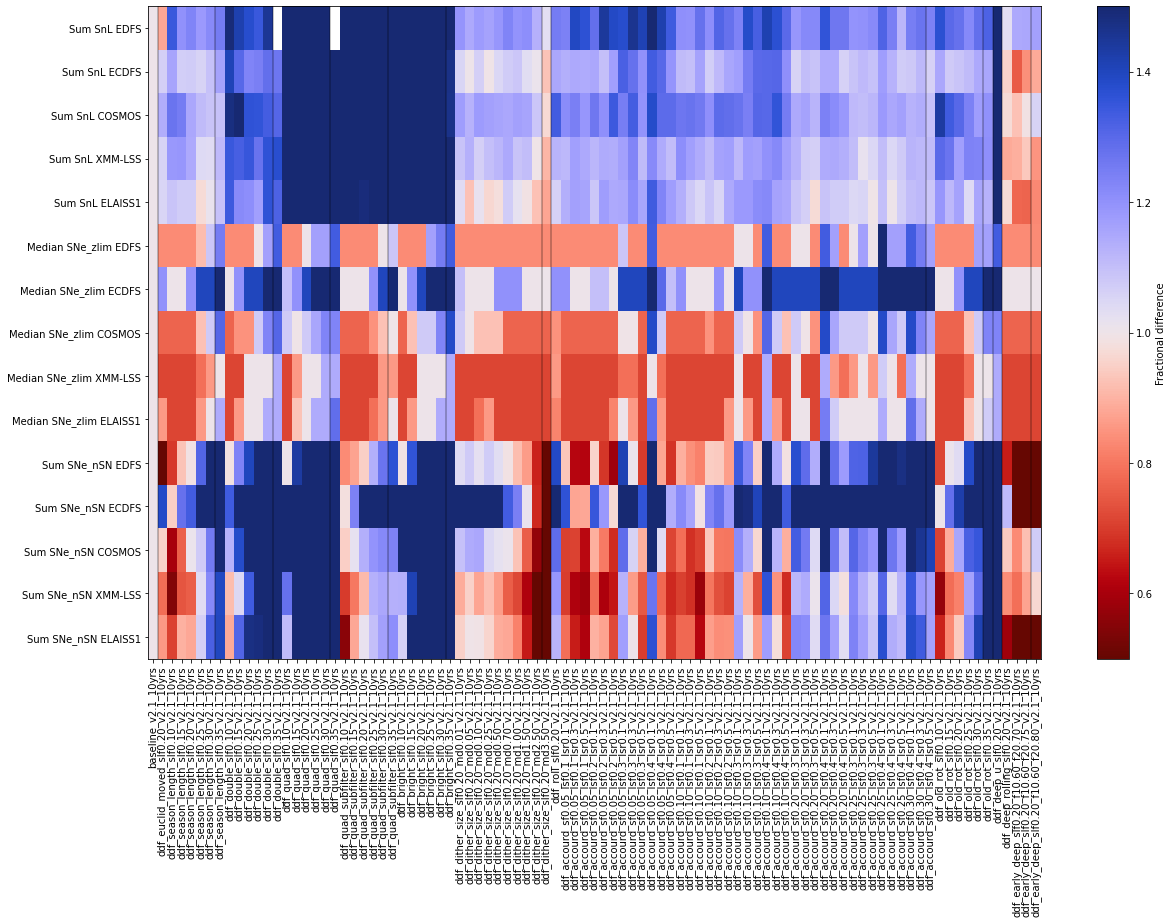

In [23]:
ddfs = ['COSMOS', 'XMM-LSS', 'ELAISS1', 'ECDFS', 'EDFS']
family_list = list(families.index)

fams = [f for f in family_list if f.startswith('ddf') and f!='ddf percent']
k = 'DESC SN DDF'
mm = metrics.loc[k]

baseline = 'baseline_v2.1_10yrs'
#baseline = 'ddf_season_length_slf0.20_v2.1_10yrs'
these_runs = np.concatenate([[baseline], families.explode(['run']).loc[fams]['run']])

fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs, mm['metric']],
                                  baseline_run=baseline,
                                  metric_label_map=mm['short_name'],
                                  metric_set=mm, 
                                  color_range=1)
fig.set_figwidth(20)
fig.set_figheight(12)

plot_lines = maf.find_family_lines(families, fams)
for l in (plot_lines):
    ax.axvline(l, color='k', alpha=0.3)

`baseline_v2.1_10yrs` doesn't use pre-scheduled DDFs, so the comparison can be misleading. Choose one of the pre-scheduled examples. 

Note! We have since found the following issues with the v2.1 DDF series. Issues include:
* the filter balance in the prescheduled DDF sequences in incorrect (there is more g than r band time, rather than the reverse) -- HOWEVER it also looks like the total number of SLSN increases regardless of this balance, and the number of SN can increase too (depending on season length) .. the redshift limit is decreased however, so this is likely something that needs to be corrected. 
* the number of visits allocated to DDFs varied unintentionally; overall the DDFs are taking more time than we had allocated, and there is a small amount of 'wander' in the total time they use, which should be accounted for when comparing metrics.
* the moon could be up during DDF sequences, or they could potentially run into twilight

These issues make comparison with non-prescheduled DDF runs difficult, and can make comparison within a series difficult, although not necessarily impossible. Please ask us if you have questions about a particular metric or series of runs and we can try to help you figure out how to compare the metric results.

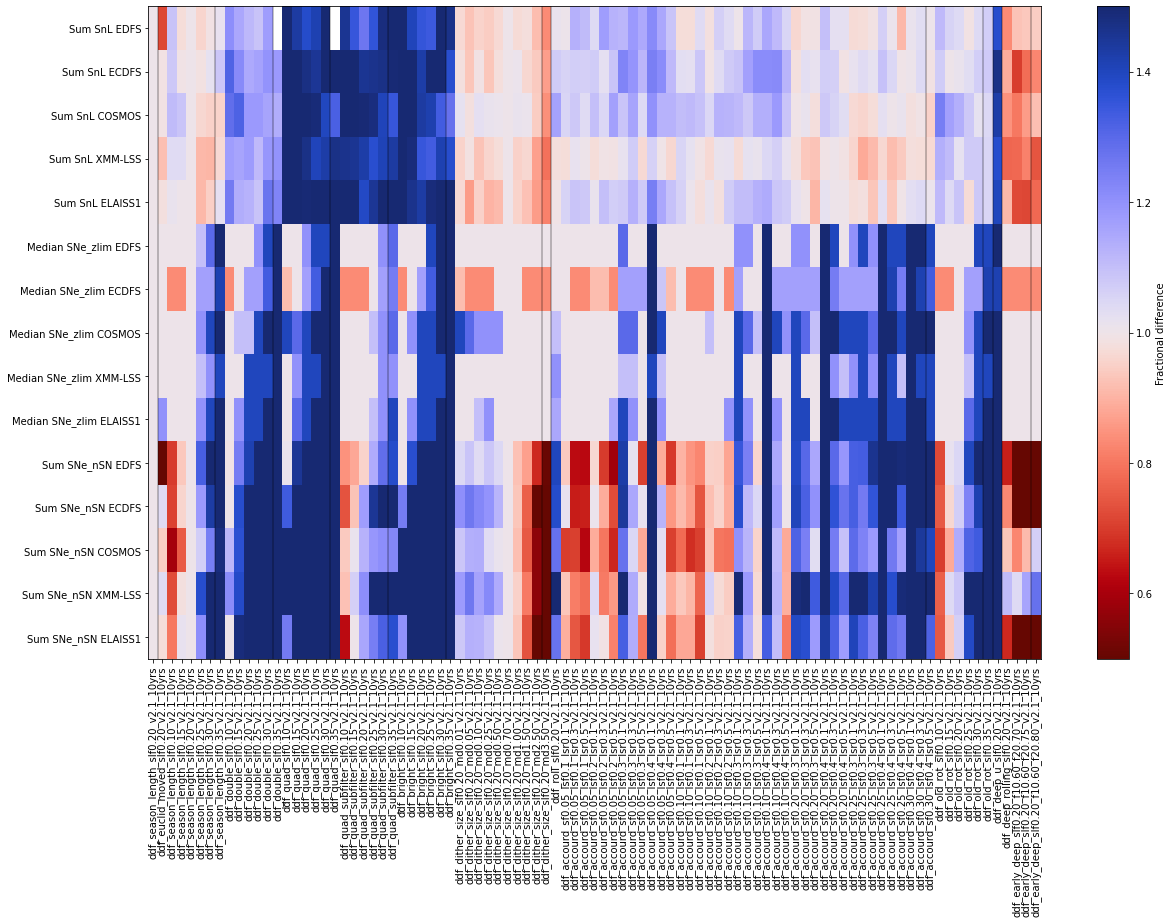

In [24]:
ddfs = ['COSMOS', 'XMM-LSS', 'ELAISS1', 'ECDFS', 'EDFS']
family_list = list(families.index)

fams = [f for f in family_list if f.startswith('ddf') and f!='ddf percent']
k = 'DESC SN DDF'
mm = metrics.loc[k]

#baseline = 'baseline_v2.1_10yrs'
baseline = 'ddf_season_length_slf0.20_v2.1_10yrs'
these_runs = np.concatenate([[baseline], families.explode(['run']).loc[fams]['run']])

fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs, mm['metric']],
                                  baseline_run=baseline,
                                  metric_label_map=mm['short_name'],
                                  metric_set=mm, 
                                  color_range=1)
fig.set_figwidth(20)
fig.set_figheight(12)

plot_lines = maf.find_family_lines(families, fams)
for l in (plot_lines):
    ax.axvline(l, color='k', alpha=0.3)

The shorter DDF sequences ('double', 'quad', etc) generally seem favorable, although these may have some issues with needing to calibrate for number of visits (as the number of visits doesn't hold completely constant across these variations in simulations, thus the fraction of overall time wanders). As do the accordian cadences for SN.
Lensed SN don't scale quite like the SN. 

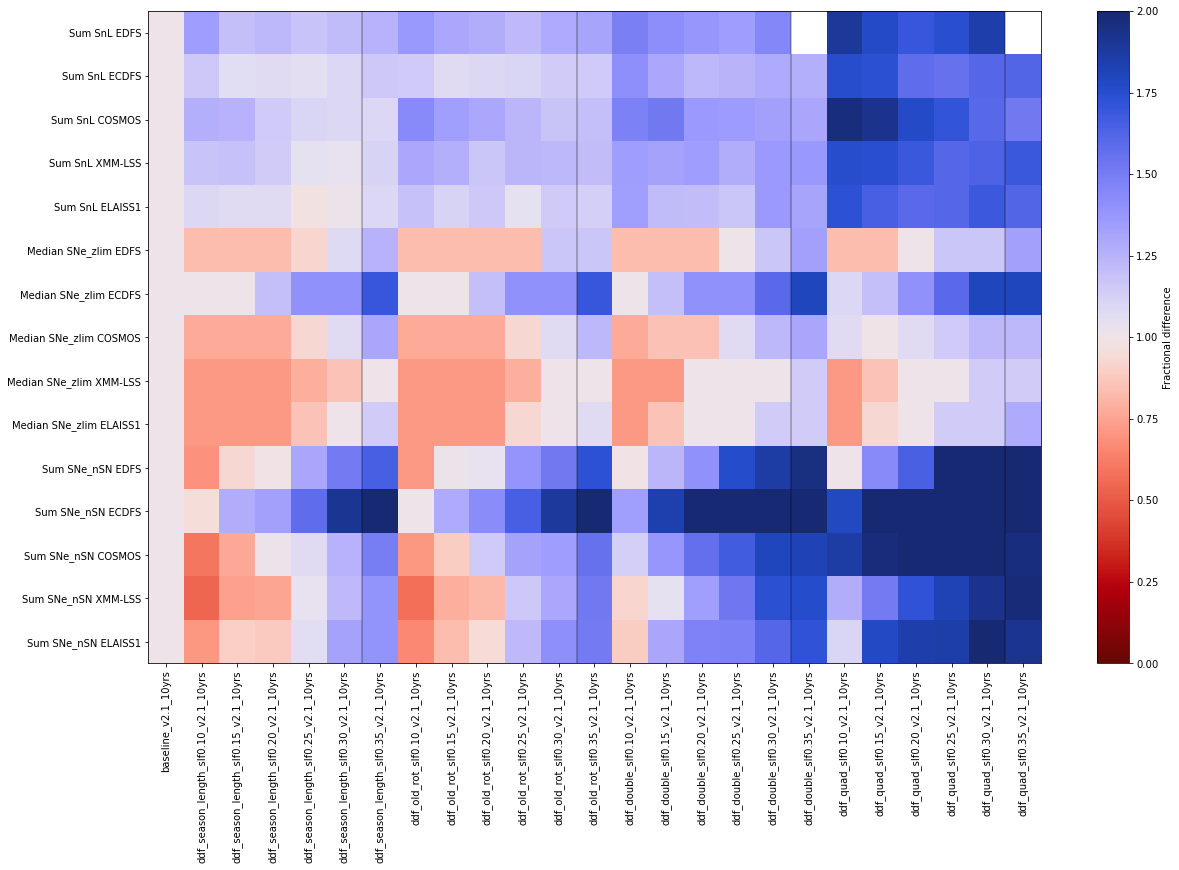

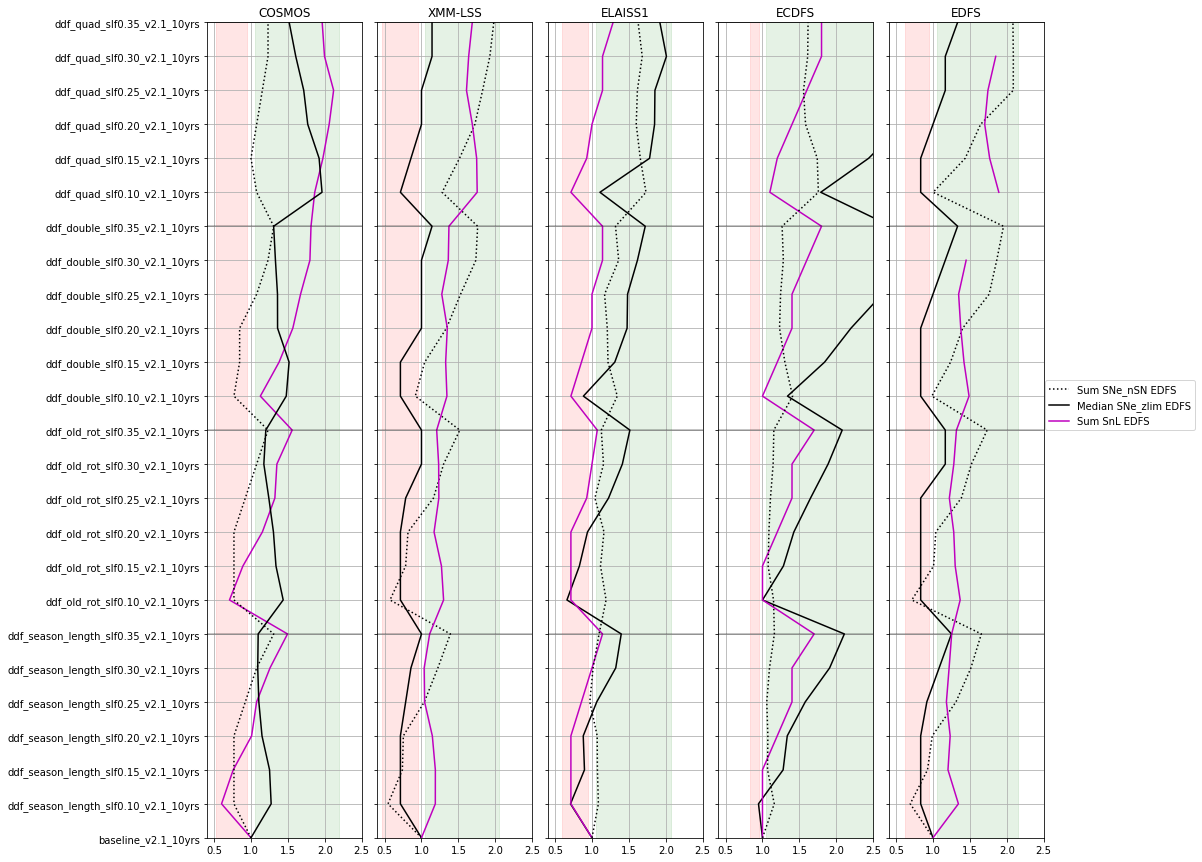

In [25]:
fams = ['ddf season length', 'ddf old rot', 'ddf double', 'ddf quad',]

baseline = 'ddf_season_length_slf0.20_v2.1_10yrs'
baseline = 'baseline_v2.1_10yrs'
these_runs = np.concatenate([[baseline], families.explode(['run']).loc[fams]['run']])

fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs, mm['metric']],
                                  baseline_run=baseline,
                                  metric_label_map=mm['short_name'],
                                  metric_set=mm, 
                                  color_range=2)
fig.set_figwidth(20)
fig.set_figheight(12)
for l in (maf.find_family_lines(families, fams)):
    ax.axvline(l, color='k', alpha=0.3)


fig = plt.figure(figsize=(15, 15))
gs = fig.add_gridspec(ncols=5, nrows=1, wspace=0.1)
axs = gs.subplots(sharey=True)
for dd, ax  in zip(ddfs, axs):
    msubset = mm.query('metric.str.contains(@dd)')
    fig, ax = maf.plot_run_metric(summaries.loc[these_runs, msubset['metric']],
                                      baseline_run=baseline,
                                      metric_label_map=msubset['short_name'],
                                      metric_set=msubset,
                                 horizontal_quantity='value',
                                 vertical_quantity='run',
                                 ax=ax)
    ax.get_legend().remove()
    ax.set_xlim(0.4, 2.5)
    ax.set_title(dd)
    for l in (maf.find_family_lines(families, fams)):
        ax.axhline(l, color='k', alpha=0.3)
ax.legend(loc=(1.01, 0.5))

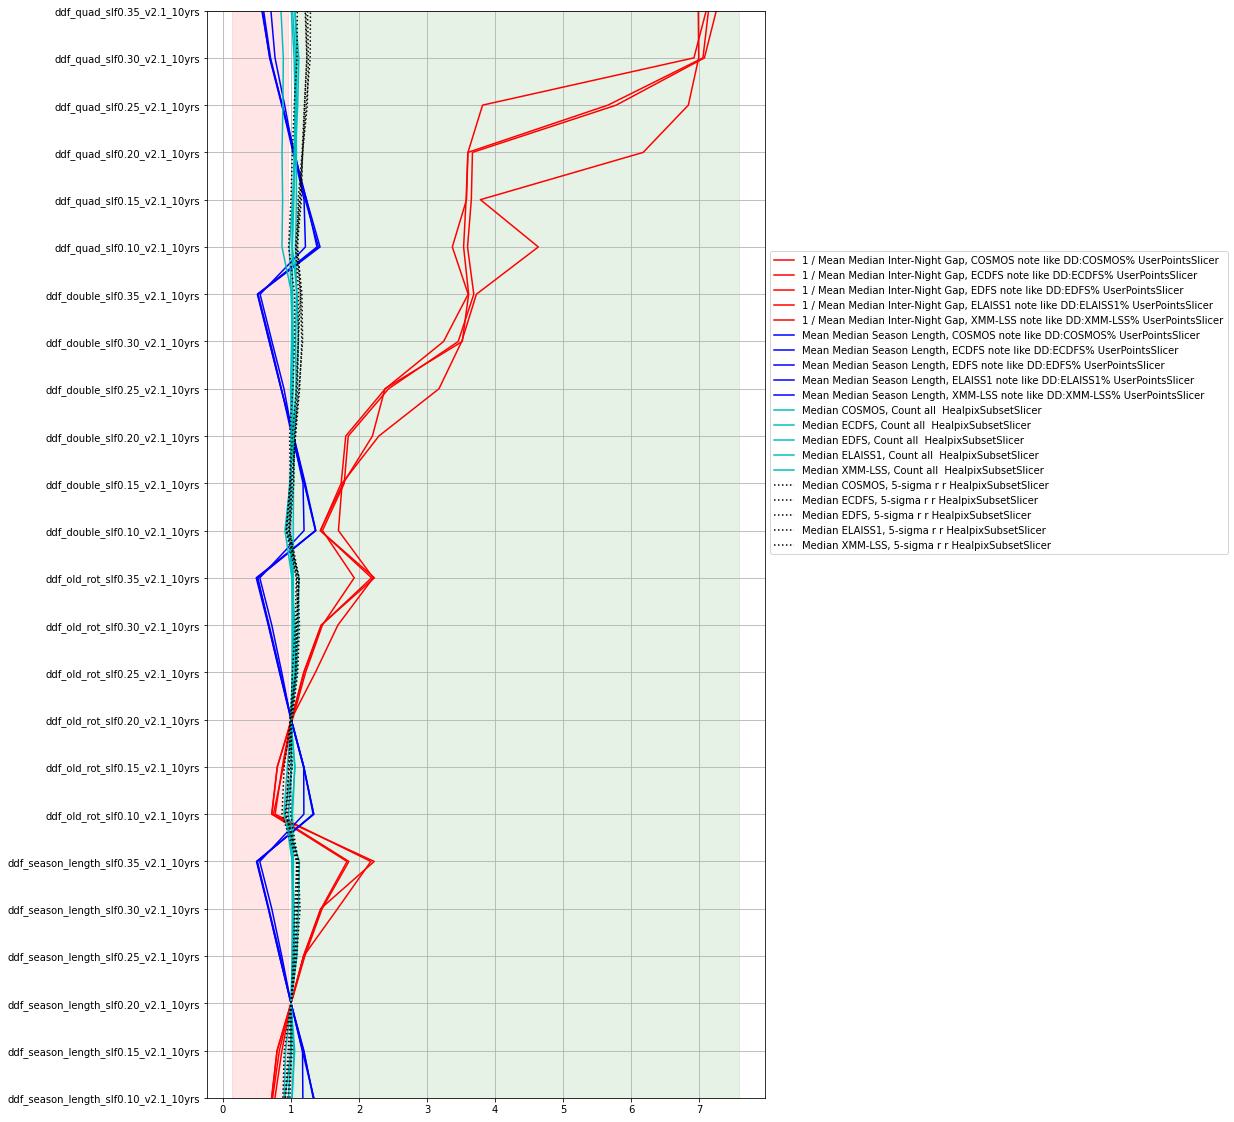

In [26]:
# Let's have a quick look at the season length, inter-night gaps, and overall number of visits and depths

fams = ['ddf season length', 'ddf old rot', 'ddf double', 'ddf quad',]

baseline = 'ddf_season_length_slf0.20_v2.1_10yrs'
#baseline = 'baseline_v2.1_10yrs'
these_runs = np.concatenate([[], families.explode(['run']).loc[fams]['run']])

new = maf.create_metric_set_df('tmp', 
                                   sorted([m for m in summaries if 'Inter-Night' in m and "% User" in m]) +
                                   sorted([m for m in summaries if 'Season' in m  and "% User" in m]) +
                                   sorted([m for m in summaries if 'Count' in m and 'all' in m 
                                           and "HealpixSubsetSlicer" in m]) + 
                                    sorted([m for m in summaries if '5-sigma r' in m  
                                           and "HealpixSubsetSlicer" in m]),
                                   style= ['r-']*5 + ['b-']*5 + ['c-']*5 + ['k:']*5,
                                   mag=[False]*5*3 + [True]*5, invert=[True]*5 + [False]*5*3).loc['tmp']

fig, ax = maf.plot_run_metric(summaries.loc[these_runs, new['metric']], 
                    baseline_run=baseline,
                   metric_set = new)
fig.set_figheight(20)
ax.legend(loc=(1.01, 0.5))
#ax.set_xlim(0.4, 1.3)

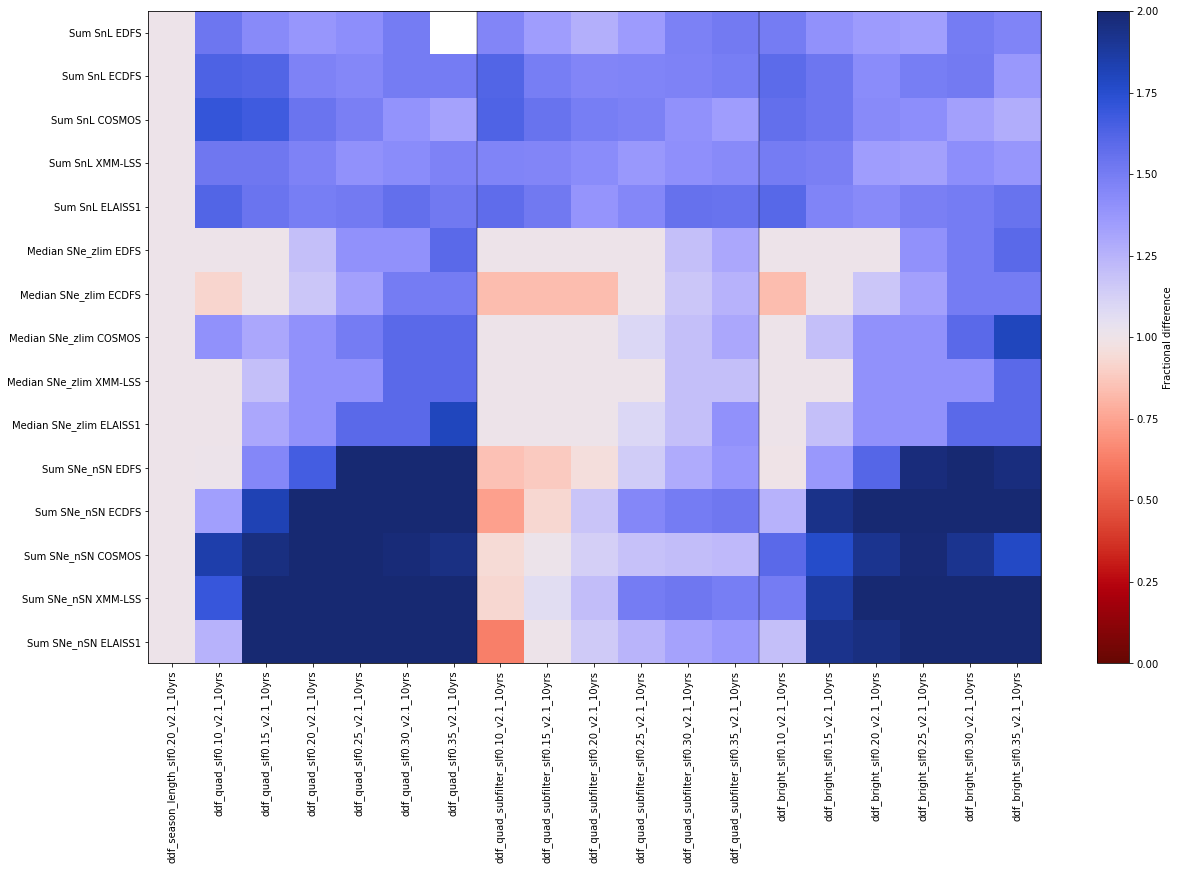

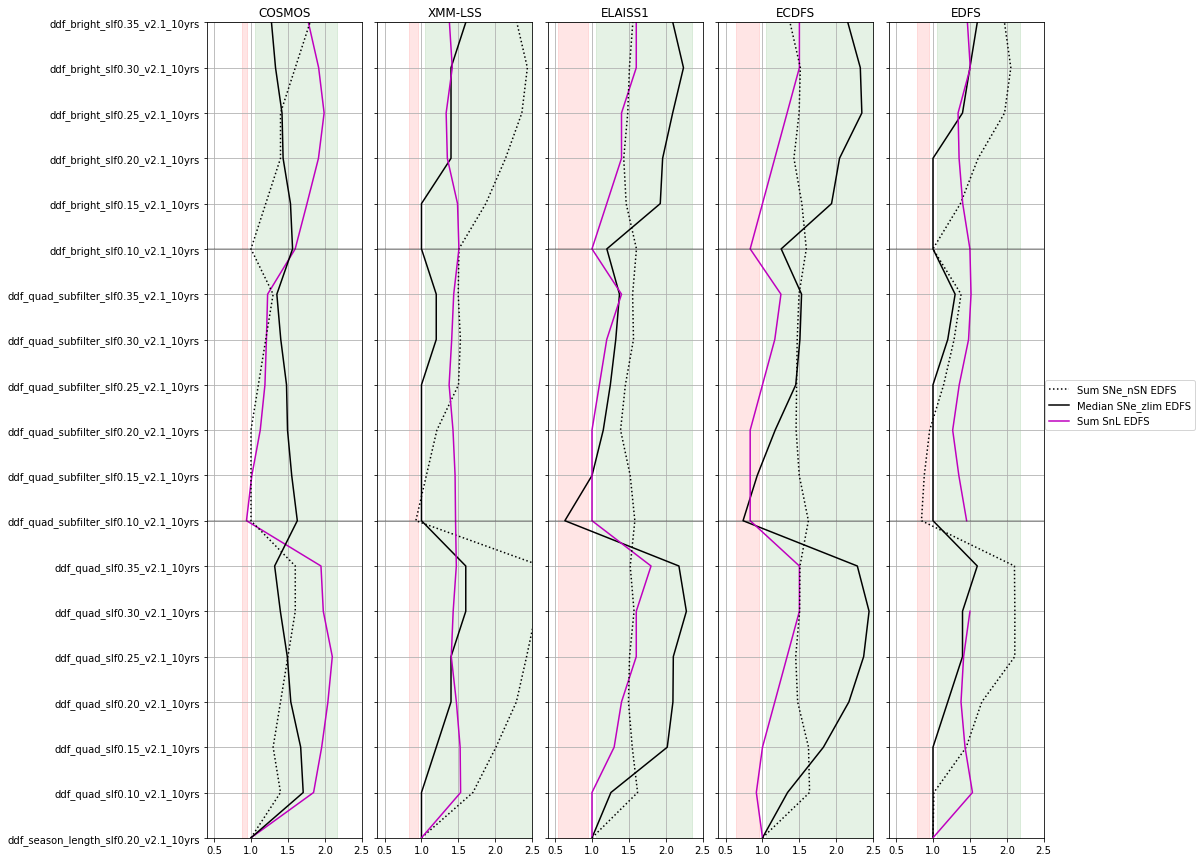

In [27]:
fams = ['ddf quad', 'ddf quad subfilter', 'ddf bright']

baseline = 'ddf_season_length_slf0.20_v2.1_10yrs'
these_runs = np.concatenate([[baseline], families.explode(['run']).loc[fams]['run']])

fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs, mm['metric']],
                                  baseline_run=baseline,
                                  metric_label_map=mm['short_name'],
                                  metric_set=mm, 
                                  color_range=2)
fig.set_figwidth(20)
fig.set_figheight(12)
for l in (maf.find_family_lines(families, fams)+1):
    ax.axvline(l, color='k', alpha=0.3)


fig = plt.figure(figsize=(15, 15))
gs = fig.add_gridspec(ncols=5, nrows=1, wspace=0.1)
axs = gs.subplots(sharey=True)
for dd, ax  in zip(ddfs, axs):
    msubset = mm.query('metric.str.contains(@dd)')
    fig, ax = maf.plot_run_metric(summaries.loc[these_runs, msubset['metric']],
                                      baseline_run=baseline,
                                      metric_label_map=msubset['short_name'],
                                      metric_set=msubset,
                                 horizontal_quantity='value',
                                 vertical_quantity='run',
                                 ax=ax)
    ax.get_legend().remove()
    ax.set_xlim(0.4, 2.5)
    ax.set_title(dd)
    for l in (maf.find_family_lines(families, fams)+1):
        ax.axhline(l, color='k', alpha=0.3)
ax.legend(loc=(1.01, 0.5))

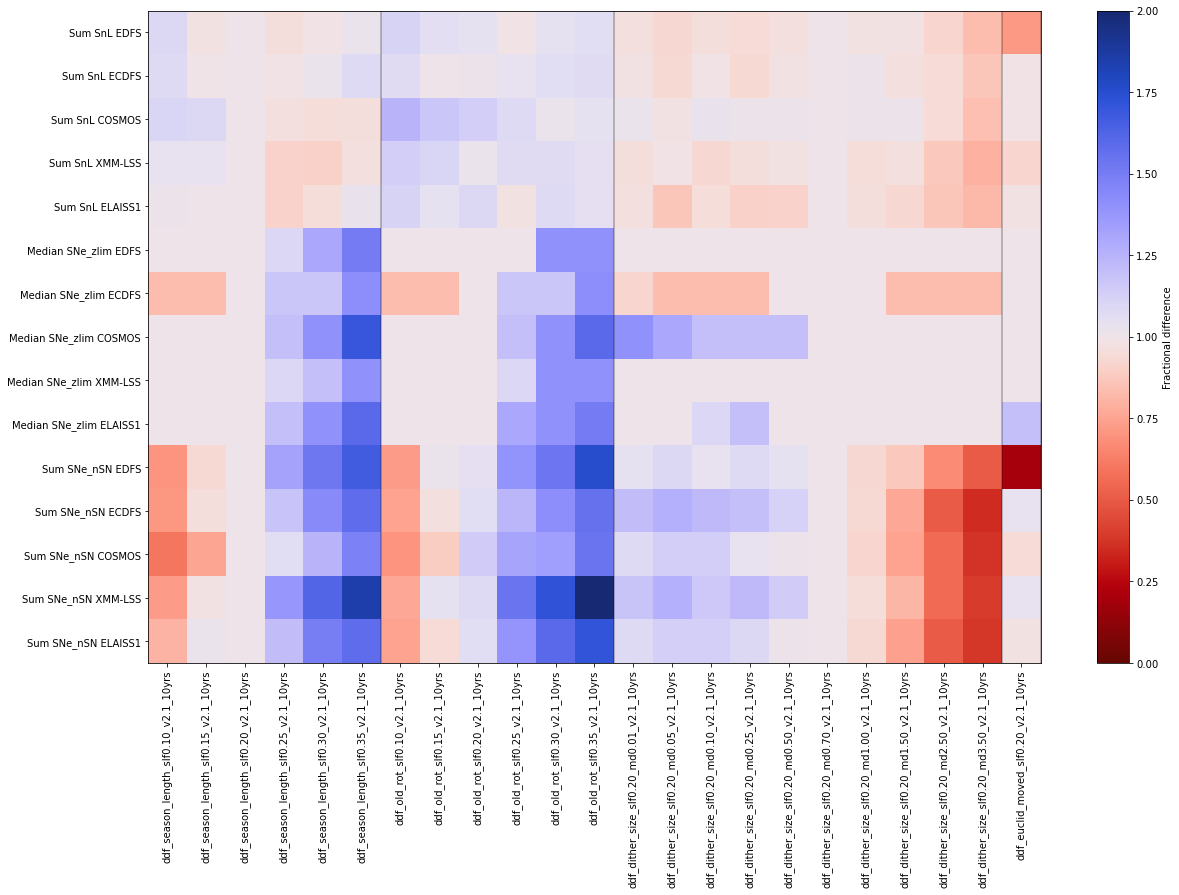

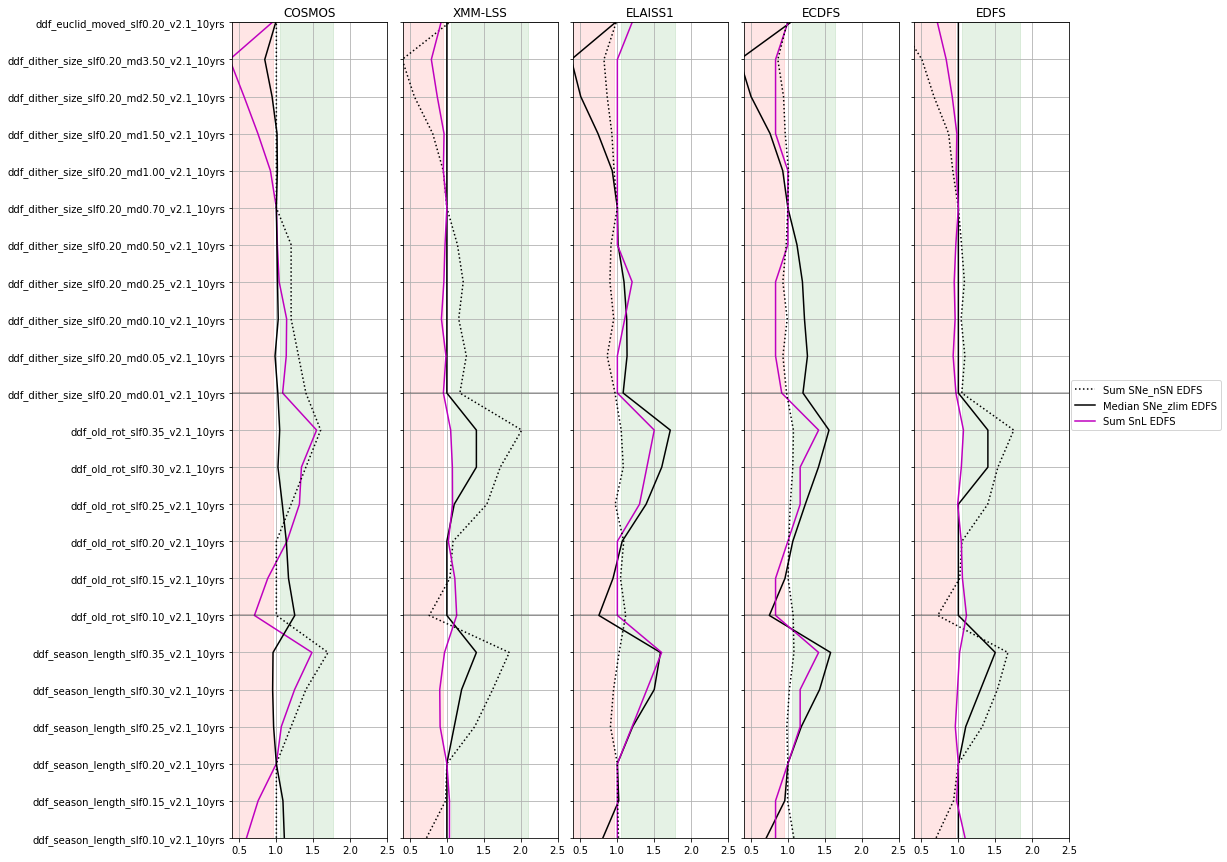

In [28]:
fams = ['ddf season length', 'ddf old rot', 'ddf dither', 'ddf euclid moved']

baseline = 'ddf_season_length_slf0.20_v2.1_10yrs'
these_runs = np.concatenate([[], families.explode(['run']).loc[fams]['run']])

fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs, mm['metric']],
                                  baseline_run=baseline,
                                  metric_label_map=mm['short_name'],
                                  metric_set=mm, 
                                  color_range=2)
fig.set_figwidth(20)
fig.set_figheight(12)
for l in (maf.find_family_lines(families, fams)):
    ax.axvline(l, color='k', alpha=0.3)


fig = plt.figure(figsize=(15, 15))
gs = fig.add_gridspec(ncols=5, nrows=1, wspace=0.1)
axs = gs.subplots(sharey=True)
for dd, ax  in zip(ddfs, axs):
    msubset = mm.query('metric.str.contains(@dd)')
    fig, ax = maf.plot_run_metric(summaries.loc[these_runs, msubset['metric']],
                                      baseline_run=baseline,
                                      metric_label_map=msubset['short_name'],
                                      metric_set=msubset,
                                 horizontal_quantity='value',
                                 vertical_quantity='run',
                                 ax=ax)
    ax.get_legend().remove()
    ax.set_xlim(0.4, 2.5)
    ax.set_title(dd)
    for l in (maf.find_family_lines(families, fams)):
        ax.axhline(l, color='k', alpha=0.3)
ax.legend(loc=(1.01, 0.5))

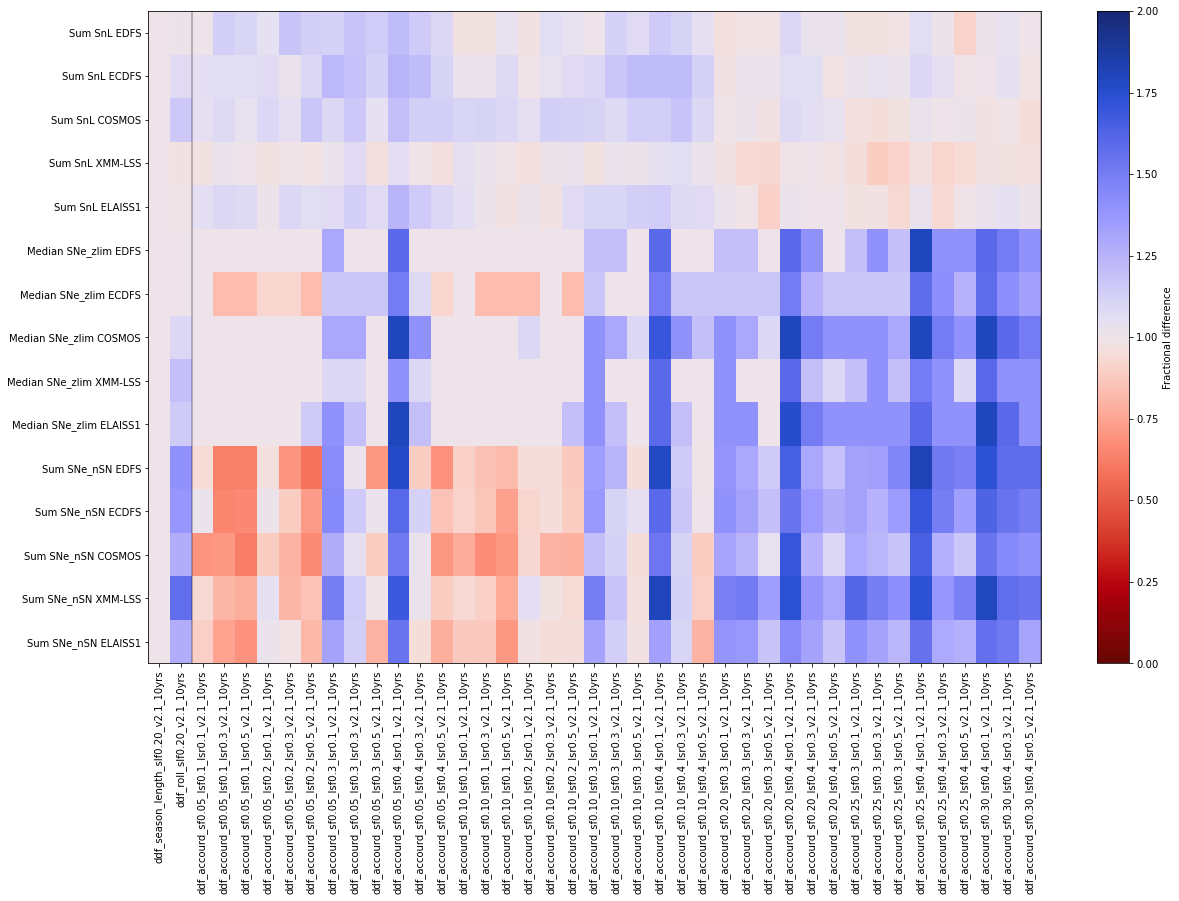

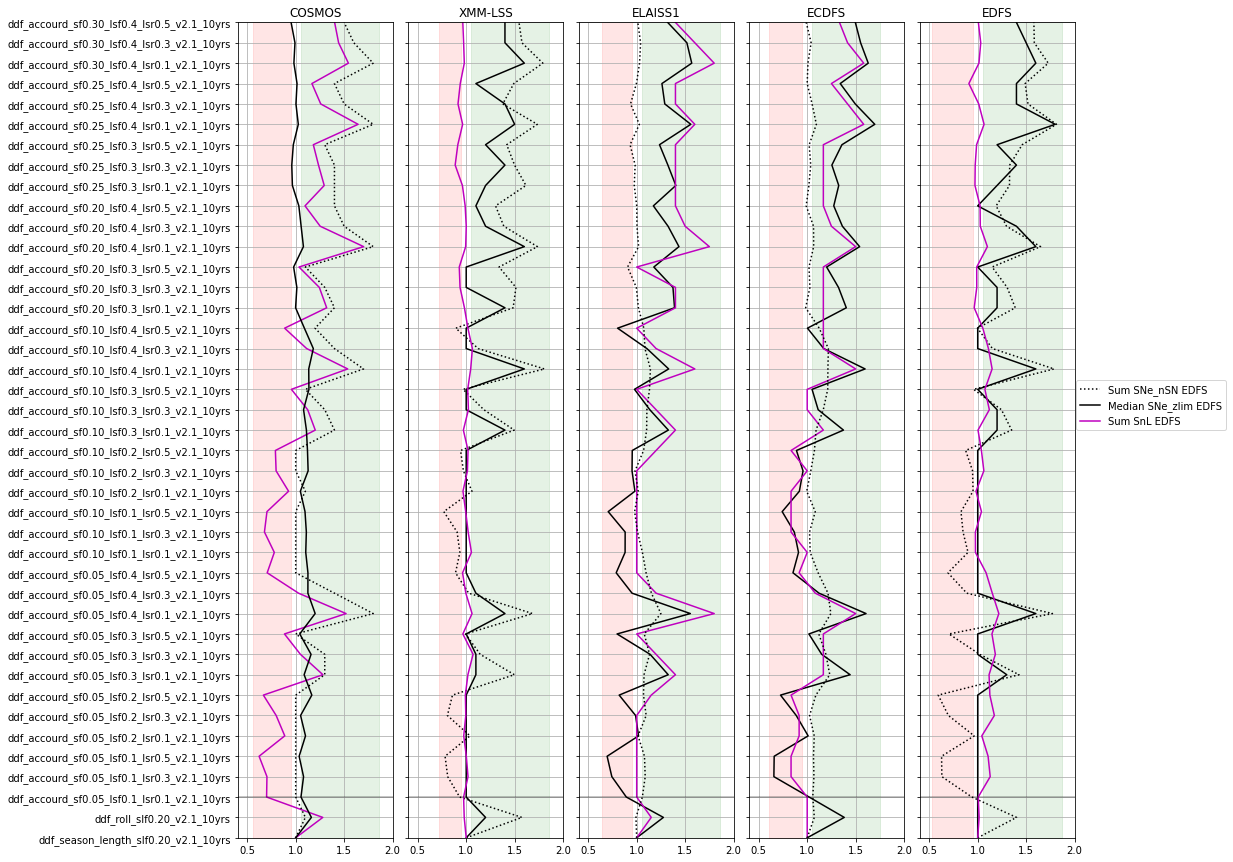

In [29]:
fams = ['ddf roll', 'ddf accordian']

baseline = 'ddf_season_length_slf0.20_v2.1_10yrs'
these_runs = np.concatenate([[baseline], families.explode(['run']).loc[fams]['run']])

fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs, mm['metric']],
                                  baseline_run=baseline,
                                  metric_label_map=mm['short_name'],
                                  metric_set=mm, 
                                  color_range=2)
fig.set_figwidth(20)
fig.set_figheight(12)
for l in (maf.find_family_lines(families, fams)+1):
    ax.axvline(l, color='k', alpha=0.3)


fig = plt.figure(figsize=(15, 15))
gs = fig.add_gridspec(ncols=5, nrows=1, wspace=0.1)
axs = gs.subplots(sharey=True)
for dd, ax  in zip(ddfs, axs):
    msubset = mm.query('metric.str.contains(@dd)')
    fig, ax = maf.plot_run_metric(summaries.loc[these_runs, msubset['metric']],
                                      baseline_run=baseline,
                                      metric_label_map=msubset['short_name'],
                                      metric_set=msubset,
                                 horizontal_quantity='value',
                                 vertical_quantity='run',
                                 ax=ax)
    ax.get_legend().remove()
    ax.set_xlim(0.4, 2.0)
    ax.set_title(dd)
    for l in (maf.find_family_lines(families, fams)+1):
        ax.axhline(l, color='k', alpha=0.3)
ax.legend(loc=(1.01, 0.5))

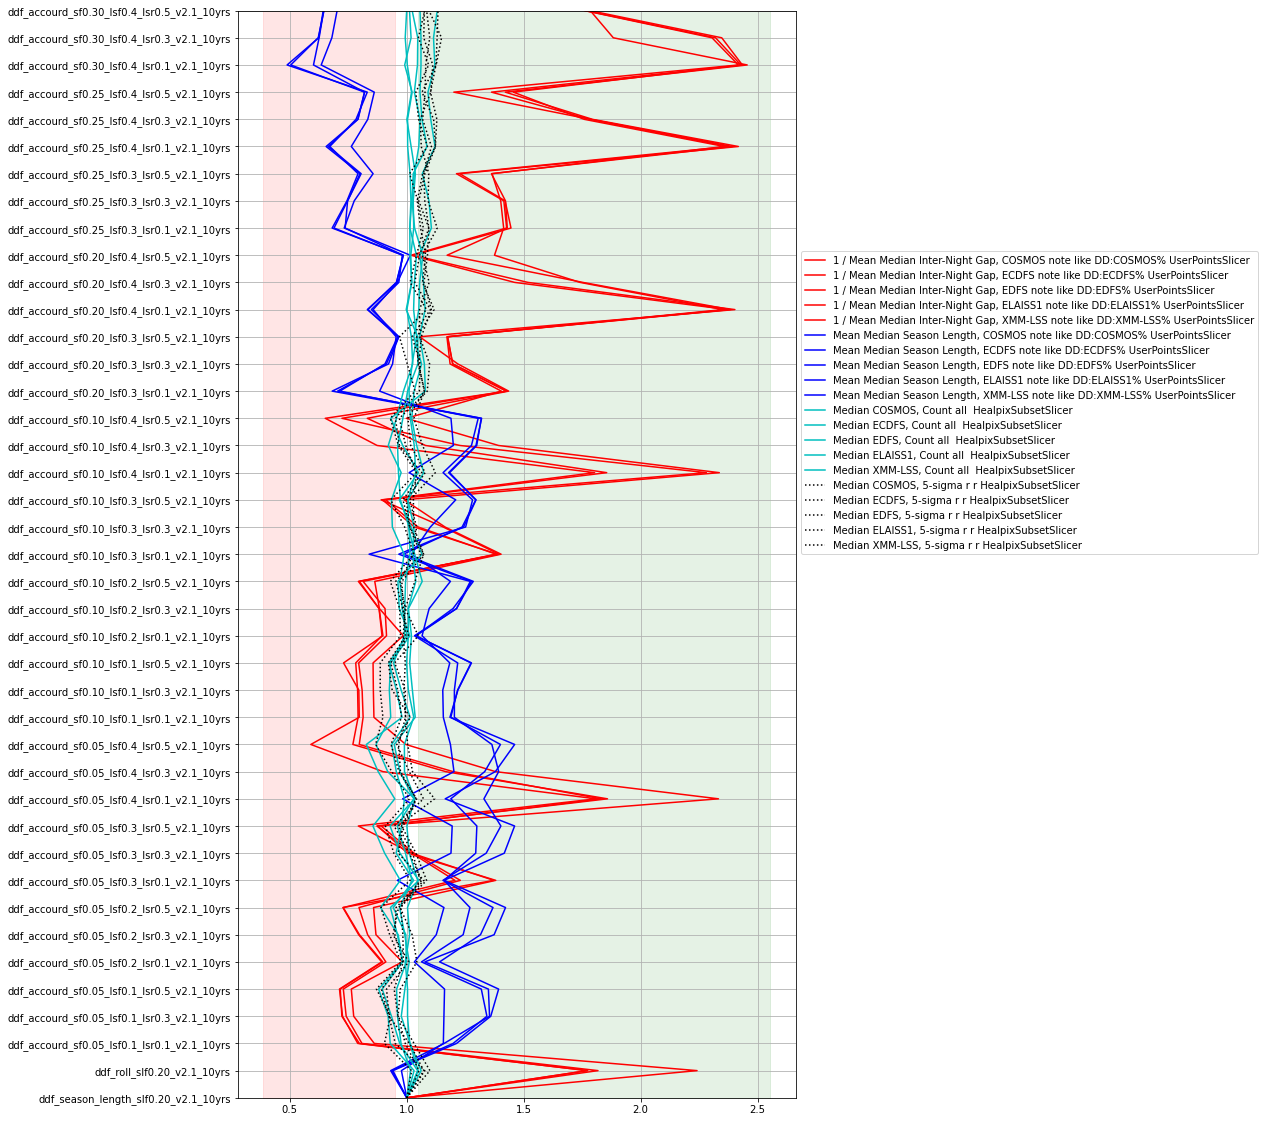

In [30]:
# Let's have a quick look at the season length, inter-night gaps, and overall number of visits and depths

fig, ax = maf.plot_run_metric(summaries.loc[these_runs, new['metric']], 
                    baseline_run=baseline,
                   metric_set = new)
fig.set_figheight(20)
ax.legend(loc=(1.01, 0.5))
#ax.set_xlim(0.4, 1.3)

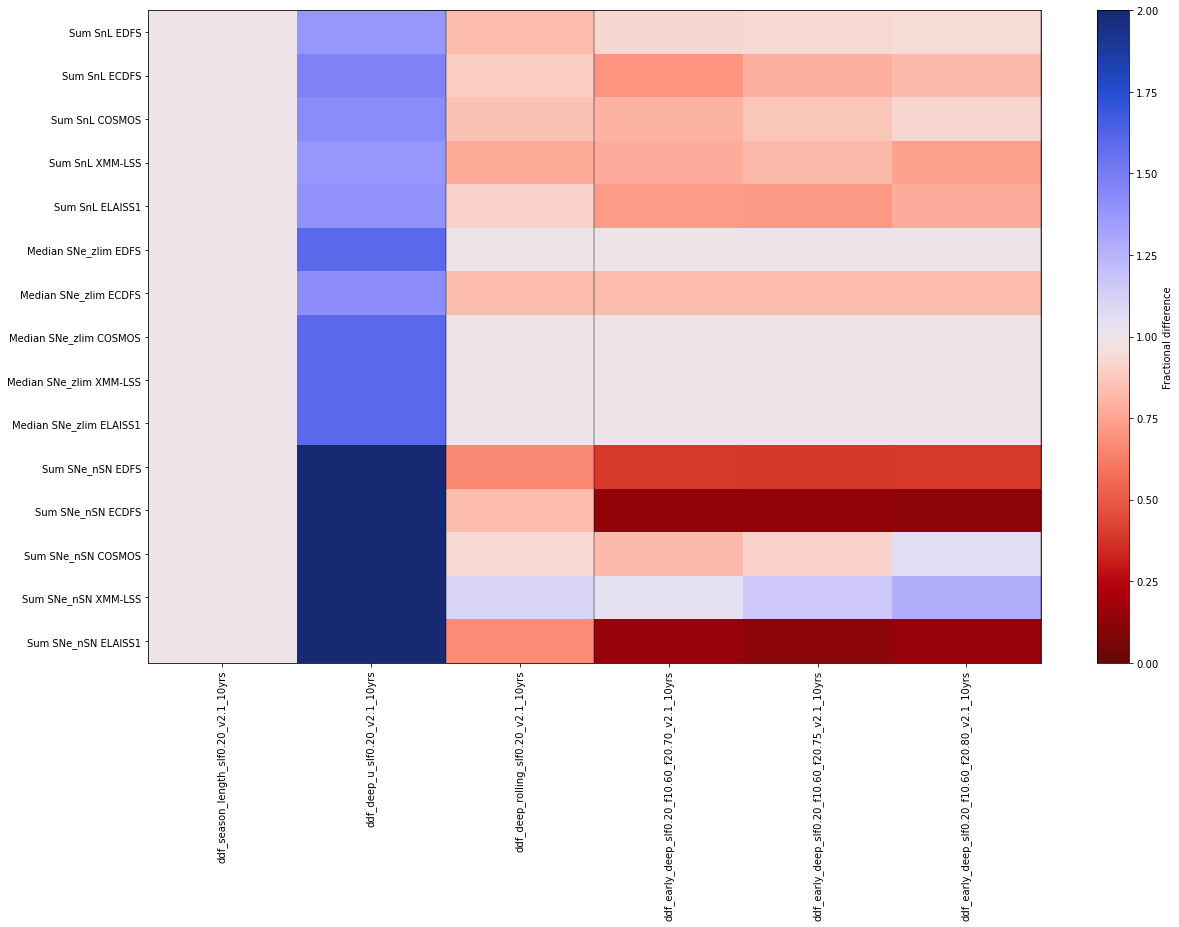

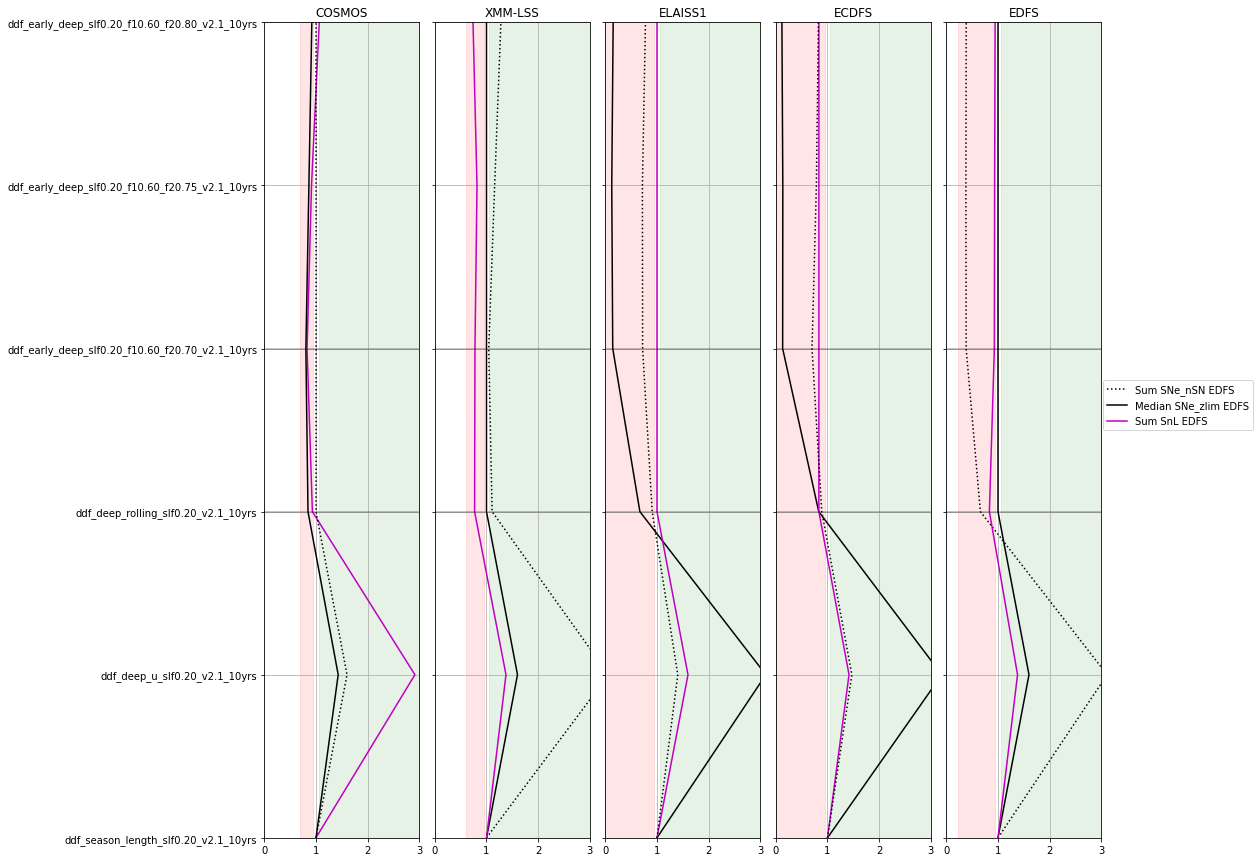

In [31]:
fams = ['ddf deep universal', 'ddf deep rolling', 'ddf early deep']

baseline = 'ddf_season_length_slf0.20_v2.1_10yrs'
these_runs = np.concatenate([[baseline], families.explode(['run']).loc[fams]['run']])

fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs, mm['metric']],
                                  baseline_run=baseline,
                                  metric_label_map=mm['short_name'],
                                  metric_set=mm, 
                                  color_range=2)
fig.set_figwidth(20)
fig.set_figheight(12)
for l in (maf.find_family_lines(families, fams)+1):
    ax.axvline(l, color='k', alpha=0.3)


fig = plt.figure(figsize=(15, 15))
gs = fig.add_gridspec(ncols=5, nrows=1, wspace=0.1)
axs = gs.subplots(sharey=True)
for dd, ax  in zip(ddfs, axs):
    msubset = mm.query('metric.str.contains(@dd)')
    fig, ax = maf.plot_run_metric(summaries.loc[these_runs, msubset['metric']],
                                      baseline_run=baseline,
                                      metric_label_map=msubset['short_name'],
                                      metric_set=msubset,
                                 horizontal_quantity='value',
                                 vertical_quantity='run',
                                 ax=ax)
    ax.get_legend().remove()
    ax.set_xlim(0., 3)
    ax.set_title(dd)
    for l in (maf.find_family_lines(families, fams)+1):
        ax.axhline(l, color='k', alpha=0.3)
ax.legend(loc=(1.01, 0.5))

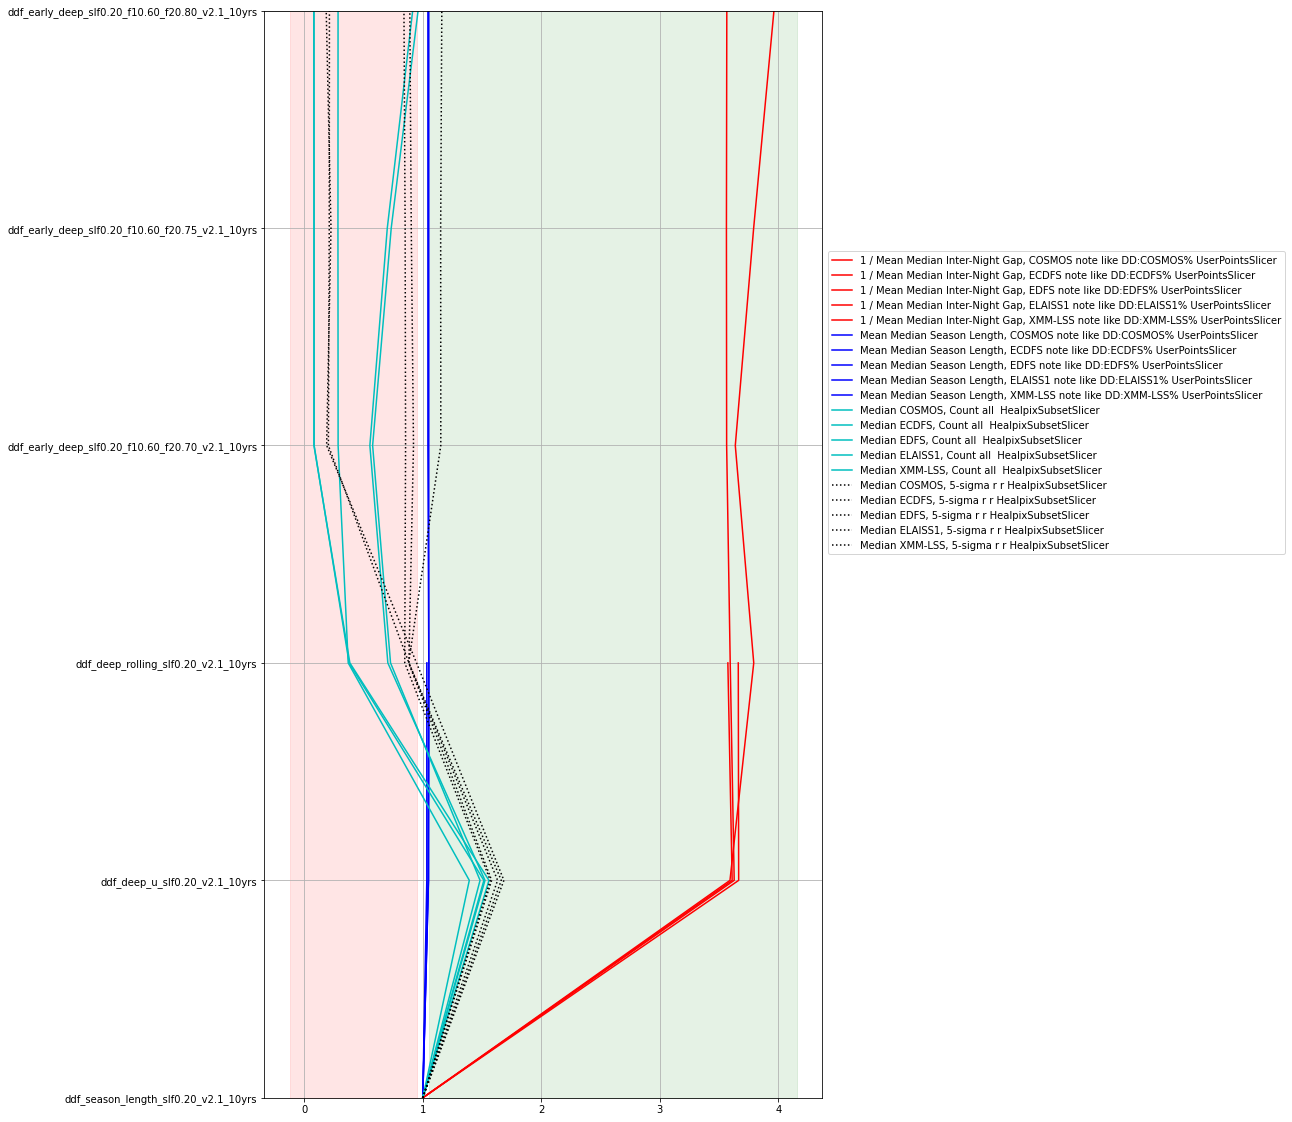

In [32]:
fig, ax = maf.plot_run_metric(summaries.loc[these_runs, new['metric']], 
                    baseline_run=baseline,
                   metric_set = new)
fig.set_figheight(20)
ax.legend(loc=(1.01, 0.5))
#ax.set_xlim(0.4, 1.3)